## Michaelis-Menten kinetics
$$
\begin{aligned}
    S + E  &\xrightarrow{k_p} C \\
    C  &\xrightarrow{k_m} S + E \\
     C &\xrightarrow{k_2} P + E
\end{aligned}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import scipy.integrate as integrate
import scipy.stats as stats

### Parameters and initial coditions

In [4]:
kp = 1.1
km = 0.1
k2 = 0.8
S0=100
E0 =100
C0=1
P0=1
t=0
#set the duration to be 10 seconds
t_end= 10

### Gillespie algorithm

In [155]:
t_sample = 0.001*max(1/kp , 1/km , 1/k2  )

In [242]:
def R_Gillespie(kp, km , k2 ,S0, E0 , C0 , P0) :
    
    #initial setting
    S = S0
    E = E0
    C = C0 
    P = P0
 
    t_array = np.zeros(int( t_end/t_sample) +1 )
    S_array = np.zeros( int(t_end/t_sample) +1)
    E_array = np.zeros( int(t_end/t_sample) +1)
    C_array = np.zeros( int(t_end/t_sample) +1)
    P_array = np.zeros( int(t_end/t_sample) +1)    
    
    j=0
    t=0
    t_array[j] = 0
    S_array[j] = S
    E_array[j] = E
    C_array[j] = C
    P_array[j] = P
    while t < t_end :
        
        a = [kp*S*E , km*C , k2*C ]
        a0 = sum(a)
        
        if a0 == 0 :
            t = t + t_sample
        if a0 != 0 :
            r1 , r2 = np.random.rand(2)
    
            while r1 ==0:
                r1 = np.random.rand(1)

            t_next = (1/a0)*(  np.log(1/r1))  
            t = t + t_next

            i = 0
            mu = 0
            amu = 0 
            while amu < r2*a0 : 
                mu = mu + 1
                amu = amu + a[i]
                i = i+1

            if mu == 1:
                S = S-1
                E = E-1
                C = C+1
            elif mu ==2 :
                S = S +1
                E = E +1
                C = C - 1
            else :
                C = C - 1
                P = P + 1
                E = E + 1

            if t > t_end:
                print('done')
                break
        
        while t > j*t_sample and j < int( t_end/t_sample) : 
            j = j+1
            t_array[j] = j*t_sample
            S_array[j] = S
            E_array[j] = E
            C_array[j] = C
            P_array[j] = P
            
            print(j)

    return  t_array , S_array , E_array , C_array  , P_array  

In [243]:
t_Gillespie_array , S_Gillespie_array , E_Gillespie_array , C_Gillespie_array  , P_Gillespie_array = R_Gillespie(kp, km , k2 ,S0, E0 , C0 , P0)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


### Euler method

In [198]:
step_size = 0.001

In [199]:
def R_Euler(kp, km , k2 ,S0, E0 , C0 , P0):
    
    #initial setting
    t_array = np.zeros( int(t_end/step_size) +1 )
    S_array = np.zeros( int(t_end/step_size) +1 )
    E_array = np.zeros( int(t_end/step_size) +1 )
    C_array = np.zeros( int(t_end/step_size) +1 )
    P_array = np.zeros( int(t_end/step_size) +1 )    
    t=0
    j=0
    S = S0
    E = E0
    C = C0
    P = P0
    t_array[j] = 0
    S_array[j] = S0
    E_array[j] = E0
    C_array[j] = C0
    P_array[j] = P0
    
    #start the process
    while j < t_end/step_size  :
        print(j , t,S,E,C,P)
        j= j+1
        Wp  , Wm , W2 = np.random.normal(0,step_size**2,3)
        dS = (-kp*S*E + km *C)*step_size + ( -np.sqrt(kp*S*E)*Wp + np.sqrt(km*C)*Wm )
        dE = (-kp*S*E + km *C + k2*C)*step_size + ( -np.sqrt(kp*S*E)*Wp + np.sqrt(km*C)*Wm + np.sqrt(k2*C)*W2)
        dC = -dE
        dP = k2*C*step_size+ np.sqrt(k2*C)*W2
        
        S = max (S + dS , 0 )
        E = max (E + dE , 0)
        C = max(C + dC , 0)
        P = max(P + dP , 0)
        
        t = t + step_size
       
        t_array[j] = t
        S_array[j] = S
        E_array[j] = E
        C_array[j] = C
        P_array[j] = P
        
    return t_array , S_array , E_array , C_array  , P_array 

In [200]:
 t_Euler_array , S_Euler_array , E_Euler_array , C_Euler_array  , P_Euler_array  = R_Euler(kp, km , k2 ,S0, E0 , C0 , P0)

0 0 100 100 1 1
1 0.001 89.0001648597212 89.0009648181865 11.999035181813502 1.0007999584653067
2 0.002 80.28820848301126 80.29860561027812 20.701394389721887 1.0103971272668597
3 0.003 73.19856526036844 73.22552292597004 27.77447707402996 1.02695766560161
4 0.004 67.30543108611036 67.35460250197724 33.64539749802276 1.0491714158668952
5 0.005 62.32207985278484 62.39815730148572 38.60184269851428 1.076077448700895
6 0.006 58.0483171711153 58.15527428395317 42.84472571604683 1.106957112837886
7 0.007 54.339202426749566 54.48042697972302 46.51957302027698 1.1412245529734735
8 0.008 51.08733427355809 51.26576681431221 49.73423318568779 1.178432540754131
9 0.009000000000000001 48.21139842148047 48.4296183960226 52.5703816039774 1.2182199745421476
10 0.010000000000000002 45.648235377622285 45.90851605045219 55.09148394954781 1.2602806728299238
11 0.011000000000000003 43.34850791394257 43.652858340697136 57.347141659302864 1.3043504267545882
12 0.012000000000000004 41.27274093230727 41.62296

428 0.4280000000000003 0.2733547335294041 27.933846536600008 73.0661534634001 28.660491803070617
429 0.4290000000000003 0.27225838943671843 27.991196961264905 73.00880303873521 28.718938571828197
430 0.4300000000000003 0.2711759844330691 28.048535868715955 72.95146413128415 28.777359884282898
431 0.4310000000000003 0.2701086555453833 28.105836584272264 72.89416341572785 28.835727928726893
432 0.43200000000000033 0.2690419952209558 28.163094144015908 72.8369058559842 28.894052148794962
433 0.43300000000000033 0.2679942446271822 28.220316709625678 72.77968329037444 28.952322464998506
434 0.43400000000000033 0.26695337436265215 28.27749942342637 72.72250057657375 29.010546049063727
435 0.43500000000000033 0.26592695334017175 28.33464434951307 72.66535565048704 29.068717396172907
436 0.43600000000000033 0.2649060192027824 28.39176738797306 72.60823261202705 29.12686136877029
437 0.43700000000000033 0.26389330306565756 28.448839828916636 72.55116017108348 29.184946525850986
438 0.4380000000

725 0.7250000000000005 0.1264811472619565 43.26447719333083 57.735522806669266 44.13799604606885
726 0.7260000000000005 0.12623539486881646 43.31041565226376 57.68958434773634 44.184180257394914
727 0.7270000000000005 0.12599062016746213 43.3563294156268 57.6436705843733 44.23033879545931
728 0.7280000000000005 0.1257500507637417 43.402198311741245 57.597801688258855 44.276448260977475
729 0.7290000000000005 0.12550151715744445 43.44803101363213 57.55196898636797 44.32252949647466
730 0.7300000000000005 0.12525880102014045 43.493830328925654 57.506169671074446 44.36857152790548
731 0.7310000000000005 0.12501607447385465 43.539597807612296 57.460402192387804 44.41458173313841
732 0.7320000000000005 0.12478130455696158 43.58534098485317 57.41465901514693 44.46055968029618
733 0.7330000000000005 0.12453603260307836 43.631032236515516 57.368967763484584 44.50649620391241
734 0.7340000000000005 0.12429567934106009 43.676693951016304 57.323306048983795 44.55239827167522
735 0.735000000000000

1058 1.0579999999999943 0.07264392366313234 56.7252604532739 44.2747395467262 57.65261652961069
1059 1.0589999999999942 0.07253820855603911 56.7605804089352 44.2394195910649 57.68804220037909
1060 1.059999999999994 0.0724340194800561 56.79586377574216 44.20413622425794 57.723429756262036
1061 1.060999999999994 0.07233428497939776 56.831131861510435 44.168868138489664 57.75879757653097
1062 1.0619999999999938 0.07223021388652479 56.86637309176368 44.13362690823642 57.79414287787708
1063 1.0629999999999937 0.07212158309724571 56.90158110322014 44.09841889677996 57.829459520122825
1064 1.0639999999999936 0.07201520287747902 56.93675611804768 44.06324388195242 57.86474091517014
1065 1.0649999999999935 0.07191142386246172 56.97191123837572 44.02808876162438 57.89999981451319
1066 1.0659999999999934 0.07180567695942702 57.007024159869886 43.992975840130214 57.935218482910386
1067 1.0669999999999933 0.07170184994310086 57.042111043982445 43.957888956017655 57.97040919403927
1068 1.06799999999

1391 1.3909999999999576 0.046783476340940856 67.06100004011083 33.93899995988932 68.01421656376978
1392 1.3919999999999575 0.04672177721748381 67.08808235201634 33.9119176479838 68.04136057479876
1393 1.3929999999999574 0.0466642506015831 67.11516180788625 33.88483819211388 68.06849755728457
1394 1.3939999999999573 0.046606294948160536 67.14221380311318 33.85778619688695 68.09560750816493
1395 1.3949999999999572 0.04655044376579729 67.16924535289773 33.8307546471024 68.12269490913184
1396 1.395999999999957 0.04649164068852259 67.19625640153319 33.803743598466944 68.14976476084458
1397 1.396999999999957 0.04643591215396586 67.22324088873752 33.776759111262606 68.17680497658347
1398 1.3979999999999568 0.04637897298546213 67.25019351126035 33.74980648873978 68.2038145382748
1399 1.3989999999999567 0.04632329667990145 67.27714457714782 33.722855422852305 68.23082128046784
1400 1.3999999999999566 0.046263280659439014 67.30406411421103 33.6959358857891 68.25780083355151
1401 1.40099999999995

1724 1.723999999999921 0.03195694181314601 74.9879485251197 26.012051474880444 75.95599158330646
1725 1.7249999999999208 0.031919812376106346 75.0087198820937 25.991280117906445 75.9768000697175
1726 1.7259999999999207 0.03188693312795594 75.0294823454311 25.970517654569033 75.99759541230306
1727 1.7269999999999206 0.0318519683522309 75.0502278846687 25.949772115331445 76.01837591631637
1728 1.7279999999999205 0.03181736644345542 75.07095408656207 25.929045913438078 76.03913672011852
1729 1.7289999999999204 0.031780312733798714 75.09164667389854 25.90835332610161 76.05986636116464
1730 1.7299999999999203 0.03174814066167842 75.11234218342884 25.88765781657132 76.08059404276705
1731 1.7309999999999202 0.03171468852426277 75.13302298788048 25.866977012119673 76.1013082993561
1732 1.73199999999992 0.03168326892557832 75.15368794207228 25.846312057927868 76.12200467314659
1733 1.73299999999992 0.03165224084303222 75.17432905637705 25.825670943623095 76.1426768155339
1734 1.7339999999999198

2058 2.0579999999998844 0.02258118748701726 81.08116554526782 19.918834454732213 82.0585843577809
2059 2.0589999999998843 0.022559299541672174 81.09707978852524 19.902920211474797 82.07452048898367
2060 2.059999999999884 0.02253613121659311 81.11297622658233 19.8870237734177 82.09044009536584
2061 2.060999999999884 0.02251256928838252 81.12886397679816 19.871136023201874 82.10635140750988
2062 2.061999999999884 0.022490911623631447 81.1447457171887 19.855254282811337 82.12225480556516
2063 2.062999999999884 0.022467222639053246 81.16060352869803 19.839396471301995 82.13813630605908
2064 2.0639999999998837 0.022446149408293405 81.1764584455067 19.82354155449333 82.1540122960985
2065 2.0649999999998836 0.02242244798850842 81.19228372838317 19.807716271616847 82.16986128039477
2066 2.0659999999998835 0.02240252690230465 81.2081104035354 19.79188959646462 82.1857078766332
2067 2.0669999999998834 0.022380093295216657 81.22392289763458 19.776077102365438 82.20154280433947
2068 2.067999999999

2416 2.415999999999845 0.0159687169550417 86.03773970045579 14.962260299544125 87.02177098350086
2417 2.416999999999845 0.01595555638261713 86.04970059906213 14.950299400937773 87.03374504267963
2418 2.4179999999998447 0.015941787449553605 86.06164782112495 14.938352178874952 87.04570603367551
2419 2.4189999999998446 0.015926039367044495 86.07357711357871 14.926422886421195 87.05765107421178
2420 2.4199999999998445 0.015909158157866674 86.08549656947824 14.91450343052167 87.06958741132048
2421 2.4209999999998444 0.0158911014402894 86.09740989171199 14.902590108287919 87.08151879027182
2422 2.4219999999998443 0.015874448822098604 86.10931315140589 14.890686848594026 87.0934387025839
2423 2.422999999999844 0.015860059746424446 86.12121087400331 14.878789125996597 87.105350814257
2424 2.423999999999844 0.015844770706584764 86.13310088535286 14.866899114647051 87.11725611464638
2425 2.424999999999844 0.015831928754179395 86.14498158735259 14.855018412647317 87.12914965859852
2426 2.4259999

2724 2.723999999999811 0.012011757419912783 89.30304349905873 11.696956500941202 90.29103174163899
2725 2.724999999999811 0.011999660935617055 89.3123887349123 11.687611265087627 90.30038907397686
2726 2.725999999999811 0.011987583052238094 89.3217286175319 11.67827138246803 90.30974103447984
2727 2.7269999999998107 0.01197731885171486 89.33106045160602 11.66893954839391 90.31908313275449
2728 2.7279999999998106 0.011967989816972578 89.34038572032111 11.65961427967882 90.32841773050431
2729 2.7289999999998105 0.011956714250609596 89.34970683328511 11.650293166714814 90.33775011903468
2730 2.7299999999998104 0.011947018137032993 89.35901740708134 11.640982592918581 90.34707038894449
2731 2.7309999999998102 0.011938063565825163 89.3683202728128 11.631679727187123 90.35638220924716
2732 2.73199999999981 0.01193059704024781 89.37762087993579 11.622379120064123 90.36569028289574
2733 2.73299999999981 0.011923003700119075 89.38691176722975 11.613088232770162 90.37498876352983
2734 2.73399999

3057 3.0569999999997743 0.008933131717202223 92.03687067071895 8.963129329280958 93.02793753900187
3058 3.0579999999997742 0.008926153556806253 92.04403242388038 8.955967576119528 93.0351062703237
3059 3.058999999999774 0.008920561473328417 92.05118755294446 8.94881244705546 93.04226699147124
3060 3.059999999999774 0.008910653959221625 92.05833834407888 8.941661655921033 93.04942769011977
3061 3.060999999999774 0.00890456452988727 92.06549107600625 8.934508923993658 93.05658651147648
3062 3.061999999999774 0.00889887921892051 92.07263109650337 8.927368903496541 93.06373221728457
3063 3.0629999999997737 0.008889831733473678 92.0797690985529 8.92023090144701 93.07087926681955
3064 3.0639999999997736 0.00888051389278639 92.08689336844023 8.913106631559684 93.07801285454757
3065 3.0649999999997735 0.008872907392575949 92.09401681220483 8.905983187795083 93.08514390481238
3066 3.0659999999997734 0.008863736185911774 92.10112946248773 8.898870537512183 93.09226572630195
3067 3.06699999999977

3391 3.3909999999997376 0.006680636722150549 94.13730962828582 6.862690371714235 95.1306289915636
3392 3.3919999999997374 0.006676180279696025 94.14279064488312 6.857209355116934 95.13611446460335
3393 3.3929999999997373 0.006672841986021635 94.14827156751129 6.851728432488764 95.1415987255252
3394 3.3939999999997372 0.006667972411361883 94.15374551252079 6.846254487479264 95.14707754010936
3395 3.394999999999737 0.006661371673300558 94.15921926858483 6.84078073141521 95.15255789691147
3396 3.395999999999737 0.006654399309111045 94.16468883125499 6.835311168745059 95.15803443194582
3397 3.396999999999737 0.0066499210163718635 94.17015142857437 6.829848571425678 95.16350150755794
3398 3.397999999999737 0.0066449129154320195 94.17561304695069 6.824386953049362 95.1689681340352
3399 3.3989999999997367 0.006639178951830279 94.18106749890178 6.818932501098269 95.1744283199499
3400 3.3999999999997366 0.0066346253129138605 94.1865203454646 6.813479654535451 95.17988572015163
3401 3.4009999999

3730 3.7299999999997 0.005010444356178937 95.76651596659369 5.233484033406336 96.76150552223736
3731 3.7309999999997 0.00500814308186844 95.77070210190986 5.229297898090159 96.76569395882784
3732 3.7319999999997 0.005003266076447295 95.77487926051943 5.225120739480588 96.76987599444283
3733 3.7329999999997 0.004997972596802338 95.77905158782666 5.220948412173352 96.7740536152297
3734 3.7339999999997 0.00499383131287826 95.78322339531321 5.216776604686801 96.77822956400018
3735 3.7349999999996997 0.004988256581283749 95.78739451914328 5.212605480856738 96.78240626256184
3736 3.7359999999996996 0.0049850672806932735 95.79156354656213 5.208436453437887 96.78657847928127
3737 3.7369999999996995 0.0049782160802827715 95.79572483678055 5.20427516321947 96.7907466207001
3738 3.7379999999996993 0.004973631115576003 95.79988492740081 5.2001150725992105 96.79491129628506
3739 3.7389999999996992 0.004968657700255524 95.80403884520138 5.195961154798645 96.79907018750094
3740 3.739999999999699 0.00

4057 4.0569999999996895 0.0038042509380519832 96.97053641759709 4.029463582402943 97.9667321666588
4058 4.05799999999969 0.0038014850133585173 96.97375650494594 4.026243495054085 97.96995501993236
4059 4.05899999999969 0.003797493338948578 96.97697450913039 4.0230254908696415 97.97317701579121
4060 4.0599999999996905 0.003793908232180601 96.98019106933666 4.019808930663372 97.97639716110425
4061 4.060999999999691 0.0037909846021196565 96.98340335593903 4.016596644061001 97.97961237133667
4062 4.061999999999691 0.003787639022708291 96.98661118570521 4.013388814294819 97.98282354668227
4063 4.0629999999996915 0.003785163782038073 96.98982233350671 4.010177666493328 97.98603716972443
4064 4.063999999999692 0.0037827433093708053 96.99302754107903 4.006972458921011 97.98924479776942
4065 4.064999999999692 0.0037793672884172467 96.99623167709582 4.003768322904215 97.99245230980716
4066 4.0659999999996925 0.003777790888585624 96.99943284827773 4.000567151722302 97.9956550573889
4067 4.0669999

4390 4.389999999999801 0.0028896136954874255 97.91243946709405 3.087560532906114 98.90954985339823
4391 4.390999999999801 0.0028869656885069555 97.91490461658995 3.0850953834102137 98.91201765090112
4392 4.391999999999801 0.0028849522347671056 97.9173710471587 3.082628952841466 98.9144860949236
4393 4.392999999999802 0.002882882014699158 97.91983516941185 3.080164830588305 98.91695228739682
4394 4.393999999999802 0.0028806801685418333 97.92229541151437 3.077704588485785 98.9194147313455
4395 4.394999999999802 0.0028778779893488026 97.92475484578144 3.0752451542187242 98.92187696779175
4396 4.395999999999803 0.002875383055453521 97.92721040123998 3.072789598760184 98.92433501818418
4397 4.396999999999803 0.0028741965666662494 97.92966614861653 3.070333851383623 98.92679195204953
4398 4.397999999999803 0.0028709648102016256 97.93212138220427 3.0678786177958908 98.92925041739372
4399 4.398999999999804 0.002868279127478235 97.934571587964 3.065428412036156 98.93170330883618
4400 4.39999999

4724 4.723999999999912 0.0021961052467212284 98.63606563400117 2.3639343659989485 99.63386952875416
4725 4.724999999999913 0.002193996313922488 98.63795406853447 2.3620459314656452 99.63576007222026
4726 4.725999999999913 0.002192230822884148 98.63984215032058 2.360157849679534 99.63764991949742
4727 4.726999999999913 0.002190698766000227 98.64172779673223 2.3582722032678856 99.63953709796596
4728 4.727999999999914 0.0021892859558399077 98.64361222356115 2.3563877764389676 99.64142293760503
4729 4.728999999999914 0.0021865945586657097 98.6454924537491 2.354507546251017 99.64330585919015
4730 4.729999999999914 0.002185841823628504 98.64737435131997 2.352625648680149 99.64518850949605
4731 4.730999999999915 0.0021830720259134093 98.64925384070627 2.350746159293846 99.64707076868007
4732 4.731999999999915 0.002180342375778265 98.65112997109635 2.3488700289037583 99.64894962872029
4733 4.732999999999915 0.002178506134687478 98.65300670075223 2.3469932992478877 99.65082819461725
4734 4.7339

5068 5.068000000000027 0.0016584224246249126 99.20452591656712 1.795474083432962 100.20286749414215
5069 5.0690000000000275 0.0016561642047436742 99.20595820813723 1.7940417918628466 100.20430204393215
5070 5.070000000000028 0.0016551564729611274 99.20739428918557 1.7926057108145086 100.20573913271227
5071 5.071000000000028 0.0016529973968255523 99.20882669848395 1.7911733015161306 100.20717370108679
5072 5.0720000000000285 0.0016520376064202706 99.21025787323221 1.7897421267678677 100.20860583562546
5073 5.073000000000029 0.0016509923306984602 99.21168923681311 1.7883107631869666 100.21003824448209
5074 5.074000000000029 0.0016501791289359397 99.2131188834603 1.7868811165397835 100.21146870433104
5075 5.0750000000000295 0.0016478712678282402 99.21454552704127 1.7854544729588142 100.21289765577312
5076 5.07600000000003 0.001646690947152829 99.21597334773477 1.7840266522653097 100.21432665678729
5077 5.07700000000003 0.0016449178294421728 99.21739747602416 1.782602523975926 100.21575255

5390 5.390000000000135 0.0012749587883712126 99.61209253592985 1.3879074640702265 100.61081757714122
5391 5.391000000000135 0.0012742467120844974 99.6132012754746 1.3867987245254825 100.61192702876225
5392 5.392000000000135 0.0012731039285231213 99.61431135067832 1.3856886493217517 100.61303824674954
5393 5.393000000000136 0.0012725154593228936 99.61542018295484 1.3845798170452415 100.61414766749525
5394 5.394000000000136 0.0012721493541829425 99.61652781431017 1.3834721856899024 100.61525566495573
5395 5.395000000000136 0.0012719465002142354 99.61763479830536 1.3823652016947103 100.61636285180488
5396 5.396000000000137 0.0012708587586967334 99.61873936087784 1.3812606391222264 100.61746850211888
5397 5.397000000000137 0.0012695550703927666 99.61984169912076 1.3801583008793048 100.6185721440501
5398 5.398000000000137 0.0012685508445227606 99.62094466651757 1.3790553334824913 100.61967611567279
5399 5.399000000000138 0.0012676993783882862 99.62204540363159 1.3779545963684743 100.6207777

5723 5.723000000000246 0.0009752958927938623 99.9365553815305 1.0634446184695376 100.93558008563744
5724 5.724000000000246 0.0009745821105278643 99.93740521088853 1.0625947891115102 100.93643062877773
5725 5.725000000000247 0.0009739513862568847 99.93825588621173 1.0617441137882966 100.93728193482521
5726 5.726000000000247 0.0009734225965108581 99.93910400410361 1.0608959958964224 100.93813058150683
5727 5.727000000000247 0.0009730514653965891 99.93995232144866 1.0600476785513795 100.93897926998298
5728 5.728000000000248 0.0009714586512290935 99.94080148488813 1.0591985151119072 100.93983002623662
5729 5.729000000000248 0.000970859468448138 99.94164680513582 1.0583531948642133 100.9406759456671
5730 5.730000000000248 0.000968906203027683 99.94249048940519 1.057509510594848 100.94152158320188
5731 5.731000000000249 0.0009681946198230861 99.94333473520156 1.0566652647984807 100.94236654058145
5732 5.732000000000249 0.0009671418366826792 99.94417789925701 1.0558221007430224 100.9432107574

6057 6.057000000000357 0.0007446059177486267 100.18581061303685 0.8141893869631852 101.18506600711892
6058 6.058000000000358 0.0007445457748438823 100.18646108831257 0.8135389116874708 101.18571654253753
6059 6.059000000000358 0.0007439072729229092 100.18711273363871 0.8128872663613321 101.1863688263656
6060 6.060000000000358 0.0007437198286711259 100.18776331265039 0.8122366873496547 101.18701959282153
6061 6.061000000000359 0.0007430924261825442 100.1884142224213 0.8115857775787446 101.18767112999492
6062 6.062000000000359 0.0007427381917312888 100.18906275534263 0.8109372446574122 101.18832001715072
6063 6.063000000000359 0.0007419691253944454 100.18971174051887 0.8102882594811761 101.18896977139329
6064 6.06400000000036 0.0007415735958223407 100.19035902454041 0.809640975459632 101.18961745094441
6065 6.06500000000036 0.0007410477351805801 100.19100637122317 0.8089936287768812 101.19026532348781
6066 6.06600000000036 0.0007402271027470876 100.19165186837648 0.8083481316235636 101.1

6390 6.390000000000469 0.0005688990180857713 100.37613008147858 0.623869918521265 101.37556118246042
6391 6.391000000000469 0.000568392850653999 100.37663038791794 0.623369612081907 101.3760619950672
6392 6.392000000000469 0.000568225123168468 100.37712897153118 0.6228710284686727 101.37656074640792
6393 6.39300000000047 0.000567907167982069 100.37762720097025 0.6223727990295916 101.37705929380219
6394 6.39400000000047 0.0005679589499851524 100.37812410473006 0.6218758952697769 101.37755614578
6395 6.39500000000047 0.0005677709861864087 100.37862000317448 0.6213799968253674 101.37805223218821
6396 6.396000000000471 0.0005671848161280273 100.37911601835778 0.620883981642062 101.37854883354157
6397 6.397000000000471 0.000566178606250871 100.37961119904067 0.6203888009591664 101.37904502043435
6398 6.398000000000471 0.0005656845473635517 100.38010606774014 0.6198939322596942 101.3795403831927
6399 6.399000000000472 0.0005647303112929663 100.38060109661306 0.6193989033867718 101.3800363663

6723 6.72300000000058 0.0004354396372671288 100.52195888740539 0.478041112594521 101.521523447768
6724 6.72400000000058 0.0004353690076160672 100.52234138925795 0.47765861074196997 101.5219060202502
6725 6.7250000000005805 0.0004347771420346876 100.52272214298416 0.47727785701575753 101.52228736584199
6726 6.726000000000581 0.00043451858905475474 100.52310291916378 0.4768970808361464 101.52266840057459
6727 6.727000000000581 0.0004335413032251854 100.52348412268489 0.476515877315038 101.52305058138153
6728 6.7280000000005815 0.0004330954168427955 100.5238647787671 0.4761352212328292 101.52343168335011
6729 6.729000000000582 0.00043300220489457525 100.52424534764438 0.47575465235555836 101.52381234543932
6730 6.730000000000582 0.00043297297856643443 100.52462634426986 0.47537365573007734 101.52419337129113
6731 6.7310000000005825 0.0004329502204774384 100.52500579638837 0.47499420361157113 101.52457284616773
6732 6.732000000000583 0.0004329753544862458 100.52538476653216 0.4746152334677

7056 7.056000000000691 0.00033247973491209017 100.6337168799654 0.36628312003458346 101.63338440023014
7057 7.057000000000691 0.00033245779781373346 100.63401032161819 0.3659896783818028 101.63367786382003
7058 7.058000000000692 0.00033247442358598993 100.63430335024064 0.3656966497593446 101.63397087581671
7059 7.059000000000692 0.0003320945292411228 100.63459582479875 0.3654041752012298 101.63426373026917
7060 7.060000000000692 0.0003321090873926266 100.63488782522968 0.3651121747702954 101.63455571614195
7061 7.061000000000693 0.0003318322561528553 100.63517858408434 0.3648214159156409 101.63484675182784
7062 7.062000000000693 0.0003319625686009546 100.63547110302888 0.3645288969711121 101.63513914045991
7063 7.063000000000693 0.0003321032324919706 100.63576351308052 0.3642364869194722 101.63543140984766
7064 7.064000000000694 0.0003319994292711092 100.63605436838901 0.3639456316109856 101.63572236895936
7065 7.065000000000694 0.0003314433258135856 100.63634516157906 0.3636548384209

7390 7.390000000000803 0.00025484022348883783 100.7195596171282 0.28044038287186673 101.71930477690431
7391 7.391000000000803 0.0002546956857854973 100.71978295039149 0.28021704960857224 101.71952825470531
7392 7.392000000000803 0.0002545891597711591 100.72000697962693 0.27999302037313106 101.71975239046677
7393 7.393000000000804 0.0002543973411584552 100.72023110126902 0.27976889873103444 101.71997670392747
7394 7.394000000000804 0.00025411087740267275 100.72045499498195 0.2795450050181034 101.72020088410416
7395 7.395000000000804 0.00025418398256073547 100.72067893002662 0.2793210699734329 101.72042474604368
7396 7.396000000000805 0.00025430281307027363 100.72090241091321 0.2790975890868458 101.72064810809975
7397 7.397000000000805 0.0002540096747820906 100.72112535452332 0.2788746454767392 101.72087134484815
7398 7.398000000000805 0.0002535099815982353 100.72134789627465 0.27865210372541405 101.72109438629266
7399 7.399000000000806 0.00025320077553801974 100.72157123722532 0.2784287

7723 7.723000000000914 0.00019509480144949999 100.78512872272525 0.21487127727483876 101.78493362792341
7724 7.724000000000914 0.00019503969520932488 100.78530011857569 0.21469988142439772 101.7851050788801
7725 7.7250000000009145 0.0001951804102027624 100.78547237040836 0.21452762959173216 101.78527718999777
7726 7.726000000000915 0.00019458027413654235 100.7856436162574 0.2143563837426918 101.78544903598288
7727 7.727000000000915 0.00019442185104732315 100.78581483554876 0.21418516445133626 101.78562041369733
7728 7.7280000000009155 0.00019416630003852998 100.78598583091636 0.21401416908374313 101.78579166461593
7729 7.729000000000916 0.00019396386588568099 100.78615701913128 0.21384298086881867 101.785963055265
7730 7.730000000000916 0.00019415793708362994 100.7863282520354 0.21367174796469451 101.78613409409793
7731 7.7310000000009165 0.00019406556992051672 100.78649920731417 0.21350079268593986 101.78630514174385
7732 7.732000000000917 0.00019387326986184498 100.78666873924706 0.2

8056 8.056000000000974 0.00014922750485343617 100.83534633875553 0.16465366124447622 101.83519711125044
8057 8.057000000000974 0.00014923936634783286 100.83547759856746 0.16452240143254446 101.83532835920087
8058 8.058000000000973 0.00014902067689676187 100.83560954491834 0.16439045508167305 101.8354605242412
8059 8.059000000000973 0.00014874909055233386 100.83574093353491 0.1642590664651048 101.83559218444411
8060 8.060000000000972 0.0001489473299468219 100.83587206273019 0.16412793726981656 101.8357231154
8061 8.061000000000972 0.0001487154632901093 100.83600311300718 0.16399688699282353 101.83585439754366
8062 8.062000000000971 0.00014863568980845525 100.83613392940342 0.1638660705965834 101.83598529371338
8063 8.06300000000097 0.00014873439418700677 100.83626470652693 0.16373529347307264 101.8361159721325
8064 8.06400000000097 0.00014859753273413397 100.83639552369458 0.163604476305435 101.83624692616159
8065 8.06500000000097 0.00014831556480077472 100.83652534112422 0.163474658875

8389 8.38900000000079 0.00011414629037954737 100.87383205250272 0.12616794749736546 101.87371790621215
8390 8.39000000000079 0.00011406150103613548 100.87393342119051 0.12606657880956507 101.87381935968929
8391 8.391000000000789 0.00011390160523829564 100.87403402439062 0.1259659756094543 101.87392012278521
8392 8.392000000000788 0.0001137009688835775 100.87413485104757 0.1258651489525012 101.87402115007852
8393 8.393000000000788 0.00011375277630760307 100.87423539503331 0.1257646049667611 101.87412164225684
8394 8.394000000000787 0.00011371683355551249 100.87433576227882 0.1256642377212571 101.8742220454451
8395 8.395000000000786 0.00011353899974088128 100.87443588957248 0.12556411042759777 101.87432235057257
8396 8.396000000000786 0.00011346427292177699 100.87453644650124 0.125463553498834 101.87442298222815
8397 8.397000000000785 0.00011336837886135357 100.8746368298251 0.12536317017496112 101.87452346144609
8398 8.398000000000785 0.00011330099670761561 100.87473678274733 0.12526321

8723 8.723000000000605 8.778003857977199e-05 100.90340637418018 0.0965936258198209 101.90331859414142
8724 8.724000000000604 8.79280478982912e-05 100.90348409115929 0.09651590884071105 101.90339616311121
8725 8.725000000000604 8.75863870947578e-05 100.90356106020228 0.09643893979771345 101.90347347381501
8726 8.726000000000603 8.741425164730232e-05 100.90363787028964 0.09636212971034358 101.90355045603783
8727 8.727000000000602 8.737594979568439e-05 100.90371512439384 0.09628487560615212 101.90362774844388
8728 8.728000000000602 8.748799276859514e-05 100.90379207217764 0.09620792782235717 101.90370458418471
8729 8.729000000000601 8.711214816505142e-05 100.90386853747795 0.09613146252204022 101.90378142532963
8730 8.7300000000006 8.72508054536223e-05 100.90394500248534 0.096054997514642 101.90385775167974
8731 8.7310000000006 8.738677412522741e-05 100.90402193958278 0.09597806041721377 101.9039345528085
8732 8.7320000000006 8.712951640187161e-05 100.90409860532257 0.0959013946774231 101

9060 9.060000000000418 6.667649815077859e-05 100.926218935857 0.07378106414304446 101.92615225935862
9061 9.061000000000417 6.675241722078486e-05 100.92627811215074 0.07372188784930413 101.92621135973329
9062 9.062000000000417 6.668129863717183e-05 100.92633745303885 0.07366254696118922 101.92627077173998
9063 9.063000000000416 6.673808555253492e-05 100.92639613937445 0.07360386062560005 101.92632940128865
9064 9.064000000000416 6.679713973552148e-05 100.92645525131208 0.07354474868796824 101.9263884541721
9065 9.065000000000415 6.673822674628213e-05 100.9265137793352 0.07348622066485293 101.9264470411082
9066 9.066000000000415 6.666297408559407e-05 100.92657272703866 0.07342727296138421 101.92650606406433
9067 9.067000000000414 6.665344127782233e-05 100.92663154590633 0.07336845409371147 101.92656489246481
9068 9.068000000000414 6.635100451654036e-05 100.92668996674058 0.07331003325946485 101.92662361573582
9069 9.069000000000413 6.615490241619643e-05 100.92674878636386 0.073251213636

9389 9.389000000000236 5.1251007408295556e-05 100.9432910024311 0.056708997568930865 101.94323975142345
9390 9.390000000000235 5.117783571701387e-05 100.94333585881499 0.05666414118504177 101.94328468097903
9391 9.391000000000234 5.121570372421475e-05 100.94338141836947 0.05661858163056109 101.9433302026655
9392 9.392000000000234 5.118682172156624e-05 100.94342643548612 0.05657356451391182 101.94337524866415
9393 9.393000000000233 5.129533813348474e-05 100.94347189556214 0.05652810443789323 101.94342060022376
9394 9.394000000000233 5.127784233500601e-05 100.94351726413576 0.05648273586426994 101.94346598629318
9395 9.395000000000232 5.114302104655295e-05 100.943562151495 0.056437848505033396 101.9435110084737
9396 9.396000000000232 5.1083491912759345e-05 100.94360724077785 0.05639275922217754 101.9435561572857
9397 9.397000000000231 5.097213956735421e-05 100.94365223530643 0.0563477646935915 101.94360126316663
9398 9.39800000000023 5.075828335629942e-05 100.94369717293397 0.05630282706

9722 9.722000000000051 3.918841175607608e-05 100.9565453136937 0.04345468630648378 101.9565061252815
9723 9.72300000000005 3.914116327195155e-05 100.95658004791883 0.04341995208133911 101.95654090675514
9724 9.72400000000005 3.914494675369375e-05 100.95661466701975 0.043385332980421396 101.95657552207257
9725 9.72500000000005 3.9297488572810606e-05 100.95664964515629 0.04335035484388548 101.95661034766728
9726 9.726000000000049 3.933416769600865e-05 100.95668419523864 0.043315804761544396 101.9566448610705
9727 9.727000000000048 3.936550524375619e-05 100.95671894167994 0.04328105832023791 101.95667957617425
9728 9.728000000000048 3.928189800775671e-05 100.9567536288829 0.04324637111728414 101.95671434698444
9729 9.729000000000047 3.9406309082568305e-05 100.9567884288954 0.04321157110478523 101.95674902258587
9730 9.730000000000047 3.9277619227167796e-05 100.95682276647393 0.04317723352624992 101.95678348885426
9731 9.731000000000046 3.900462610219339e-05 100.95685688827298 0.0431431117

### Tau-leaping method

In [141]:
epsilon1=0.1
epsilon2=0.001
def Tau_choose(epsilon , kp, km , k2 , S,E,C,P):
    a = [kp*S*E , km*C , k2*C ]
    a0 = sum(a)
    xi_S = -kp*S*E + km*C
    xi_E = -kp*S*E + km*C + k2*C
    xi_C =  kp*S*E -km*C  - k2*C
    xi_P =  k2*C
    tp = epsilon*a0 / abs( xi_S*kp*E + xi_E*kp*S)
    tm = epsilon*a0 / abs( xi_C*km)
    t2 = epsilon*a0 / abs( xi_C*k2)
    return min(tp,tm,t2)

In [190]:
def R_Tau(epsilon , kp, km , k2 , S0 , E0 , C0 , P0 ):
    t_array = np.array( [] )
    S_array = np.array( [] )
    E_array = np.array( [] )
    C_array = np.array( [] )
    P_array = np.array( [] )    
    
    t=0
    S = S0
    E = E0
    C = C0
    P = P0
    t_array = np.append(t_array ,  t)
    S_array = np.append( S_array , S )
    E_array = np.append( E_array , E )
    C_array = np.append( C_array , C )
    P_array = np.append( P_array , P )
    while t < t_end:
        print(t)
        if C > 0 or S > 0:
            print(S,E,C,P)
            T = Tau_choose(epsilon , kp, km , k2 , S,E,C,P)
            dp = np.random.poisson( kp*S*E*T )
            dm = np.random.poisson( km*C*T )
            d2 = np.random.poisson( k2*C*T )
            S = max (S - dp + dm  , 0 )
            E = max (E - dp + dm  + d2 , 0)
            C = max (C + dp - dm - d2 , 0)
            P = max ( P + d2 , 0)
            t = t+T
            t_array = np.append( t_array ,  t)
            S_array = np.append( S_array , S )
            E_array = np.append( E_array , E )
            C_array = np.append( C_array , C )
            P_array = np.append( P_array , P )
        
        #all process stop , all quantities remain constant
        else :
            t=t+0.01
            t_array = np.append(t_array ,  t)
            S_array = np.append( S_array , S_array[-1] )
            E_array = np.append( E_array , E_array[-1] )
            C_array = np.append( C_array , C_array[-1] )
            P_array = np.append( P_array , P_array[-1] )
    return t_array , S_array , E_array , C_array  , P_array 

In [193]:
t_Tau1_array , S_Tau1_array , E_Tau1_array , C_Tau1_array  , P_Tau1_array =R_Tau(epsilon1, kp, km , k2 , S0 , E0 , C0 , P0 )
t_Tau2_array , S_Tau2_array , E_Tau2_array , C_Tau2_array  , P_Tau2_array =R_Tau(epsilon2, kp, km , k2 , S0 , E0 , C0 , P0 )

0
100 100 1 1
0.0004546033084148452
98 98 3 1
0.0009186096247777247
92 92 9 1
0.0014133497333416018
88 88 13 1
0.0019309830923366265
84 84 17 1
0.0024737697480974475
82 82 19 1
0.003030089575859898
76 76 25 1
0.003631476864784382
71 71 30 1
0.004276543957851422
67 67 34 1
0.004961532443123983
66 66 35 1
0.00565730635126919
60 60 41 1
0.006425920273202061
59 59 42 1
0.007208232115257652
56 56 45 1
0.008034841603344774
55 55 46 1
0.008877394145645593
54 54 47 1
0.009736539920152066
48 48 53 1
0.01071152714234811
46 46 55 1
0.011732749282028236
46 46 55 1
0.012753971421708364
46 46 55 1
0.013775193561388491
41 41 60 1
0.014935034670896482
41 41 60 1
0.016094875780404472
36 36 65 1
0.017439979244881994
34 34 67 1
0.018878162730272537
32 32 69 1
0.020424284378109087
30 30 71 1
0.02209722118462368
28 28 73 1
0.02392148059152021
26 26 75 1
0.02592970462920183
23 24 77 2
0.028227936672161953
22 23 78 2
0.03067107561458058
21 22 79 2
0.03328003326101525
19 20 81 2
0.03630460629961753
18 20 81 3

4.605362648554172
0 97 4 101
4.613797512659139
0 97 4 101
4.6222323767641065
0 98 3 102
4.6305811708271865
0 98 3 102
4.638929964890266
0 98 3 102
4.647278758953346
0 98 3 102
4.655627553016426
0 98 3 102
4.663976347079506
0 98 3 102
4.672325141142586
0 98 3 102
4.680673935205666
0 98 3 102
4.689022729268746
0 98 3 102
4.697371523331826
0 98 3 102
4.705720317394906
0 98 3 102
4.714069111457986
0 98 3 102
4.722417905521066
0 98 3 102
4.730766699584146
0 98 3 102
4.739115493647226
0 98 3 102
4.747464287710306
0 98 3 102
4.755813081773386
0 98 3 102
4.764161875836466
0 98 3 102
4.772510669899546
0 98 3 102
4.780859463962626
0 98 3 102
4.789208258025706
0 98 3 102
4.797557052088786
0 98 3 102
4.805905846151866
0 98 3 102
4.814254640214946
0 98 3 102
4.822603434278026
0 98 3 102
4.830952228341106
0 98 3 102
4.839301022404186
0 98 3 102
4.847649816467266
0 98 3 102
4.855998610530346
0 98 3 102
4.864347404593426
0 98 3 102
4.872696198656506
0 98 3 102
4.881044992719586
0 98 3 102
4.8893937867

7.810501899449163
7.820501899449162
7.830501899449162
7.840501899449162
7.850501899449162
7.8605018994491616
7.870501899449161
7.880501899449161
7.890501899449161
7.900501899449161
7.9105018994491605
7.92050189944916
7.93050189944916
7.94050189944916
7.95050189944916
7.960501899449159
7.970501899449159
7.980501899449159
7.990501899449159
8.000501899449159
8.010501899449158
8.020501899449158
8.030501899449158
8.040501899449158
8.050501899449158
8.060501899449157
8.070501899449157
8.080501899449157
8.090501899449157
8.100501899449156
8.110501899449156
8.120501899449156
8.130501899449156
8.140501899449156
8.150501899449155
8.160501899449155
8.170501899449155
8.180501899449155
8.190501899449155
8.200501899449154
8.210501899449154
8.220501899449154
8.230501899449154
8.240501899449153
8.250501899449153
8.260501899449153
8.270501899449153
8.280501899449153
8.290501899449152
8.300501899449152
8.310501899449152
8.320501899449152
8.330501899449152
8.340501899449151
8.350501899449151
8.3605018994

0.00177642393541623
82 82 19 1
0.0017819871336938544
82 82 19 1
0.001787550331971479
82 82 19 1
0.0017931135302491033
82 82 19 1
0.0017986767285267278
82 82 19 1
0.0018042399268043522
82 82 19 1
0.0018098031250819767
82 82 19 1
0.0018153663233596011
82 82 19 1
0.0018209295216372256
82 82 19 1
0.00182649271991485
82 82 19 1
0.0018320559181924745
82 82 19 1
0.001837619116470099
82 82 19 1
0.0018431823147477234
82 82 19 1
0.0018487455130253478
82 82 19 1
0.0018543087113029723
82 82 19 1
0.0018598719095805967
82 82 19 1
0.0018654351078582212
82 82 19 1
0.0018709983061358456
82 82 19 1
0.00187656150441347
82 82 19 1
0.0018821247026910945
82 82 19 1
0.001887687900968719
82 82 19 1
0.0018932510992463434
82 82 19 1
0.0018988142975239679
82 82 19 1
0.0019043774958015923
82 82 19 1
0.0019099406940792168
82 82 19 1
0.0019155038923568412
82 82 19 1
0.0019210670906344657
82 82 19 1
0.0019266302889120901
82 82 19 1
0.0019321934871897146
82 82 19 1
0.001937756685467339
82 82 19 1
0.001943319883744963

0.004103353567144052
74 74 27 1
0.004109534706043448
74 74 27 1
0.004115715844942845
74 74 27 1
0.004121896983842241
74 74 27 1
0.0041280781227416375
74 74 27 1
0.004134259261641034
74 74 27 1
0.00414044040054043
74 74 27 1
0.004146621539439827
74 74 27 1
0.004152802678339223
74 74 27 1
0.0041589838172386194
74 74 27 1
0.004165164956138016
74 74 27 1
0.004171346095037412
74 74 27 1
0.004177527233936809
74 74 27 1
0.004183708372836205
74 74 27 1
0.004189889511735601
74 74 27 1
0.004196070650634998
74 74 27 1
0.004202251789534394
74 74 27 1
0.004208432928433791
74 74 27 1
0.004214614067333187
74 74 27 1
0.004220795206232583
74 74 27 1
0.00422697634513198
74 74 27 1
0.004233157484031376
74 74 27 1
0.0042393386229307726
74 74 27 1
0.004245519761830169
74 74 27 1
0.004251700900729565
74 74 27 1
0.004257882039628962
74 74 27 1
0.004264063178528358
74 74 27 1
0.0042702443174277545
74 74 27 1
0.004276425456327151
74 74 27 1
0.004282606595226547
74 74 27 1
0.004288787734125944
74 74 27 1
0.0042

58 58 43 1
0.0068818143024859365
58 58 43 1
0.0068897795343585205
58 58 43 1
0.0068977447662311045
58 58 43 1
0.006905709998103689
58 58 43 1
0.006913675229976273
58 58 43 1
0.006921640461848857
58 58 43 1
0.006929605693721441
58 58 43 1
0.006937570925594025
58 58 43 1
0.006945536157466609
58 58 43 1
0.006953501389339193
58 58 43 1
0.006961466621211777
58 58 43 1
0.006969431853084361
58 58 43 1
0.006977397084956945
58 58 43 1
0.006985362316829529
58 58 43 1
0.006993327548702113
58 58 43 1
0.007001292780574697
58 58 43 1
0.007009258012447281
58 58 43 1
0.007017223244319865
58 58 43 1
0.007025188476192449
58 58 43 1
0.007033153708065033
58 58 43 1
0.007041118939937617
58 58 43 1
0.007049084171810201
58 58 43 1
0.007057049403682785
58 58 43 1
0.007065014635555369
58 58 43 1
0.007072979867427953
58 58 43 1
0.007080945099300537
58 58 43 1
0.007088910331173121
58 58 43 1
0.007096875563045705
58 58 43 1
0.0071048407949182895
58 58 43 1
0.0071128060267908735
58 58 43 1
0.0071207712586634575
58

47 47 54 1
0.010377926555473791
47 47 54 1
0.010387902009859059
47 47 54 1
0.010397877464244327
47 47 54 1
0.010407852918629595
47 47 54 1
0.010417828373014863
47 47 54 1
0.01042780382740013
47 47 54 1
0.010437779281785398
47 47 54 1
0.010447754736170666
47 47 54 1
0.010457730190555934
47 47 54 1
0.010467705644941202
47 47 54 1
0.01047768109932647
47 47 54 1
0.010487656553711738
47 47 54 1
0.010497632008097006
47 47 54 1
0.010507607462482273
47 47 54 1
0.010517582916867541
47 47 54 1
0.010527558371252809
47 47 54 1
0.010537533825638077
47 47 54 1
0.010547509280023345
47 47 54 1
0.010557484734408613
47 47 54 1
0.01056746018879388
47 47 54 1
0.010577435643179148
47 47 54 1
0.010587411097564416
47 47 54 1
0.010597386551949684
47 47 54 1
0.010607362006334952
47 47 54 1
0.01061733746072022
47 47 54 1
0.010627312915105488
47 47 54 1
0.010637288369490756
47 47 54 1
0.010647263823876024
47 47 54 1
0.010657239278261291
47 47 54 1
0.01066721473264656
47 47 54 1
0.010677190187031827
47 47 54 1
0.

38 38 63 1
0.01493678274390163
38 38 63 1
0.014949422110376724
38 38 63 1
0.014962061476851817
38 38 63 1
0.01497470084332691
38 38 63 1
0.014987340209802004
38 38 63 1
0.014999979576277097
38 38 63 1
0.01501261894275219
38 38 63 1
0.015025258309227284
38 38 63 1
0.015037897675702377
38 38 63 1
0.01505053704217747
38 38 63 1
0.015063176408652564
37 37 64 1
0.015076208240328808
37 37 64 1
0.015089240072005052
37 37 64 1
0.015102271903681295
37 37 64 1
0.015115303735357539
37 37 64 1
0.015128335567033782
37 37 64 1
0.015141367398710026
37 37 64 1
0.01515439923038627
37 37 64 1
0.015167431062062513
37 37 64 1
0.015180462893738757
37 37 64 1
0.015193494725415
37 37 64 1
0.015206526557091244
37 37 64 1
0.015219558388767488
37 37 64 1
0.015232590220443732
37 37 64 1
0.015245622052119975
37 37 64 1
0.015258653883796219
37 37 64 1
0.015271685715472463
37 37 64 1
0.015284717547148706
37 37 64 1
0.01529774937882495
37 37 64 1
0.015310781210501194
37 37 64 1
0.015323813042177437
37 37 64 1
0.0153

30 32 69 3
0.020659436547470468
30 32 69 3
0.020675471938055065
30 32 69 3
0.020691507328639662
30 32 69 3
0.02070754271922426
30 32 69 3
0.020723578109808856
30 32 69 3
0.020739613500393453
30 32 69 3
0.02075564889097805
30 32 69 3
0.020771684281562647
30 32 69 3
0.020787719672147244
30 32 69 3
0.02080375506273184
30 32 69 3
0.020819790453316438
30 32 69 3
0.020835825843901035
30 32 69 3
0.02085186123448563
30 32 69 3
0.02086789662507023
30 32 69 3
0.020883932015654826
30 32 69 3
0.020899967406239423
30 32 69 3
0.02091600279682402
30 32 69 3
0.020932038187408616
30 32 69 3
0.020948073577993213
30 32 69 3
0.02096410896857781
30 32 69 3
0.020980144359162407
30 32 69 3
0.020996179749747004
30 32 69 3
0.0210122151403316
30 32 69 3
0.021028250530916198
30 32 69 3
0.021044285921500795
30 32 69 3
0.021060321312085392
30 32 69 3
0.02107635670266999
29 31 70 3
0.021093048494034497
29 31 70 3
0.021109740285399005
29 31 70 3
0.021126432076763513
29 31 70 3
0.02114312386812802
29 31 70 3
0.021159

27 29 72 3
0.027511999564385995
27 29 72 3
0.027530193405708822
27 30 71 4
0.0275479644192484
27 30 71 4
0.02756573543278798
27 30 71 4
0.02758350644632756
27 30 71 4
0.027601277459867138
27 30 71 4
0.027619048473406717
27 30 71 4
0.027636819486946296
27 30 71 4
0.027654590500485875
27 30 71 4
0.027672361514025454
27 30 71 4
0.027690132527565033
27 30 71 4
0.02770790354110461
27 30 71 4
0.02772567455464419
27 30 71 4
0.02774344556818377
27 30 71 4
0.02776121658172335
27 30 71 4
0.027778987595262927
27 30 71 4
0.027796758608802506
27 30 71 4
0.027814529622342085
27 30 71 4
0.027832300635881664
27 30 71 4
0.027850071649421243
27 30 71 4
0.027867842662960822
27 30 71 4
0.0278856136765004
27 30 71 4
0.02790338469003998
27 30 71 4
0.02792115570357956
27 30 71 4
0.027938926717119138
27 30 71 4
0.027956697730658717
27 30 71 4
0.027974468744198296
27 30 71 4
0.027992239757737875
27 30 71 4
0.028010010771277453
27 30 71 4
0.028027781784817032
27 30 71 4
0.02804555279835661
27 30 71 4
0.02806332

20 24 77 5
0.03575898015383444
20 24 77 5
0.035784048017110714
20 24 77 5
0.03580911588038699
20 24 77 5
0.03583418374366326
20 24 77 5
0.035859251606939535
20 24 77 5
0.03588431947021581
20 24 77 5
0.03590938733349208
20 24 77 5
0.035934455196768356
20 24 77 5
0.03595952306004463
20 24 77 5
0.0359845909233209
20 24 77 5
0.036009658786597176
20 24 77 5
0.03603472664987345
20 24 77 5
0.03605979451314972
20 24 77 5
0.036084862376426
20 24 77 5
0.03610993023970227
20 24 77 5
0.036134998102978544
20 24 77 5
0.03616006596625482
20 24 77 5
0.03618513382953109
20 24 77 5
0.036210201692807364
20 24 77 5
0.03623526955608364
20 24 77 5
0.03626033741935991
20 24 77 5
0.036285405282636185
20 24 77 5
0.03631047314591246
20 24 77 5
0.03633554100918873
20 24 77 5
0.036360608872465006
20 24 77 5
0.03638567673574128
20 24 77 5
0.03641074459901755
20 24 77 5
0.036435812462293826
20 24 77 5
0.0364608803255701
20 24 77 5
0.03648594818884637
20 24 77 5
0.03651101605212265
20 24 77 5
0.03653608391539892
20 

14 20 81 7
0.04819313993350812
14 20 81 7
0.048230416046849425
14 20 81 7
0.04826769216019073
14 20 81 7
0.048304968273532034
14 20 81 7
0.04834224438687334
14 20 81 7
0.04837952050021464
14 20 81 7
0.04841679661355595
14 20 81 7
0.04845407272689725
13 19 82 7
0.04849551389603
13 19 82 7
0.04853695506516274
13 19 82 7
0.04857839623429549
13 19 82 7
0.048619837403428234
13 19 82 7
0.04866127857256098
13 19 82 7
0.048702719741693726
12 18 83 7
0.04874939842554317
12 18 83 7
0.04879607710939261
12 18 83 7
0.04884275579324206
12 18 83 7
0.0488894344770915
12 18 83 7
0.048936113160940944
12 18 83 7
0.04898279184479039
12 18 83 7
0.04902947052863983
12 18 83 7
0.049076149212489276
12 18 83 7
0.04912282789633872
12 18 83 7
0.04916950658018816
12 18 83 7
0.04921618526403761
12 18 83 7
0.04926286394788705
12 18 83 7
0.049309542631736494
12 18 83 7
0.04935622131558594
11 17 84 7
0.049409662608055904
11 17 84 7
0.04946310390052587
11 17 84 7
0.04951654519299584
11 18 83 8
0.04956629339058037
11 1

7 19 82 13
0.07460666931474581
7 19 82 13
0.07467056754208531
7 19 82 13
0.07473446576942482
7 19 82 13
0.07479836399676432
7 19 82 13
0.07486226222410382
7 19 82 13
0.07492616045144332
7 19 82 13
0.07499005867878282
7 19 82 13
0.07505395690612232
7 19 82 13
0.07511785513346182
7 19 82 13
0.07518175336080132
7 19 82 13
0.07524565158814082
7 19 82 13
0.07530954981548033
7 19 82 13
0.07537344804281983
7 19 82 13
0.07543734627015933
7 19 82 13
0.07550124449749883
7 19 82 13
0.07556514272483833
7 19 82 13
0.07562904095217783
7 19 82 13
0.07569293917951733
7 19 82 13
0.07575683740685683
7 19 82 13
0.07582073563419633
7 19 82 13
0.07588463386153584
7 19 82 13
0.07594853208887534
7 19 82 13
0.07601243031621484
7 19 82 13
0.07607632854355434
7 19 82 13
0.07614022677089384
7 19 82 13
0.07620412499823334
6 18 83 13
0.0762821819253318
6 18 83 13
0.07636023885243026
6 18 83 13
0.07643829577952872
6 18 83 13
0.07651635270662718
6 18 83 13
0.07659440963372564
6 18 83 13
0.0766724665608241
6 18 83 13

0.11413388332484137
3 16 85 14
0.1143182105234386
3 16 85 14
0.11450253772203584
3 16 85 14
0.11468686492063307
3 16 85 14
0.1148711921192303
3 16 85 14
0.11505551931782754
3 16 85 14
0.11523984651642477
3 16 85 14
0.115424173715022
3 16 85 14
0.11560850091361924
3 16 85 14
0.11579282811221647
3 16 85 14
0.1159771553108137
3 16 85 14
0.11616148250941094
3 16 85 14
0.11634580970800817
3 16 85 14
0.11653013690660541
3 16 85 14
0.11671446410520264
3 16 85 14
0.11689879130379988
3 16 85 14
0.11708311850239711
3 16 85 14
0.11726744570099434
3 16 85 14
0.11745177289959158
3 16 85 14
0.11763610009818881
3 16 85 14
0.11782042729678605
3 16 85 14
0.11800475449538328
3 16 85 14
0.11818908169398051
3 16 85 14
0.11837340889257775
3 16 85 14
0.11855773609117498
3 16 85 14
0.11874206328977222
3 16 85 14
0.11892639048836945
3 16 85 14
0.11911071768696668
3 16 85 14
0.11929504488556392
3 16 85 14
0.11947937208416115
3 16 85 14
0.11966369928275838
3 16 85 14
0.11984802648135562
3 16 85 14
0.12003235367

0.21563288483570084
1 24 77 24
0.21584722334272227
1 24 77 24
0.2160615618497437
1 24 77 24
0.21627590035676514
1 24 77 24
0.21649023886378657
1 24 77 24
0.216704577370808
1 24 77 24
0.21691891587782944
1 24 77 24
0.21713325438485087
1 24 77 24
0.2173475928918723
1 24 77 24
0.21756193139889374
1 24 77 24
0.21777626990591517
1 24 77 24
0.2179906084129366
1 24 77 24
0.21820494691995804
1 24 77 24
0.21841928542697947
1 24 77 24
0.2186336239340009
0 23 78 24
0.21898935515929735
0 23 78 24
0.2193450863845938
0 23 78 24
0.21970081760989024
0 23 78 24
0.2200565488351867
0 23 78 24
0.22041228006048313
0 23 78 24
0.22076801128577958
0 23 78 24
0.22112374251107603
0 23 78 24
0.22147947373637247
0 23 78 24
0.22183520496166892
0 23 78 24
0.22219093618696537
0 23 78 24
0.2225466674122618
0 23 78 24
0.22290239863755826
0 23 78 24
0.2232581298628547
0 23 78 24
0.22361386108815115
0 23 78 24
0.2239695923134476
0 23 78 24
0.22432532353874404
0 23 78 24
0.2246810547640405
0 23 78 24
0.22503678598933693


0 33 68 34
0.3327753510016586
0 33 68 34
0.3330232848859561
0 33 68 34
0.3332712187702536
0 33 68 34
0.3335191526545511
0 33 68 34
0.3337670865388486
0 33 68 34
0.3340150204231461
0 33 68 34
0.3342629543074436
0 33 68 34
0.33451088819174113
0 33 68 34
0.33475882207603863
0 33 68 34
0.33500675596033613
0 33 68 34
0.33525468984463364
0 33 68 34
0.33550262372893114
0 33 68 34
0.33575055761322864
0 33 68 34
0.33599849149752614
0 33 68 34
0.33624642538182364
0 33 68 34
0.33649435926612115
0 33 68 34
0.33674229315041865
0 33 68 34
0.33699022703471615
0 33 68 34
0.33723816091901365
0 33 68 34
0.33748609480331115
0 33 68 34
0.33773402868760866
0 33 68 34
0.33798196257190616
0 33 68 34
0.33822989645620366
0 33 68 34
0.33847783034050116
0 33 68 34
0.33872576422479866
0 33 68 34
0.33897369810909617
0 33 68 34
0.33922163199339367
0 33 68 34
0.33946956587769117
0 33 68 34
0.3397174997619887
0 33 68 34
0.3399654336462862
0 33 68 34
0.3402133675305837
0 33 68 34
0.3404613014148812
0 33 68 34
0.340709

2 37 64 36
0.3700271247853981
2 37 64 36
0.3700718933095828
2 37 64 36
0.37011666183376746
2 37 64 36
0.3701614303579521
2 37 64 36
0.3702061988821368
2 37 64 36
0.37025096740632146
2 37 64 36
0.37029573593050613
2 37 64 36
0.3703405044546908
2 37 64 36
0.37038527297887547
2 37 64 36
0.37043004150306014
2 37 64 36
0.3704748100272448
2 37 64 36
0.3705195785514295
2 37 64 36
0.37056434707561414
2 37 64 36
0.3706091155997988
2 37 64 36
0.3706538841239835
2 37 64 36
0.37069865264816815
2 37 64 36
0.3707434211723528
2 37 64 36
0.3707881896965375
2 37 64 36
0.37083295822072215
2 37 64 36
0.3708777267449068
2 37 64 36
0.3709224952690915
2 37 64 36
0.37096726379327616
2 37 64 36
0.3710120323174608
2 37 64 36
0.3710568008416455
2 37 64 36
0.37110156936583016
2 37 64 36
0.37114633789001483
2 37 64 36
0.3711911064141995
2 37 64 36
0.37123587493838417
2 37 64 36
0.37128064346256884
2 37 64 36
0.3713254119867535
2 37 64 36
0.3713701805109382
2 37 64 36
0.37141494903512284
2 37 64 36
0.3714597175593

1 38 63 38
0.3908053173146883
1 38 63 38
0.39087243781131187
1 38 63 38
0.3909395583079354
1 38 63 38
0.39100667880455897
1 38 63 38
0.3910737993011825
1 38 63 38
0.3911409197978061
1 38 63 38
0.3912080402944296
1 38 63 38
0.3912751607910532
1 38 63 38
0.39134228128767673
1 38 63 38
0.3914094017843003
1 38 63 38
0.39147652228092383
1 38 63 38
0.3915436427775474
1 38 63 38
0.39161076327417094
1 38 63 38
0.3916778837707945
1 38 63 38
0.39174500426741804
1 38 63 38
0.3918121247640416
1 38 63 38
0.39187924526066514
1 38 63 38
0.3919463657572887
1 38 63 38
0.39201348625391225
1 38 63 38
0.3920806067505358
1 38 63 38
0.39214772724715935
1 38 63 38
0.3922148477437829
1 38 63 38
0.39228196824040645
1 38 63 38
0.39234908873703
1 38 63 38
0.39241620923365356
1 38 63 38
0.3924833297302771
1 38 63 38
0.39255045022690066
1 38 63 38
0.3926175707235242
1 38 63 38
0.39268469122014776
1 38 63 38
0.3927518117167713
1 38 63 38
0.39281893221339487
1 38 63 38
0.3928860527100184
1 38 63 38
0.392953173206641

0 39 62 40
0.47060378268704406
0 39 62 40
0.4708135728968343
0 39 62 40
0.4710233631066245
0 39 62 40
0.47123315331641474
0 39 62 40
0.47144294352620497
0 39 62 40
0.4716527337359952
0 39 62 40
0.47186252394578543
0 39 62 40
0.47207231415557566
0 39 62 40
0.4722821043653659
0 39 62 40
0.4724918945751561
0 39 62 40
0.47270168478494634
0 39 62 40
0.47291147499473657
0 39 62 40
0.4731212652045268
0 39 62 40
0.473331055414317
0 39 62 40
0.47354084562410725
0 39 62 40
0.4737506358338975
0 39 62 40
0.4739604260436877
0 39 62 40
0.47417021625347794
0 39 62 40
0.47438000646326817
0 39 62 40
0.4745897966730584
0 39 62 40
0.4747995868828486
0 39 62 40
0.47500937709263885
0 39 62 40
0.4752191673024291
0 39 62 40
0.4754289575122193
0 39 62 40
0.47563874772200954
0 39 62 40
0.47584853793179976
0 39 62 40
0.47605832814159
0 39 62 40
0.4762681183513802
0 39 62 40
0.47647790856117045
0 39 62 40
0.4766876987709607
0 39 62 40
0.4768974889807509
0 39 62 40
0.47710727919054113
0 39 62 40
0.477317069400331

0 43 58 44
0.5510758048509312
0 43 58 44
0.5512660796923688
0 43 58 44
0.5514563545338065
0 43 58 44
0.5516466293752441
0 43 58 44
0.5518369042166817
0 43 58 44
0.5520271790581194
0 43 58 44
0.552217453899557
0 43 58 44
0.5524077287409946
0 43 58 44
0.5525980035824323
0 43 58 44
0.5527882784238699
0 43 58 44
0.5529785532653075
0 43 58 44
0.5531688281067452
0 43 58 44
0.5533591029481828
0 43 58 44
0.5535493777896204
0 43 58 44
0.5537396526310581
0 43 58 44
0.5539299274724957
0 43 58 44
0.5541202023139333
0 43 58 44
0.554310477155371
0 43 58 44
0.5545007519968086
0 43 58 44
0.5546910268382462
0 43 58 44
0.5548813016796839
0 43 58 44
0.5550715765211215
0 43 58 44
0.5552618513625591
0 43 58 44
0.5554521262039968
0 43 58 44
0.5556424010454344
0 43 58 44
0.555832675886872
0 43 58 44
0.5560229507283097
0 43 58 44
0.5562132255697473
0 43 58 44
0.5564035004111849
0 43 58 44
0.5565937752526225
0 43 58 44
0.5567840500940602
0 43 58 44
0.5569743249354978
0 43 58 44
0.5571645997769354
0 43 58 44
0.

0 46 55 47
0.6221536559481354
0 46 55 47
0.6223315215607836
0 46 55 47
0.6225093871734318
0 46 55 47
0.6226872527860801
0 46 55 47
0.6228651183987283
0 46 55 47
0.6230429840113765
0 46 55 47
0.6232208496240247
0 46 55 47
0.6233987152366729
0 46 55 47
0.6235765808493211
0 46 55 47
0.6237544464619693
0 46 55 47
0.6239323120746175
0 46 55 47
0.6241101776872657
0 46 55 47
0.6242880432999139
0 46 55 47
0.6244659089125622
0 46 55 47
0.6246437745252104
0 46 55 47
0.6248216401378586
0 46 55 47
0.6249995057505068
0 46 55 47
0.625177371363155
0 46 55 47
0.6253552369758032
0 46 55 47
0.6255331025884514
0 46 55 47
0.6257109682010996
0 46 55 47
0.6258888338137478
0 46 55 47
0.626066699426396
0 46 55 47
0.6262445650390442
0 46 55 47
0.6264224306516925
0 46 55 47
0.6266002962643407
0 46 55 47
0.6267781618769889
0 46 55 47
0.6269560274896371
0 46 55 47
0.6271338931022853
0 46 55 47
0.6273117587149335
0 46 55 47
0.6274896243275817
0 46 55 47
0.6276674899402299
0 46 55 47
0.6278453555528781
0 46 55 47
0

0 48 53 49
0.6919318495399388
0 48 53 49
0.6921023040853933
0 48 53 49
0.6922727586308478
0 48 53 49
0.6924432131763023
0 48 53 49
0.6926136677217568
0 48 53 49
0.6927841222672113
0 48 53 49
0.6929545768126658
0 48 53 49
0.6931250313581203
0 48 53 49
0.6932954859035748
0 48 53 49
0.6934659404490293
0 48 53 49
0.6936363949944838
0 48 53 49
0.6938068495399383
0 48 53 49
0.6939773040853928
0 48 53 49
0.6941477586308473
0 48 53 49
0.6943182131763018
0 48 53 49
0.6944886677217563
0 48 53 49
0.6946591222672108
0 48 53 49
0.6948295768126653
0 48 53 49
0.6950000313581198
0 48 53 49
0.6951704859035743
0 48 53 49
0.6953409404490288
0 48 53 49
0.6955113949944833
0 48 53 49
0.6956818495399378
0 48 53 49
0.6958523040853923
0 48 53 49
0.6960227586308468
0 48 53 49
0.6961932131763013
0 48 53 49
0.6963636677217558
0 48 53 49
0.6965341222672103
0 48 53 49
0.6967045768126648
0 48 53 49
0.6968750313581193
0 48 53 49
0.6970454859035738
0 48 53 49
0.6972159404490283
0 48 53 49
0.6973863949944828
0 48 53 49

1 49 52 49
0.7523135478846122
1 49 52 49
0.7523517970090985
1 49 52 49
0.7523900461335847
1 49 52 49
0.752428295258071
1 49 52 49
0.7524665443825572
1 49 52 49
0.7525047935070435
1 49 52 49
0.7525430426315297
1 49 52 49
0.752581291756016
1 49 52 49
0.7526195408805022
1 49 52 49
0.7526577900049884
1 49 52 49
0.7526960391294747
1 49 52 49
0.7527342882539609
1 49 52 49
0.7527725373784472
1 49 52 49
0.7528107865029334
1 49 52 49
0.7528490356274197
1 49 52 49
0.7528872847519059
1 49 52 49
0.7529255338763922
1 49 52 49
0.7529637830008784
1 49 52 49
0.7530020321253647
1 49 52 49
0.7530402812498509
1 49 52 49
0.7530785303743371
1 49 52 49
0.7531167794988234
1 49 52 49
0.7531550286233096
1 49 52 49
0.7531932777477959
1 49 52 49
0.7532315268722821
1 49 52 49
0.7532697759967684
1 49 52 49
0.7533080251212546
1 49 52 49
0.7533462742457409
1 49 52 49
0.7533845233702271
1 49 52 49
0.7534227724947133
1 49 52 49
0.7534610216191996
1 49 52 49
0.7534992707436858
1 49 52 49
0.7535375198681721
1 49 52 49
0

0.7952634954583793
0 51 50 52
0.7954239232658659
0 51 50 52
0.7955843510733525
0 51 50 52
0.795744778880839
0 51 50 52
0.7959052066883257
0 51 50 52
0.7960656344958122
0 51 50 52
0.7962260623032988
0 51 50 52
0.7963864901107854
0 51 50 52
0.796546917918272
0 51 50 52
0.7967073457257586
0 51 50 52
0.7968677735332452
0 51 50 52
0.7970282013407318
0 51 50 52
0.7971886291482184
0 51 50 52
0.797349056955705
0 51 50 52
0.7975094847631916
0 51 50 52
0.7976699125706782
0 51 50 52
0.7978303403781648
0 51 50 52
0.7979907681856514
0 51 50 52
0.798151195993138
0 51 50 52
0.7983116238006246
0 51 50 52
0.7984720516081112
0 51 50 52
0.7986324794155978
0 51 50 52
0.7987929072230844
0 51 50 52
0.798953335030571
0 51 50 52
0.7991137628380576
0 51 50 52
0.7992741906455442
0 51 50 52
0.7994346184530308
0 51 50 52
0.7995950462605174
0 51 50 52
0.799755474068004
0 51 50 52
0.7999159018754906
0 51 50 52
0.8000763296829771
0 51 50 52
0.8002367574904637
0 51 50 52
0.8003971852979503
0 51 50 52
0.80055761310543

0.8580678775357872
0 54 47 55
0.8582193926873023
0 54 47 55
0.8583709078388174
0 54 47 55
0.8585224229903325
0 54 47 55
0.8586739381418477
0 54 47 55
0.8588254532933628
0 54 47 55
0.8589769684448779
0 54 47 55
0.859128483596393
0 54 47 55
0.8592799987479082
0 54 47 55
0.8594315138994233
0 54 47 55
0.8595830290509384
0 54 47 55
0.8597345442024535
0 54 47 55
0.8598860593539687
0 54 47 55
0.8600375745054838
0 54 47 55
0.8601890896569989
0 54 47 55
0.860340604808514
0 54 47 55
0.8604921199600292
0 54 47 55
0.8606436351115443
0 54 47 55
0.8607951502630594
0 54 47 55
0.8609466654145745
0 54 47 55
0.8610981805660897
0 54 47 55
0.8612496957176048
0 54 47 55
0.8614012108691199
0 54 47 55
0.861552726020635
0 54 47 55
0.8617042411721502
0 54 47 55
0.8618557563236653
0 54 47 55
0.8620072714751804
0 54 47 55
0.8621587866266955
0 54 47 55
0.8623103017782107
0 54 47 55
0.8624618169297258
0 54 47 55
0.8626133320812409
0 54 47 55
0.862764847232756
0 54 47 55
0.8629163623842712
0 54 47 55
0.863067877535

0 54 47 55
0.9186739381418371
0 54 47 55
0.9188254532933522
0 54 47 55
0.9189769684448673
0 54 47 55
0.9191284835963824
0 54 47 55
0.9192799987478976
0 54 47 55
0.9194315138994127
0 54 47 55
0.9195830290509278
0 54 47 55
0.9197345442024429
0 54 47 55
0.9198860593539581
0 54 47 55
0.9200375745054732
0 54 47 55
0.9201890896569883
0 54 47 55
0.9203406048085034
0 54 47 55
0.9204921199600186
0 54 47 55
0.9206436351115337
0 54 47 55
0.9207951502630488
0 54 47 55
0.9209466654145639
0 54 47 55
0.9210981805660791
0 54 47 55
0.9212496957175942
0 54 47 55
0.9214012108691093
0 54 47 55
0.9215527260206244
0 54 47 55
0.9217042411721396
0 54 47 55
0.9218557563236547
0 54 47 55
0.9220072714751698
0 54 47 55
0.9221587866266849
0 54 47 55
0.9223103017782001
0 54 47 55
0.9224618169297152
0 54 47 55
0.9226133320812303
0 54 47 55
0.9227648472327454
0 54 47 55
0.9229163623842606
0 54 47 55
0.9230678775357757
0 54 47 55
0.9232193926872908
0 54 47 55
0.9233709078388059
0 54 47 55
0.9235224229903211
0 54 47 55

0 55 46 56
0.9710748773241958
0 55 46 56
0.9712236376547744
0 55 46 56
0.9713723979853529
0 55 46 56
0.9715211583159314
0 55 46 56
0.97166991864651
0 55 46 56
0.9718186789770885
0 55 46 56
0.971967439307667
0 55 46 56
0.9721161996382456
0 55 46 56
0.9722649599688241
0 55 46 56
0.9724137202994027
0 55 46 56
0.9725624806299812
0 55 46 56
0.9727112409605597
0 55 46 56
0.9728600012911383
0 55 46 56
0.9730087616217168
0 55 46 56
0.9731575219522953
0 55 46 56
0.9733062822828739
0 55 46 56
0.9734550426134524
0 55 46 56
0.9736038029440309
0 55 46 56
0.9737525632746095
0 55 46 56
0.973901323605188
0 55 46 56
0.9740500839357665
0 55 46 56
0.9741988442663451
0 55 46 56
0.9743476045969236
0 55 46 56
0.9744963649275021
0 55 46 56
0.9746451252580807
0 55 46 56
0.9747938855886592
0 55 46 56
0.9749426459192377
0 55 46 56
0.9750914062498163
0 55 46 56
0.9752401665803948
0 55 46 56
0.9753889269109733
0 55 46 56
0.9755376872415519
0 55 46 56
0.9756864475721304
0 55 46 56
0.975835207902709
0 55 46 56
0.97

0 56 45 57
1.029649257489495
0 56 45 57
1.029795361385599
0 56 45 57
1.029941465281703
0 56 45 57
1.0300875691778069
0 56 45 57
1.0302336730739108
0 56 45 57
1.0303797769700147
0 56 45 57
1.0305258808661186
0 56 45 57
1.0306719847622225
0 56 45 57
1.0308180886583265
0 56 45 57
1.0309641925544304
0 56 45 57
1.0311102964505343
0 56 45 57
1.0312564003466382
0 56 45 57
1.0314025042427422
0 56 45 57
1.031548608138846
0 56 45 57
1.03169471203495
0 56 45 57
1.031840815931054
0 56 45 57
1.0319869198271578
0 56 45 57
1.0321330237232618
0 56 45 57
1.0322791276193657
0 56 45 57
1.0324252315154696
0 56 45 57
1.0325713354115735
0 56 45 57
1.0327174393076775
0 56 45 57
1.0328635432037814
0 56 45 57
1.0330096470998853
0 56 45 57
1.0331557509959892
0 56 45 57
1.0333018548920931
0 56 45 57
1.033447958788197
0 56 45 57
1.033594062684301
0 56 45 57
1.033740166580405
0 56 45 57
1.0338862704765088
0 56 45 57
1.0340323743726128
0 56 45 57
1.0341784782687167
0 56 45 57
1.0343245821648206
0 56 45 57
1.0344706

0 57 44 58
1.087806297817594
0 57 44 58
1.0879498384874504
0 57 44 58
1.0880933791573069
0 57 44 58
1.0882369198271633
0 57 44 58
1.0883804604970198
0 57 44 58
1.0885240011668762
0 57 44 58
1.0886675418367326
0 57 44 58
1.088811082506589
0 57 44 58
1.0889546231764455
0 57 44 58
1.089098163846302
0 57 44 58
1.0892417045161584
0 57 44 58
1.0893852451860149
0 57 44 58
1.0895287858558713
0 57 44 58
1.0896723265257278
0 57 44 58
1.0898158671955842
0 57 44 58
1.0899594078654407
0 57 44 58
1.090102948535297
0 57 44 58
1.0902464892051535
0 57 44 58
1.09039002987501
0 57 44 58
1.0905335705448664
0 57 44 58
1.0906771112147229
0 57 44 58
1.0908206518845793
0 57 44 58
1.0909641925544358
0 57 44 58
1.0911077332242922
0 57 44 58
1.0912512738941487
0 58 43 59
1.0913923397248697
0 58 43 59
1.0915334055555908
0 58 43 59
1.0916744713863118
0 58 43 59
1.0918155372170328
0 58 43 59
1.0919566030477539
0 58 43 59
1.092097668878475
0 58 43 59
1.092238734709196
0 58 43 59
1.092379800539917
0 58 43 59
1.092520

1 59 42 59
1.1072002473621623
1 59 42 59
1.107226121332998
1 59 42 59
1.1072519953038336
1 59 42 59
1.1072778692746692
1 59 42 59
1.1073037432455048
1 59 42 59
1.1073296172163405
1 59 42 59
1.1073554911871761
1 59 42 59
1.1073813651580118
1 59 42 59
1.1074072391288474
1 59 42 59
1.107433113099683
1 59 42 59
1.1074589870705187
1 59 42 59
1.1074848610413544
1 59 42 59
1.10751073501219
1 59 42 59
1.1075366089830256
1 59 42 59
1.1075624829538613
1 59 42 59
1.107588356924697
1 59 42 59
1.1076142308955326
1 59 42 59
1.1076401048663682
1 59 42 59
1.1076659788372039
1 59 42 59
1.1076918528080395
1 59 42 59
1.1077177267788751
1 59 42 59
1.1077436007497108
1 59 42 59
1.1077694747205464
1 59 42 59
1.107795348691382
1 59 42 59
1.1078212226622177
1 59 42 59
1.1078470966330534
1 59 42 59
1.107872970603889
1 59 42 59
1.1078988445747247
1 59 42 59
1.1079247185455603
1 59 42 59
1.107950592516396
1 59 42 59
1.1079764664872316
1 59 42 59
1.1080023404580672
1 59 42 59
1.1080282144289029
1 59 42 59
1.10805

1 59 42 59
1.1175498356964197
1 59 42 59
1.1175757096672554
1 59 42 59
1.117601583638091
1 59 42 59
1.1176274576089267
1 59 42 59
1.1176533315797623
1 59 42 59
1.117679205550598
1 59 42 59
1.1177050795214336
1 59 42 59
1.1177309534922693
1 59 42 59
1.117756827463105
1 59 42 59
1.1177827014339405
1 59 42 59
1.1178085754047762
1 59 42 59
1.1178344493756118
1 59 42 59
1.1178603233464475
1 59 42 59
1.1178861973172831
1 59 42 59
1.1179120712881188
1 59 42 59
1.1179379452589544
1 59 42 59
1.11796381922979
1 59 42 59
1.1179896932006257
1 59 42 59
1.1180155671714613
1 59 42 59
1.118041441142297
1 59 42 59
1.1180673151131326
1 59 42 59
1.1180931890839683
1 59 42 59
1.118119063054804
1 59 42 59
1.1181449370256396
1 59 42 59
1.1181708109964752
1 59 42 59
1.1181966849673108
1 59 42 59
1.1182225589381465
1 59 42 59
1.1182484329089821
1 59 42 59
1.1182743068798178
1 59 42 59
1.1183001808506534
1 59 42 59
1.118326054821489
1 59 42 59
1.1183519287923247
1 59 42 59
1.1183778027631603
1 59 42 59
1.11840

0 58 43 59
1.1394186100192172
0 58 43 59
1.1395596758499382
0 58 43 59
1.1397007416806593
0 58 43 59
1.1398418075113803
0 58 43 59
1.1399828733421014
0 58 43 59
1.1401239391728224
0 58 43 59
1.1402650050035434
0 58 43 59
1.1404060708342645
0 58 43 59
1.1405471366649855
0 58 43 59
1.1406882024957066
0 58 43 59
1.1408292683264276
0 58 43 59
1.1409703341571487
0 58 43 59
1.1411113999878697
0 58 43 59
1.1412524658185907
0 58 43 59
1.1413935316493118
0 58 43 59
1.1415345974800328
0 58 43 59
1.1416756633107539
0 58 43 59
1.141816729141475
0 58 43 59
1.141957794972196
0 58 43 59
1.142098860802917
0 58 43 59
1.142239926633638
0 58 43 59
1.142380992464359
0 58 43 59
1.1425220582950801
0 58 43 59
1.1426631241258012
0 58 43 59
1.1428041899565222
0 58 43 59
1.1429452557872433
0 58 43 59
1.1430863216179643
0 58 43 59
1.1432273874486854
0 58 43 59
1.1433684532794064
0 58 43 59
1.1435095191101274
0 58 43 59
1.1436505849408485
0 58 43 59
1.1437916507715695
0 58 43 59
1.1439327166022906
0 58 43 59
1.14

0 60 41 61
1.1952955825499147
0 60 41 61
1.1954319461862783
0 60 41 61
1.195568309822642
0 60 41 61
1.1957046734590056
0 60 41 61
1.1958410370953692
0 60 41 61
1.1959774007317328
0 60 41 61
1.1961137643680964
0 60 41 61
1.19625012800446
0 60 41 61
1.1963864916408236
0 60 41 61
1.1965228552771872
0 60 41 61
1.1966592189135508
0 60 41 61
1.1967955825499144
0 60 41 61
1.196931946186278
0 60 41 61
1.1970683098226416
0 60 41 61
1.1972046734590052
0 60 41 61
1.1973410370953688
0 60 41 61
1.1974774007317324
0 60 41 61
1.197613764368096
0 60 41 61
1.1977501280044596
0 60 41 61
1.1978864916408232
0 60 41 61
1.1980228552771868
0 60 41 61
1.1981592189135504
0 60 41 61
1.198295582549914
0 60 41 61
1.1984319461862776
0 60 41 61
1.1985683098226412
0 60 41 61
1.1987046734590048
0 60 41 61
1.1988410370953684
0 60 41 61
1.198977400731732
0 60 41 61
1.1991137643680956
0 60 41 61
1.1992501280044592
0 60 41 61
1.1993864916408228
0 60 41 61
1.1995228552771864
0 60 41 61
1.19965921891355
0 60 41 61
1.199795

1.2497046734589916
0 60 41 61
1.2498410370953552
0 60 41 61
1.2499774007317188
0 60 41 61
1.2501137643680824
0 60 41 61
1.250250128004446
0 60 41 61
1.2503864916408096
0 60 41 61
1.2505228552771732
0 60 41 61
1.2506592189135368
0 60 41 61
1.2507955825499004
0 60 41 61
1.250931946186264
0 60 41 61
1.2510683098226276
0 60 41 61
1.2512046734589912
0 60 41 61
1.2513410370953548
0 60 41 61
1.2514774007317184
0 60 41 61
1.251613764368082
0 60 41 61
1.2517501280044456
0 60 41 61
1.2518864916408092
0 60 41 61
1.2520228552771728
0 60 41 61
1.2521592189135364
0 60 41 61
1.2522955825499
0 60 41 61
1.2524319461862636
0 60 41 61
1.2525683098226272
0 60 41 61
1.2527046734589908
0 60 41 61
1.2528410370953544
0 60 41 61
1.252977400731718
0 60 41 61
1.2531137643680816
0 60 41 61
1.2532501280044452
0 60 41 61
1.2533864916408088
0 60 41 61
1.2535228552771724
0 60 41 61
1.253659218913536
0 60 41 61
1.2537955825498996
0 60 41 61
1.2539319461862632
0 60 41 61
1.2540683098226268
0 60 41 61
1.2542046734589904

1.3039774007317049
0 61 40 62
1.30411152889862
0 61 40 62
1.3042456570655352
0 61 40 62
1.3043797852324504
0 61 40 62
1.3045139133993655
0 61 40 62
1.3046480415662807
0 61 40 62
1.3047821697331958
0 61 40 62
1.304916297900111
0 61 40 62
1.3050504260670261
0 61 40 62
1.3051845542339413
0 61 40 62
1.3053186824008565
0 61 40 62
1.3054528105677716
0 61 40 62
1.3055869387346868
0 61 40 62
1.305721066901602
0 61 40 62
1.305855195068517
0 61 40 62
1.3059893232354323
0 61 40 62
1.3061234514023474
0 61 40 62
1.3062575795692626
0 61 40 62
1.3063917077361777
0 61 40 62
1.306525835903093
0 61 40 62
1.306659964070008
0 61 40 62
1.3067940922369232
0 61 40 62
1.3069282204038384
0 61 40 62
1.3070623485707535
0 61 40 62
1.3071964767376687
0 61 40 62
1.3073306049045839
0 61 40 62
1.307464733071499
0 61 40 62
1.3075988612384142
0 61 40 62
1.3077329894053293
0 61 40 62
1.3078671175722445
0 61 40 62
1.3080012457391597
0 61 40 62
1.3081353739060748
0 61 40 62
1.30826950207299
0 61 40 62
1.3084036302399051
0

1.347350830580571
0 63 38 64
1.3474807007104412
0 63 38 64
1.3476105708403114
0 63 38 64
1.3477404409701816
0 63 38 64
1.3478703111000518
0 63 38 64
1.348000181229922
0 63 38 64
1.3481300513597922
0 63 38 64
1.3482599214896624
0 63 38 64
1.3483897916195327
0 63 38 64
1.3485196617494029
0 63 38 64
1.348649531879273
0 63 38 64
1.3487794020091433
0 63 38 64
1.3489092721390135
0 63 38 64
1.3490391422688837
0 63 38 64
1.3491690123987539
0 63 38 64
1.349298882528624
0 63 38 64
1.3494287526584943
0 63 38 64
1.3495586227883645
0 63 38 64
1.3496884929182347
0 63 38 64
1.3498183630481049
0 63 38 64
1.349948233177975
0 63 38 64
1.3500781033078453
0 63 38 64
1.3502079734377155
0 63 38 64
1.3503378435675857
0 63 38 64
1.3504677136974559
0 63 38 64
1.350597583827326
0 63 38 64
1.3507274539571963
0 63 38 64
1.3508573240870665
0 63 38 64
1.3509871942169367
0 63 38 64
1.351117064346807
0 63 38 64
1.351246934476677
0 63 38 64
1.3513768046065473
0 63 38 64
1.3515066747364175
0 63 38 64
1.3516365448662877

0 63 38 64
1.3954027786325458
0 63 38 64
1.395532648762416
0 63 38 64
1.3956625188922862
0 63 38 64
1.3957923890221564
0 63 38 64
1.3959222591520266
0 63 38 64
1.3960521292818968
0 63 38 64
1.396181999411767
0 63 38 64
1.3963118695416372
0 63 38 64
1.3964417396715074
0 63 38 64
1.3965716098013776
0 63 38 64
1.3967014799312478
0 63 38 64
1.396831350061118
0 63 38 64
1.3969612201909882
0 63 38 64
1.3970910903208584
0 63 38 64
1.3972209604507286
0 63 38 64
1.3973508305805988
0 63 38 64
1.397480700710469
0 63 38 64
1.3976105708403392
0 63 38 64
1.3977404409702094
0 63 38 64
1.3978703111000796
0 63 38 64
1.3980001812299498
0 63 38 64
1.39813005135982
0 63 38 64
1.3982599214896902
0 63 38 64
1.3983897916195605
0 63 38 64
1.3985196617494307
0 63 38 64
1.3986495318793009
0 63 38 64
1.398779402009171
0 63 38 64
1.3989092721390413
0 63 38 64
1.3990391422689115
0 63 38 64
1.3991690123987817
0 63 38 64
1.3992988825286519
0 63 38 64
1.399428752658522
0 63 38 64
1.3995586227883923
0 63 38 64
1.39968

0 64 37 65
1.447007892268944
0 64 37 65
1.447135733178035
0 64 37 65
1.447263574087126
0 64 37 65
1.447391414996217
0 64 37 65
1.447519255905308
0 64 37 65
1.447647096814399
0 64 37 65
1.44777493772349
0 64 37 65
1.447902778632581
0 64 37 65
1.4480306195416721
0 64 37 65
1.4481584604507631
0 64 37 65
1.4482863013598541
0 64 37 65
1.4484141422689452
0 64 37 65
1.4485419831780362
0 64 37 65
1.4486698240871272
0 64 37 65
1.4487976649962182
0 64 37 65
1.4489255059053092
0 64 37 65
1.4490533468144002
0 64 37 65
1.4491811877234912
0 64 37 65
1.4493090286325823
0 64 37 65
1.4494368695416733
0 64 37 65
1.4495647104507643
0 64 37 65
1.4496925513598553
0 64 37 65
1.4498203922689463
0 64 37 65
1.4499482331780373
0 64 37 65
1.4500760740871284
0 64 37 65
1.4502039149962194
0 64 37 65
1.4503317559053104
0 64 37 65
1.4504595968144014
0 64 37 65
1.4505874377234924
0 64 37 65
1.4507152786325834
0 64 37 65
1.4508431195416744
0 64 37 65
1.4509709604507655
0 64 37 65
1.4510988013598565
0 64 37 65
1.451226

1.4957152786326207
0 64 37 65
1.4958431195417117
0 64 37 65
1.4959709604508027
0 64 37 65
1.4960988013598937
0 64 37 65
1.4962266422689847
0 64 37 65
1.4963544831780757
0 64 37 65
1.4964823240871667
0 64 37 65
1.4966101649962578
0 64 37 65
1.4967380059053488
0 64 37 65
1.4968658468144398
0 64 37 65
1.4969936877235308
0 64 37 65
1.4971215286326218
0 64 37 65
1.4972493695417128
0 64 37 65
1.4973772104508039
0 64 37 65
1.4975050513598949
0 64 37 65
1.4976328922689859
0 64 37 65
1.497760733178077
0 64 37 65
1.497888574087168
0 64 37 65
1.498016414996259
0 64 37 65
1.49814425590535
0 64 37 65
1.498272096814441
0 64 37 65
1.498399937723532
0 64 37 65
1.498527778632623
0 64 37 65
1.498655619541714
0 64 37 65
1.498783460450805
0 64 37 65
1.498911301359896
0 64 37 65
1.499039142268987
0 64 37 65
1.499166983178078
0 64 37 65
1.499294824087169
0 64 37 65
1.49942266499626
0 64 37 65
1.499550505905351
0 64 37 65
1.4996783468144421
0 64 37 65
1.4998061877235331
0 64 37 65
1.4999340286326242
0 64 37 

0 64 37 65
1.5364965286326544
0 64 37 65
1.5366243695417454
0 64 37 65
1.5367522104508364
0 64 37 65
1.5368800513599274
0 64 37 65
1.5370078922690185
0 64 37 65
1.5371357331781095
0 64 37 65
1.5372635740872005
0 64 37 65
1.5373914149962915
0 64 37 65
1.5375192559053825
0 64 37 65
1.5376470968144735
0 64 37 65
1.5377749377235646
0 64 37 65
1.5379027786326556
0 64 37 65
1.5380306195417466
0 64 37 65
1.5381584604508376
0 64 37 65
1.5382863013599286
0 64 37 65
1.5384141422690196
0 64 37 65
1.5385419831781106
0 64 37 65
1.5386698240872017
0 64 37 65
1.5387976649962927
0 65 36 66
1.5389235391221667
0 65 36 66
1.5390494132480408
0 65 36 66
1.5391752873739148
0 65 36 66
1.539301161499789
0 65 36 66
1.539427035625663
0 65 36 66
1.539552909751537
0 65 36 66
1.539678783877411
0 65 36 66
1.5398046580032851
0 65 36 66
1.5399305321291592
0 65 36 66
1.5400564062550333
0 65 36 66
1.5401822803809073
0 65 36 66
1.5403081545067814
0 65 36 66
1.5404340286326554
0 65 36 66
1.5405599027585295
0 65 36 66
1.5

0 68 33 69
1.586178128335308
0 68 33 69
1.5862984491909229
0 68 33 69
1.5864187700465378
0 68 33 69
1.5865390909021526
0 68 33 69
1.5866594117577675
0 68 33 69
1.5867797326133823
0 68 33 69
1.5869000534689972
0 68 33 69
1.587020374324612
0 68 33 69
1.587140695180227
0 68 33 69
1.5872610160358418
0 68 33 69
1.5873813368914567
0 68 33 69
1.5875016577470715
0 68 33 69
1.5876219786026864
0 68 33 69
1.5877422994583013
0 68 33 69
1.5878626203139161
0 68 33 69
1.587982941169531
0 68 33 69
1.5881032620251458
0 68 33 69
1.5882235828807607
0 68 33 69
1.5883439037363756
0 68 33 69
1.5884642245919904
0 68 33 69
1.5885845454476053
0 68 33 69
1.5887048663032202
0 68 33 69
1.588825187158835
0 68 33 69
1.58894550801445
0 68 33 69
1.5890658288700648
0 68 33 69
1.5891861497256796
0 68 33 69
1.5893064705812945
0 68 33 69
1.5894267914369093
0 68 33 69
1.5895471122925242
0 68 33 69
1.589667433148139
0 68 33 69
1.589787754003754
0 68 33 69
1.5899080748593688
0 68 33 69
1.5900283957149837
0 68 33 69
1.590148

0 70 31 71
1.6331939884343023
0 70 31 71
1.6333108715511855
0 70 31 71
1.6334277546680687
0 70 31 71
1.6335446377849518
0 70 31 71
1.633661520901835
0 70 31 71
1.6337784040187182
0 70 31 71
1.6338952871356014
0 70 31 71
1.6340121702524846
0 70 31 71
1.6341290533693678
0 70 31 71
1.634245936486251
0 70 31 71
1.6343628196031341
0 70 31 71
1.6344797027200173
0 70 31 71
1.6345965858369005
0 70 31 71
1.6347134689537837
0 70 31 71
1.6348303520706668
0 70 31 71
1.63494723518755
0 70 31 71
1.6350641183044332
0 70 31 71
1.6351810014213164
0 70 31 71
1.6352978845381996
0 70 31 71
1.6354147676550828
0 70 31 71
1.635531650771966
0 70 31 71
1.6356485338888491
0 70 31 71
1.6357654170057323
0 70 31 71
1.6358823001226155
0 70 31 71
1.6359991832394987
0 70 31 71
1.6361160663563818
0 71 30 72
1.636231303232182
0 71 30 72
1.6363465401079822
0 71 30 72
1.6364617769837824
0 71 30 72
1.6365770138595825
0 71 30 72
1.6366922507353827
0 71 30 72
1.6368074876111829
0 71 30 72
1.636922724486983
0 71 30 72
1.6370

1 72 29 72
1.6780561748431848
1 72 29 72
1.6780734332621956
1 72 29 72
1.6780906916812064
1 72 29 72
1.6781079501002172
1 72 29 72
1.678125208519228
1 72 29 72
1.6781424669382388
1 72 29 72
1.6781597253572496
1 72 29 72
1.6781769837762603
1 72 29 72
1.6781942421952711
1 72 29 72
1.678211500614282
1 72 29 72
1.6782287590332927
1 72 29 72
1.6782460174523035
1 72 29 72
1.6782632758713143
1 72 29 72
1.678280534290325
1 72 29 72
1.6782977927093359
1 72 29 72
1.6783150511283467
1 72 29 72
1.6783323095473575
1 72 29 72
1.6783495679663682
1 72 29 72
1.678366826385379
1 72 29 72
1.6783840848043898
1 72 29 72
1.6784013432234006
1 72 29 72
1.6784186016424114
1 72 29 72
1.6784358600614222
1 72 29 72
1.678453118480433
1 72 29 72
1.6784703768994438
1 72 29 72
1.6784876353184546
1 72 29 72
1.6785048937374654
1 72 29 72
1.6785221521564762
1 72 29 72
1.678539410575487
1 72 29 72
1.6785566689944977
1 72 29 72
1.6785739274135085
1 72 29 72
1.6785911858325193
1 72 29 72
1.67860844425153
1 72 29 72
1.67862

1.6849422840284902
1 72 29 72
1.684959542447501
1 72 29 72
1.6849768008665118
1 72 29 72
1.6849940592855226
1 72 29 72
1.6850113177045334
1 72 29 72
1.6850285761235442
1 72 29 72
1.685045834542555
1 72 29 72
1.6850630929615658
1 72 29 72
1.6850803513805765
1 72 29 72
1.6850976097995873
1 72 29 72
1.6851148682185981
1 72 29 72
1.685132126637609
1 72 29 72
1.6851493850566197
1 72 29 72
1.6851666434756305
1 72 29 72
1.6851839018946413
1 72 29 72
1.685201160313652
1 72 29 72
1.6852184187326629
1 72 29 72
1.6852356771516737
1 72 29 72
1.6852529355706845
1 72 29 72
1.6852701939896952
1 72 29 72
1.685287452408706
1 72 29 72
1.6853047108277168
1 72 29 72
1.6853219692467276
1 72 29 72
1.6853392276657384
1 72 29 72
1.6853564860847492
1 72 29 72
1.68537374450376
1 72 29 72
1.6853910029227708
1 72 29 72
1.6854082613417816
1 72 29 72
1.6854255197607924
1 72 29 72
1.6854427781798031
1 72 29 72
1.685460036598814
1 72 29 72
1.6854772950178247
1 72 29 72
1.6854945534368355
1 72 29 72
1.6855118118558463

1.6918456516328064
1 72 29 72
1.6918629100518172
1 72 29 72
1.691880168470828
1 72 29 72
1.6918974268898388
1 72 29 72
1.6919146853088496
1 72 29 72
1.6919319437278604
1 72 29 72
1.6919492021468712
1 72 29 72
1.691966460565882
1 72 29 72
1.6919837189848927
1 72 29 72
1.6920009774039035
1 72 29 72
1.6920182358229143
1 72 29 72
1.6920354942419251
1 72 29 72
1.692052752660936
1 72 29 72
1.6920700110799467
1 72 29 72
1.6920872694989575
1 72 29 72
1.6921045279179683
1 72 29 72
1.692121786336979
1 72 29 72
1.6921390447559899
1 72 29 72
1.6921563031750007
1 72 29 72
1.6921735615940114
1 72 29 72
1.6921908200130222
1 72 29 72
1.692208078432033
1 72 29 72
1.6922253368510438
1 72 29 72
1.6922425952700546
1 72 29 72
1.6922598536890654
1 72 29 72
1.6922771121080762
1 72 29 72
1.692294370527087
1 72 29 72
1.6923116289460978
1 72 29 72
1.6923288873651086
1 72 29 72
1.6923461457841193
1 72 29 72
1.6923634042031301
1 72 29 72
1.692380662622141
1 72 29 72
1.6923979210411517
1 72 29 72
1.692415179460162

0 71 30 72
1.710604412508638
0 71 30 72
1.710719649384438
0 71 30 72
1.7108348862602383
0 71 30 72
1.7109501231360384
0 71 30 72
1.7110653600118386
0 71 30 72
1.7111805968876388
0 71 30 72
1.711295833763439
0 71 30 72
1.7114110706392391
0 71 30 72
1.7115263075150393
0 71 30 72
1.7116415443908395
0 71 30 72
1.7117567812666397
0 71 30 72
1.7118720181424398
0 71 30 72
1.71198725501824
0 71 30 72
1.7121024918940402
0 71 30 72
1.7122177287698404
0 71 30 72
1.7123329656456405
0 71 30 72
1.7124482025214407
0 71 30 72
1.7125634393972409
0 71 30 72
1.712678676273041
0 71 30 72
1.7127939131488412
0 71 30 72
1.7129091500246414
0 71 30 72
1.7130243869004416
0 71 30 72
1.7131396237762417
0 71 30 72
1.713254860652042
0 71 30 72
1.713370097527842
0 71 30 72
1.7134853344036423
0 71 30 72
1.7136005712794424
0 71 30 72
1.7137158081552426
0 71 30 72
1.7138310450310428
0 71 30 72
1.713946281906843
0 71 30 72
1.7140615187826431
0 71 30 72
1.7141767556584433
0 71 30 72
1.7142919925342435
0 71 30 72
1.714407

0 73 28 74
1.7558788236078233
0 73 28 74
1.755990903308944
0 73 28 74
1.7561029830100647
0 73 28 74
1.7562150627111854
0 73 28 74
1.7563271424123061
0 73 28 74
1.7564392221134268
0 73 28 74
1.7565513018145475
0 73 28 74
1.7566633815156683
0 73 28 74
1.756775461216789
0 73 28 74
1.7568875409179097
0 73 28 74
1.7569996206190304
0 73 28 74
1.757111700320151
0 73 28 74
1.7572237800212718
0 73 28 74
1.7573358597223925
0 73 28 74
1.7574479394235132
0 73 28 74
1.7575600191246339
0 73 28 74
1.7576720988257546
0 73 28 74
1.7577841785268753
0 73 28 74
1.757896258227996
0 73 28 74
1.7580083379291167
0 73 28 74
1.7581204176302374
0 73 28 74
1.7582324973313581
0 73 28 74
1.7583445770324788
0 73 28 74
1.7584566567335995
0 73 28 74
1.7585687364347202
0 73 28 74
1.758680816135841
0 73 28 74
1.7587928958369616
0 73 28 74
1.7589049755380823
0 73 28 74
1.759017055239203
0 73 28 74
1.7591291349403237
0 73 28 74
1.7592412146414445
0 73 28 74
1.7593532943425652
0 73 28 74
1.7594653740436859
0 74 27 75
1.759

0 74 27 75
1.790403718288083
0 74 27 75
1.790514283398648
0 74 27 75
1.790624848509213
0 74 27 75
1.7907354136197782
0 74 27 75
1.7908459787303432
0 74 27 75
1.7909565438409083
0 74 27 75
1.7910671089514734
0 74 27 75
1.7911776740620384
0 74 27 75
1.7912882391726035
0 74 27 75
1.7913988042831686
0 74 27 75
1.7915093693937336
0 74 27 75
1.7916199345042987
0 74 27 75
1.7917304996148637
0 74 27 75
1.7918410647254288
0 74 27 75
1.7919516298359939
0 74 27 75
1.792062194946559
0 74 27 75
1.792172760057124
0 74 27 75
1.792283325167689
0 74 27 75
1.7923938902782541
0 74 27 75
1.7925044553888192
0 74 27 75
1.7926150204993843
0 74 27 75
1.7927255856099493
0 74 27 75
1.7928361507205144
0 74 27 75
1.7929467158310795
0 74 27 75
1.7930572809416445
0 74 27 75
1.7931678460522096
0 74 27 75
1.7932784111627746
0 74 27 75
1.7933889762733397
0 74 27 75
1.7934995413839048
0 74 27 75
1.7936101064944698
0 74 27 75
1.793720671605035
0 74 27 75
1.7938312367156
0 74 27 75
1.793941801826165
0 74 27 75
1.79405236

0 77 24 78
1.8337520271885575
0 77 24 78
1.8338582845675422
0 77 24 78
1.833964541946527
0 77 24 78
1.8340707993255116
0 77 24 78
1.8341770567044964
0 77 24 78
1.834283314083481
0 77 24 78
1.8343895714624658
0 77 24 78
1.8344958288414506
0 77 24 78
1.8346020862204353
0 77 24 78
1.83470834359942
0 77 24 78
1.8348146009784048
0 77 24 78
1.8349208583573895
0 77 24 78
1.8350271157363742
0 77 24 78
1.835133373115359
0 77 24 78
1.8352396304943437
0 77 24 78
1.8353458878733284
0 77 24 78
1.8354521452523131
0 77 24 78
1.8355584026312979
0 77 24 78
1.8356646600102826
0 77 24 78
1.8357709173892673
0 77 24 78
1.835877174768252
0 77 24 78
1.8359834321472368
0 77 24 78
1.8360896895262215
0 77 24 78
1.8361959469052063
0 77 24 78
1.836302204284191
0 77 24 78
1.8364084616631757
0 77 24 78
1.8365147190421605
0 77 24 78
1.8366209764211452
0 77 24 78
1.83672723380013
0 77 24 78
1.8368334911791147
0 77 24 78
1.8369397485580994
0 77 24 78
1.8370460059370841
0 77 24 78
1.8371522633160688
0 77 24 78
1.837258

0 79 22 80
1.8761793467045165
0 79 22 80
1.8762829140232737
0 79 22 80
1.876386481342031
0 79 22 80
1.8764900486607883
0 79 22 80
1.8765936159795455
0 79 22 80
1.8766971832983028
0 79 22 80
1.87680075061706
0 79 22 80
1.8769043179358174
0 79 22 80
1.8770078852545746
0 79 22 80
1.877111452573332
0 79 22 80
1.8772150198920892
0 79 22 80
1.8773185872108464
0 79 22 80
1.8774221545296037
0 79 22 80
1.877525721848361
0 79 22 80
1.8776292891671182
0 79 22 80
1.8777328564858755
0 79 22 80
1.8778364238046328
0 79 22 80
1.87793999112339
0 79 22 80
1.8780435584421473
0 79 22 80
1.8781471257609046
0 79 22 80
1.8782506930796619
0 79 22 80
1.8783542603984191
0 79 22 80
1.8784578277171764
0 79 22 80
1.8785613950359337
0 79 22 80
1.878664962354691
0 79 22 80
1.8787685296734482
0 79 22 80
1.8788720969922055
0 79 22 80
1.8789756643109627
0 79 22 80
1.87907923162972
0 79 22 80
1.8791827989484773
0 79 22 80
1.8792863662672346
0 79 22 80
1.8793899335859918
0 79 22 80
1.879493500904749
0 79 22 80
1.87959706

1 80 21 80
1.9150984151727963
1 80 21 80
1.9151124160974597
1 80 21 80
1.9151264170221232
1 80 21 80
1.9151404179467866
1 80 21 80
1.91515441887145
1 80 21 80
1.9151684197961134
1 80 21 80
1.9151824207207768
1 80 21 80
1.9151964216454402
1 80 21 80
1.9152104225701037
1 80 21 80
1.915224423494767
1 80 21 80
1.9152384244194305
1 80 21 80
1.915252425344094
1 80 21 80
1.9152664262687573
1 80 21 80
1.9152804271934207
1 80 21 80
1.9152944281180841
1 80 21 80
1.9153084290427476
1 80 21 80
1.915322429967411
1 80 21 80
1.9153364308920744
1 80 21 80
1.9153504318167378
1 80 21 80
1.9153644327414012
1 80 21 80
1.9153784336660646
1 80 21 80
1.915392434590728
1 80 21 80
1.9154064355153915
1 80 21 80
1.9154204364400549
1 80 21 80
1.9154344373647183
1 80 21 80
1.9154484382893817
1 80 21 80
1.9154624392140451
1 80 21 80
1.9154764401387085
1 80 21 80
1.915490441063372
1 80 21 80
1.9155044419880354
1 80 21 80
1.9155184429126988
1 80 21 80
1.9155324438373622
1 80 21 80
1.9155464447620256
1 80 21 80
1.9155

0 80 21 81
1.9277439597013428
0 80 21 81
1.9278462324286156
0 80 21 81
1.9279485051558884
0 80 21 81
1.9280507778831613
0 80 21 81
1.928153050610434
0 80 21 81
1.9282553233377069
0 80 21 81
1.9283575960649797
0 80 21 81
1.9284598687922525
0 80 21 81
1.9285621415195253
0 80 21 81
1.9286644142467981
0 80 21 81
1.928766686974071
0 80 21 81
1.9288689597013438
0 80 21 81
1.9289712324286166
0 80 21 81
1.9290735051558894
0 80 21 81
1.9291757778831622
0 80 21 81
1.929278050610435
0 80 21 81
1.9293803233377078
0 80 21 81
1.9294825960649806
0 80 21 81
1.9295848687922534
0 80 21 81
1.9296871415195263
0 80 21 81
1.929789414246799
0 80 21 81
1.9298916869740719
0 80 21 81
1.9299939597013447
0 80 21 81
1.9300962324286175
0 80 21 81
1.9301985051558903
0 80 21 81
1.9303007778831631
0 80 21 81
1.930403050610436
0 80 21 81
1.9305053233377087
0 80 21 81
1.9306075960649816
0 80 21 81
1.9307098687922544
0 80 21 81
1.9308121415195272
0 80 21 81
1.9309144142468
0 80 21 81
1.9310166869740728
0 80 21 81
1.93111

0 80 21 81
1.9686530506104676
0 80 21 81
1.9687553233377404
0 80 21 81
1.9688575960650132
0 80 21 81
1.968959868792286
0 80 21 81
1.9690621415195588
0 80 21 81
1.9691644142468316
0 80 21 81
1.9692666869741045
0 80 21 81
1.9693689597013773
0 80 21 81
1.96947123242865
0 80 21 81
1.9695735051559229
0 80 21 81
1.9696757778831957
0 80 21 81
1.9697780506104685
0 80 21 81
1.9698803233377413
0 80 21 81
1.9699825960650141
0 80 21 81
1.970084868792287
0 80 21 81
1.9701871415195598
0 80 21 81
1.9702894142468326
0 80 21 81
1.9703916869741054
0 80 21 81
1.9704939597013782
0 80 21 81
1.970596232428651
0 80 21 81
1.9706985051559238
0 80 21 81
1.9708007778831966
0 80 21 81
1.9709030506104694
0 80 21 81
1.9710053233377423
0 80 21 81
1.971107596065015
0 80 21 81
1.9712098687922879
0 80 21 81
1.9713121415195607
0 80 21 81
1.9714144142468335
0 80 21 81
1.9715166869741063
0 80 21 81
1.9716189597013791
0 80 21 81
1.971721232428652
0 80 21 81
1.9718235051559247
0 80 21 81
1.9719257778831976
0 80 21 81
1.9720

2.009040676873118
0 81 20 82
2.0091416869741283
0 81 20 82
2.0092426970751385
0 81 20 82
2.0093437071761486
0 81 20 82
2.009444717277159
0 81 20 82
2.009545727378169
0 81 20 82
2.009646737479179
0 81 20 82
2.0097477475801893
0 81 20 82
2.0098487576811994
0 81 20 82
2.0099497677822096
0 81 20 82
2.0100507778832197
0 81 20 82
2.01015178798423
0 81 20 82
2.01025279808524
0 81 20 82
2.01035380818625
0 81 20 82
2.0104548182872604
0 81 20 82
2.0105558283882705
0 81 20 82
2.0106568384892807
0 81 20 82
2.010757848590291
0 81 20 82
2.010858858691301
0 81 20 82
2.010959868792311
0 81 20 82
2.0110608788933213
0 81 20 82
2.0111618889943315
0 81 20 82
2.0112628990953416
0 81 20 82
2.0113639091963518
0 81 20 82
2.011464919297362
0 81 20 82
2.011565929398372
0 81 20 82
2.0116669394993822
0 81 20 82
2.0117679496003924
0 81 20 82
2.0118689597014026
0 81 20 82
2.0119699698024127
0 81 20 82
2.012070979903423
0 81 20 82
2.012171990004433
0 81 20 82
2.012273000105443
0 81 20 82
2.0123740102064533
0 81 20 8

2.043586131418592
0 81 20 82
2.043687141519602
0 81 20 82
2.0437881516206122
0 81 20 82
2.0438891617216224
0 81 20 82
2.0439901718226325
0 81 20 82
2.0440911819236427
0 81 20 82
2.044192192024653
0 81 20 82
2.044293202125663
0 81 20 82
2.044394212226673
0 81 20 82
2.0444952223276833
0 81 20 82
2.0445962324286935
0 81 20 82
2.0446972425297036
0 81 20 82
2.044798252630714
0 81 20 82
2.044899262731724
0 81 20 82
2.045000272832734
0 81 20 82
2.0451012829337443
0 81 20 82
2.0452022930347544
0 81 20 82
2.0453033031357646
0 81 20 82
2.0454043132367747
0 81 20 82
2.045505323337785
0 81 20 82
2.045606333438795
0 81 20 82
2.045707343539805
0 81 20 82
2.0458083536408154
0 81 20 82
2.0459093637418255
0 81 20 82
2.0460103738428357
0 81 20 82
2.046111383943846
0 81 20 82
2.046212394044856
0 81 20 82
2.046313404145866
0 81 20 82
2.0464144142468763
0 81 20 82
2.0465154243478865
0 81 20 82
2.0466164344488966
0 81 20 82
2.046717444549907
0 81 20 82
2.046818454650917
0 81 20 82
2.046919464751927
0 81 20 

0 81 20 82
2.079747747580228
0 81 20 82
2.0798487576812383
0 81 20 82
2.0799497677822485
0 81 20 82
2.0800507778832587
0 81 20 82
2.080151787984269
0 81 20 82
2.080252798085279
0 81 20 82
2.080353808186289
0 81 20 82
2.0804548182872993
0 81 20 82
2.0805558283883094
0 81 20 82
2.0806568384893196
0 81 20 82
2.0807578485903298
0 81 20 82
2.08085885869134
0 81 20 82
2.08095986879235
0 81 20 82
2.08106087889336
0 81 20 82
2.0811618889943704
0 81 20 82
2.0812628990953805
0 81 20 82
2.0813639091963907
0 81 20 82
2.081464919297401
0 81 20 82
2.081565929398411
0 81 20 82
2.081666939499421
0 81 20 82
2.0817679496004313
0 81 20 82
2.0818689597014415
0 81 20 82
2.0819699698024516
0 81 20 82
2.082070979903462
0 81 20 82
2.082171990004472
0 81 20 82
2.082273000105482
0 81 20 82
2.0823740102064923
0 81 20 82
2.0824750203075024
0 81 20 82
2.0825760304085126
0 81 20 82
2.0826770405095227
0 81 20 82
2.082778050610533
0 81 20 82
2.082879060711543
0 81 20 82
2.082980070812553
0 81 20 82
2.0830810809135634

2.110185730096233
0 81 20 82
2.110286740197243
0 81 20 82
2.110387750298253
0 81 20 82
2.1104887603992633
0 81 20 82
2.1105897705002734
0 81 20 82
2.1106907806012836
0 81 20 82
2.1107917907022937
0 81 20 82
2.110892800803304
0 81 20 82
2.110993810904314
0 81 20 82
2.111094821005324
0 81 20 82
2.1111958311063344
0 81 20 82
2.1112968412073445
0 81 20 82
2.1113978513083547
0 81 20 82
2.111498861409365
0 81 20 82
2.111599871510375
0 81 20 82
2.111700881611385
0 81 20 82
2.1118018917123953
0 81 20 82
2.1119029018134055
0 81 20 82
2.1120039119144156
0 81 20 82
2.1121049220154258
0 81 20 82
2.112205932116436
0 81 20 82
2.112306942217446
0 81 20 82
2.1124079523184562
0 81 20 82
2.1125089624194664
0 81 20 82
2.1126099725204766
0 81 20 82
2.1127109826214867
0 81 20 82
2.112811992722497
0 81 20 82
2.112913002823507
0 81 20 82
2.113014012924517
0 81 20 82
2.1131150230255273
0 81 20 82
2.1132160331265375
0 81 20 82
2.1133170432275477
0 81 20 82
2.113418053328558
0 81 20 82
2.113519063429568
0 81 20

0 81 20 82
2.1415998715103917
0 81 20 82
2.141700881611402
0 81 20 82
2.141801891712412
0 81 20 82
2.141902901813422
0 81 20 82
2.1420039119144323
0 81 20 82
2.1421049220154424
0 81 20 82
2.1422059321164526
0 81 20 82
2.1423069422174628
0 81 20 82
2.142407952318473
0 81 20 82
2.142508962419483
0 81 20 82
2.1426099725204932
0 81 20 82
2.1427109826215034
0 81 20 82
2.1428119927225135
0 81 20 82
2.1429130028235237
0 81 20 82
2.143014012924534
0 81 20 82
2.143115023025544
0 81 20 82
2.143216033126554
0 81 20 82
2.1433170432275643
0 81 20 82
2.1434180533285745
0 81 20 82
2.1435190634295846
0 81 20 82
2.143620073530595
0 81 20 82
2.143721083631605
0 81 20 82
2.143822093732615
0 81 20 82
2.1439231038336253
0 81 20 82
2.1440241139346354
0 81 20 82
2.1441251240356456
0 81 20 82
2.1442261341366557
0 81 20 82
2.144327144237666
0 81 20 82
2.144428154338676
0 81 20 82
2.144529164439686
0 81 20 82
2.1446301745406964
0 81 20 82
2.1447311846417065
0 81 20 82
2.1448321947427167
0 81 20 82
2.14493320484

0 81 20 82
2.1820039119144545
0 81 20 82
2.1821049220154647
0 81 20 82
2.182205932116475
0 81 20 82
2.182306942217485
0 81 20 82
2.182407952318495
0 81 20 82
2.1825089624195053
0 81 20 82
2.1826099725205155
0 81 20 82
2.1827109826215256
0 81 20 82
2.182811992722536
0 81 20 82
2.182913002823546
0 81 20 82
2.183014012924556
0 81 20 82
2.1831150230255663
0 81 20 82
2.1832160331265764
0 81 20 82
2.1833170432275866
0 81 20 82
2.1834180533285967
0 81 20 82
2.183519063429607
0 81 20 82
2.183620073530617
0 81 20 82
2.183721083631627
0 81 20 82
2.1838220937326374
0 81 20 82
2.1839231038336475
0 81 20 82
2.1840241139346577
0 81 20 82
2.184125124035668
0 81 20 82
2.184226134136678
0 81 20 82
2.184327144237688
0 81 20 82
2.1844281543386983
0 81 20 82
2.1845291644397085
0 81 20 82
2.1846301745407186
0 81 20 82
2.1847311846417288
0 81 20 82
2.184832194742739
0 81 20 82
2.184933204843749
0 81 20 82
2.1850342149447592
0 81 20 82
2.1851352250457694
0 81 20 82
2.1852362351467796
0 81 20 82
2.18533724524

0 81 20 82
2.2224079523185174
0 81 20 82
2.2225089624195276
0 81 20 82
2.2226099725205377
0 81 20 82
2.222710982621548
0 81 20 82
2.222811992722558
0 81 20 82
2.222913002823568
0 81 20 82
2.2230140129245783
0 81 20 82
2.2231150230255885
0 81 20 82
2.2232160331265987
0 81 20 82
2.223317043227609
0 81 20 82
2.223418053328619
0 81 20 82
2.223519063429629
0 81 20 82
2.2236200735306393
0 81 20 82
2.2237210836316494
0 81 20 82
2.2238220937326596
0 81 20 82
2.2239231038336698
0 81 20 82
2.22402411393468
0 81 20 82
2.22412512403569
0 81 20 82
2.2242261341367002
0 81 20 82
2.2243271442377104
0 81 20 82
2.2244281543387205
0 81 20 82
2.2245291644397307
0 81 20 82
2.224630174540741
0 81 20 82
2.224731184641751
0 81 20 82
2.224832194742761
0 81 20 82
2.2249332048437713
0 81 20 82
2.2250342149447815
0 81 20 82
2.2251352250457916
0 81 20 82
2.225236235146802
0 81 20 82
2.225337245247812
0 81 20 82
2.225438255348822
0 81 20 82
2.2255392654498323
0 81 20 82
2.2256402755508424
0 81 20 82
2.2257412856518

0 81 20 82
2.2628119927225803
0 81 20 82
2.2629130028235904
0 81 20 82
2.2630140129246006
0 81 20 82
2.2631150230256107
0 81 20 82
2.263216033126621
0 81 20 82
2.263317043227631
0 81 20 82
2.263418053328641
0 81 20 82
2.2635190634296514
0 81 20 82
2.2636200735306615
0 81 20 82
2.2637210836316717
0 81 20 82
2.263822093732682
0 81 20 82
2.263923103833692
0 81 20 82
2.264024113934702
0 81 20 82
2.2641251240357123
0 81 20 82
2.2642261341367225
0 81 20 82
2.2643271442377326
0 81 20 82
2.264428154338743
0 81 20 82
2.264529164439753
0 81 20 82
2.264630174540763
0 81 20 82
2.2647311846417733
0 81 20 82
2.2648321947427834
0 81 20 82
2.2649332048437936
0 81 20 82
2.2650342149448037
0 81 20 82
2.265135225045814
0 81 20 82
2.265236235146824
0 81 20 82
2.265337245247834
0 81 20 82
2.2654382553488444
0 81 20 82
2.2655392654498545
0 81 20 82
2.2656402755508647
0 81 20 82
2.265741285651875
0 81 20 82
2.265842295752885
0 81 20 82
2.265943305853895
0 81 20 82
2.2660443159549053
0 81 20 82
2.266145326055

0 81 20 82
2.303216033126643
0 81 20 82
2.3033170432276533
0 81 20 82
2.3034180533286635
0 81 20 82
2.3035190634296736
0 81 20 82
2.3036200735306838
0 81 20 82
2.303721083631694
0 81 20 82
2.303822093732704
0 81 20 82
2.3039231038337142
0 81 20 82
2.3040241139347244
0 81 20 82
2.3041251240357346
0 81 20 82
2.3042261341367447
0 81 20 82
2.304327144237755
0 81 20 82
2.304428154338765
0 81 20 82
2.304529164439775
0 81 20 82
2.3046301745407853
0 81 20 82
2.3047311846417955
0 81 20 82
2.3048321947428057
0 81 20 82
2.304933204843816
0 81 20 82
2.305034214944826
0 81 20 82
2.305135225045836
0 81 20 82
2.3052362351468463
0 81 20 82
2.3053372452478564
0 81 20 82
2.3054382553488666
0 81 20 82
2.3055392654498768
0 81 20 82
2.305640275550887
0 81 20 82
2.305741285651897
0 81 20 82
2.3058422957529072
0 81 20 82
2.3059433058539174
0 81 20 82
2.3060443159549275
0 81 20 82
2.3061453260559377
0 81 20 82
2.306246336156948
0 81 20 82
2.306347346257958
0 81 20 82
2.306448356358968
0 81 20 82
2.30654936645

0 81 20 82
2.343620073530706
0 81 20 82
2.343721083631716
0 81 20 82
2.3438220937327263
0 81 20 82
2.3439231038337365
0 81 20 82
2.3440241139347466
0 81 20 82
2.344125124035757
0 81 20 82
2.344226134136767
0 81 20 82
2.344327144237777
0 81 20 82
2.3444281543387873
0 81 20 82
2.3445291644397974
0 81 20 82
2.3446301745408076
0 81 20 82
2.3447311846418177
0 81 20 82
2.344832194742828
0 81 20 82
2.344933204843838
0 81 20 82
2.345034214944848
0 81 20 82
2.3451352250458584
0 81 20 82
2.3452362351468685
0 81 20 82
2.3453372452478787
0 81 20 82
2.345438255348889
0 81 20 82
2.345539265449899
0 81 20 82
2.345640275550909
0 81 20 82
2.3457412856519193
0 81 20 82
2.3458422957529295
0 81 20 82
2.3459433058539396
0 81 20 82
2.3460443159549498
0 81 20 82
2.34614532605596
0 81 20 82
2.34624633615697
0 81 20 82
2.3463473462579802
0 81 20 82
2.3464483563589904
0 81 20 82
2.3465493664600006
0 81 20 82
2.3466503765610107
0 81 20 82
2.346751386662021
0 81 20 82
2.346852396763031
0 81 20 82
2.34695340686404

2.3839231038337587
0 81 20 82
2.384024113934769
0 81 20 82
2.384125124035779
0 81 20 82
2.384226134136789
0 81 20 82
2.3843271442377993
0 81 20 82
2.3844281543388095
0 81 20 82
2.3845291644398197
0 81 20 82
2.38463017454083
0 81 20 82
2.38473118464184
0 81 20 82
2.38483219474285
0 81 20 82
2.3849332048438603
0 81 20 82
2.3850342149448704
0 81 20 82
2.3851352250458806
0 81 20 82
2.3852362351468908
0 81 20 82
2.385337245247901
0 81 20 82
2.385438255348911
0 81 20 82
2.3855392654499212
0 81 20 82
2.3856402755509314
0 81 20 82
2.3857412856519415
0 81 20 82
2.3858422957529517
0 81 20 82
2.385943305853962
0 81 20 82
2.386044315954972
0 81 20 82
2.386145326055982
0 81 20 82
2.3862463361569923
0 81 20 82
2.3863473462580025
0 81 20 82
2.3864483563590126
0 81 20 82
2.386549366460023
0 81 20 82
2.386650376561033
0 81 20 82
2.386751386662043
0 81 20 82
2.3868523967630533
0 81 20 82
2.3869534068640634
0 81 20 82
2.3870544169650736
0 81 20 82
2.3871554270660837
0 81 20 82
2.387256437167094
0 81 20 8

2.4243271442378216
0 81 20 82
2.4244281543388317
0 81 20 82
2.424529164439842
0 81 20 82
2.424630174540852
0 81 20 82
2.424731184641862
0 81 20 82
2.4248321947428724
0 81 20 82
2.4249332048438825
0 81 20 82
2.4250342149448927
0 81 20 82
2.425135225045903
0 81 20 82
2.425236235146913
0 81 20 82
2.425337245247923
0 81 20 82
2.4254382553489333
0 81 20 82
2.4255392654499435
0 81 20 82
2.4256402755509536
0 81 20 82
2.425741285651964
0 81 20 82
2.425842295752974
0 81 20 82
2.425943305853984
0 81 20 82
2.4260443159549943
0 81 20 82
2.4261453260560044
0 81 20 82
2.4262463361570146
0 81 20 82
2.4263473462580247
0 81 20 82
2.426448356359035
0 81 20 82
2.426549366460045
0 81 20 82
2.426650376561055
0 81 20 82
2.4267513866620654
0 81 20 82
2.4268523967630755
0 81 20 82
2.4269534068640857
0 81 20 82
2.427054416965096
0 81 20 82
2.427155427066106
0 81 20 82
2.427256437167116
0 81 20 82
2.4273574472681263
0 81 20 82
2.4274584573691365
0 81 20 82
2.4275594674701466
0 81 20 82
2.4276604775711568
0 81 2

0 82 19 83
2.464628942710362
0 82 19 83
2.464728720980872
0 82 19 83
2.464828499251382
0 82 19 83
2.4649282775218917
0 82 19 83
2.4650280557924016
0 82 19 83
2.4651278340629115
0 82 19 83
2.4652276123334214
0 82 19 83
2.4653273906039312
0 82 19 83
2.465427168874441
0 82 19 83
2.465526947144951
0 82 19 83
2.465626725415461
0 82 19 83
2.465726503685971
0 82 19 83
2.4658262819564807
0 82 19 83
2.4659260602269906
0 82 19 83
2.4660258384975005
0 82 19 83
2.4661256167680103
0 82 19 83
2.4662253950385202
0 82 19 83
2.46632517330903
0 82 19 83
2.46642495157954
0 82 19 83
2.46652472985005
0 82 19 83
2.4666245081205598
0 82 19 83
2.4667242863910697
0 82 19 83
2.4668240646615796
0 82 19 83
2.4669238429320894
0 82 19 83
2.4670236212025993
0 82 19 83
2.467123399473109
0 82 19 83
2.467223177743619
0 82 19 83
2.467322956014129
0 82 19 83
2.467422734284639
0 82 19 83
2.4675225125551488
0 82 19 83
2.4676222908256586
0 82 19 83
2.4677220690961685
0 82 19 83
2.4678218473666784
0 82 19 83
2.46792162563718

1 83 18 83
2.493869481974346
1 83 18 83
2.4938825060258316
1 83 18 83
2.4938955300773173
1 83 18 83
2.493908554128803
1 83 18 83
2.493921578180289
1 83 18 83
2.4939346022317745
1 83 18 83
2.4939476262832603
1 83 18 83
2.493960650334746
1 83 18 83
2.4939736743862317
1 83 18 83
2.4939866984377175
1 83 18 83
2.493999722489203
1 83 18 83
2.494012746540689
1 83 18 83
2.4940257705921747
1 83 18 83
2.4940387946436604
1 83 18 83
2.494051818695146
1 83 18 83
2.494064842746632
1 83 18 83
2.4940778667981176
1 83 18 83
2.4940908908496033
1 83 18 83
2.494103914901089
1 83 18 83
2.494116938952575
1 83 18 83
2.4941299630040605
1 83 18 83
2.4941429870555463
1 83 18 83
2.494156011107032
1 83 18 83
2.4941690351585177
1 83 18 83
2.4941820592100035
1 83 18 83
2.494195083261489
1 83 18 83
2.494208107312975
1 83 18 83
2.4942211313644607
1 83 18 83
2.4942341554159464
1 83 18 83
2.494247179467432
1 83 18 83
2.494260203518918
1 83 18 83
2.4942732275704036
1 83 18 83
2.4942862516218893
1 83 18 83
2.494299275673

1 83 18 83
2.4993393652257114
1 83 18 83
2.499352389277197
1 83 18 83
2.499365413328683
1 83 18 83
2.4993784373801686
1 83 18 83
2.4993914614316544
1 83 18 83
2.49940448548314
1 83 18 83
2.499417509534626
1 83 18 83
2.4994305335861116
1 83 18 83
2.4994435576375973
1 83 18 83
2.499456581689083
1 83 18 83
2.4994696057405688
1 83 18 83
2.4994826297920545
1 83 18 83
2.49949565384354
1 83 18 83
2.499508677895026
1 83 18 83
2.4995217019465117
1 83 18 83
2.4995347259979974
1 83 18 83
2.499547750049483
1 83 18 83
2.499560774100969
1 83 18 83
2.4995737981524546
1 83 18 83
2.4995868222039404
1 83 18 83
2.499599846255426
1 83 18 83
2.499612870306912
1 83 18 83
2.4996258943583975
1 83 18 83
2.4996389184098833
1 83 18 83
2.499651942461369
1 83 18 83
2.4996649665128547
1 83 18 83
2.4996779905643405
1 83 18 83
2.499691014615826
1 83 18 83
2.499704038667312
1 83 18 83
2.4997170627187977
1 83 18 83
2.4997300867702834
1 83 18 83
2.499743110821769
1 83 18 83
2.499756134873255
1 83 18 83
2.499769158924740

1 83 18 83
2.5045489858200045
1 83 18 83
2.5045620098714902
1 83 18 83
2.504575033922976
1 83 18 83
2.5045880579744617
1 83 18 83
2.5046010820259474
1 83 18 83
2.504614106077433
1 83 18 83
2.504627130128919
1 83 18 83
2.5046401541804046
1 83 18 83
2.5046531782318904
1 83 18 83
2.504666202283376
1 83 18 83
2.504679226334862
1 83 18 83
2.5046922503863476
1 83 18 83
2.5047052744378333
1 83 18 83
2.504718298489319
1 83 18 83
2.5047313225408048
1 83 18 83
2.5047443465922905
1 83 18 83
2.5047573706437762
1 83 18 83
2.504770394695262
1 83 18 83
2.5047834187467477
1 83 18 83
2.5047964427982334
1 83 18 83
2.504809466849719
1 83 18 83
2.504822490901205
1 83 18 83
2.5048355149526906
1 83 18 83
2.5048485390041764
1 83 18 83
2.504861563055662
1 83 18 83
2.504874587107148
1 83 18 83
2.5048876111586336
1 83 18 83
2.5049006352101193
1 83 18 83
2.504913659261605
1 83 18 83
2.5049266833130908
1 83 18 83
2.5049397073645765
1 83 18 83
2.5049527314160622
1 83 18 83
2.504965755467548
1 83 18 83
2.5049787795

1 83 18 83
2.5097586064142976
1 83 18 83
2.5097716304657833
1 83 18 83
2.509784654517269
1 83 18 83
2.509797678568755
1 83 18 83
2.5098107026202405
1 83 18 83
2.5098237266717263
1 83 18 83
2.509836750723212
1 83 18 83
2.5098497747746977
1 83 18 83
2.5098627988261835
1 83 18 83
2.509875822877669
1 83 18 83
2.509888846929155
1 83 18 83
2.5099018709806407
1 83 18 83
2.5099148950321264
1 83 18 83
2.509927919083612
1 83 18 83
2.509940943135098
1 83 18 83
2.5099539671865836
1 83 18 83
2.5099669912380693
1 83 18 83
2.509980015289555
1 83 18 83
2.509993039341041
1 83 18 83
2.5100060633925265
1 83 18 83
2.5100190874440123
1 83 18 83
2.510032111495498
1 83 18 83
2.5100451355469837
1 83 18 83
2.5100581595984695
1 83 18 83
2.510071183649955
1 83 18 83
2.510084207701441
1 83 18 83
2.5100972317529266
1 83 18 83
2.5101102558044124
1 83 18 83
2.510123279855898
1 83 18 83
2.510136303907384
1 83 18 83
2.5101493279588696
1 83 18 83
2.5101623520103553
1 83 18 83
2.510175376061841
1 83 18 83
2.510188400113

0 82 19 83
2.546026237419238
0 82 19 83
2.546126015689748
0 82 19 83
2.5462257939602577
0 82 19 83
2.5463255722307676
0 82 19 83
2.5464253505012775
0 82 19 83
2.5465251287717874
0 82 19 83
2.5466249070422973
0 82 19 83
2.546724685312807
0 82 19 83
2.546824463583317
0 82 19 83
2.546924241853827
0 82 19 83
2.547024020124337
0 82 19 83
2.5471237983948467
0 82 19 83
2.5472235766653566
0 82 19 83
2.5473233549358665
0 82 19 83
2.5474231332063764
0 82 19 83
2.5475229114768863
0 82 19 83
2.547622689747396
0 82 19 83
2.547722468017906
0 82 19 83
2.547822246288416
0 82 19 83
2.547922024558926
0 82 19 83
2.5480218028294357
0 82 19 83
2.5481215810999456
0 82 19 83
2.5482213593704555
0 82 19 83
2.5483211376409654
0 82 19 83
2.5484209159114752
0 82 19 83
2.548520694181985
0 82 19 83
2.548620472452495
0 82 19 83
2.548720250723005
0 82 19 83
2.548820028993515
0 82 19 83
2.5489198072640247
0 82 19 83
2.5490195855345346
0 82 19 83
2.5491193638050444
0 82 19 83
2.5492191420755543
0 82 19 83
2.54931892034

0 82 19 83
2.585937545623193
0 82 19 83
2.5860373238937027
0 82 19 83
2.5861371021642126
0 82 19 83
2.5862368804347224
0 82 19 83
2.5863366587052323
0 82 19 83
2.586436436975742
0 82 19 83
2.586536215246252
0 82 19 83
2.586635993516762
0 82 19 83
2.586735771787272
0 82 19 83
2.5868355500577818
0 82 19 83
2.5869353283282917
0 82 19 83
2.5870351065988015
0 82 19 83
2.5871348848693114
0 82 19 83
2.5872346631398213
0 82 19 83
2.587334441410331
0 82 19 83
2.587434219680841
0 82 19 83
2.587533997951351
0 82 19 83
2.587633776221861
0 82 19 83
2.5877335544923707
0 82 19 83
2.5878333327628806
0 82 19 83
2.5879331110333905
0 82 19 83
2.5880328893039004
0 82 19 83
2.5881326675744103
0 82 19 83
2.58823244584492
0 82 19 83
2.58833222411543
0 82 19 83
2.58843200238594
0 82 19 83
2.58853178065645
0 82 19 83
2.5886315589269597
0 82 19 83
2.5887313371974696
0 82 19 83
2.5888311154679795
0 82 19 83
2.5889308937384894
0 82 19 83
2.5890306720089993
0 82 19 83
2.589130450279509
0 82 19 83
2.589230228550019

0 84 17 85
2.6255609966652416
0 84 17 85
2.6256583992626443
0 84 17 85
2.625755801860047
0 84 17 85
2.62585320445745
0 84 17 85
2.6259506070548526
0 84 17 85
2.6260480096522554
0 84 17 85
2.626145412249658
0 84 17 85
2.626242814847061
0 84 17 85
2.6263402174444637
0 84 17 85
2.6264376200418664
0 84 17 85
2.626535022639269
0 84 17 85
2.626632425236672
0 84 17 85
2.6267298278340747
0 84 17 85
2.6268272304314775
0 84 17 85
2.6269246330288802
0 84 17 85
2.627022035626283
0 84 17 85
2.6271194382236858
0 84 17 85
2.6272168408210885
0 84 17 85
2.6273142434184913
0 84 17 85
2.627411646015894
0 84 17 85
2.627509048613297
0 84 17 85
2.6276064512106996
0 84 17 85
2.6277038538081023
0 84 17 85
2.627801256405505
0 84 17 85
2.627898659002908
0 84 17 85
2.6279960616003106
0 84 17 85
2.6280934641977134
0 84 17 85
2.628190866795116
0 84 17 85
2.628288269392519
0 84 17 85
2.6283856719899217
0 84 17 85
2.6284830745873244
0 84 17 85
2.628580477184727
0 84 17 85
2.62867787978213
0 84 17 85
2.62877528237953

2.6616973603016665
0 84 17 85
2.6617947628990692
0 84 17 85
2.661892165496472
0 84 17 85
2.6619895680938748
0 84 17 85
2.6620869706912775
0 84 17 85
2.6621843732886803
0 84 17 85
2.662281775886083
0 84 17 85
2.662379178483486
0 84 17 85
2.6624765810808886
0 84 17 85
2.6625739836782913
0 84 17 85
2.662671386275694
0 84 17 85
2.662768788873097
0 84 17 85
2.6628661914704996
0 84 17 85
2.6629635940679024
0 84 17 85
2.663060996665305
0 84 17 85
2.663158399262708
0 84 17 85
2.6632558018601107
0 84 17 85
2.6633532044575134
0 84 17 85
2.663450607054916
0 84 17 85
2.663548009652319
0 84 17 85
2.6636454122497217
0 84 17 85
2.6637428148471245
0 84 17 85
2.6638402174445273
0 84 17 85
2.66393762004193
0 84 17 85
2.664035022639333
0 84 17 85
2.6641324252367355
0 84 17 85
2.6642298278341383
0 84 17 85
2.664327230431541
0 84 17 85
2.664424633028944
0 84 17 85
2.6645220356263466
0 84 17 85
2.6646194382237494
0 84 17 85
2.664716840821152
0 84 17 85
2.664814243418555
0 84 17 85
2.6649116460159576
0 84 17

2.6934987353971924
0 85 16 86
2.6935949920816844
0 85 16 86
2.6936912487661764
0 85 16 86
2.6937875054506684
0 85 16 86
2.6938837621351603
0 85 16 86
2.6939800188196523
0 85 16 86
2.6940762755041443
0 85 16 86
2.6941725321886363
0 85 16 86
2.6942687888731283
0 85 16 86
2.6943650455576202
0 85 16 86
2.694461302242112
0 85 16 86
2.694557558926604
0 85 16 86
2.694653815611096
0 85 16 86
2.694750072295588
0 85 16 86
2.69484632898008
0 85 16 86
2.694942585664572
0 85 16 86
2.695038842349064
0 85 16 86
2.695135099033556
0 85 16 86
2.695231355718048
0 85 16 86
2.69532761240254
0 85 16 86
2.695423869087032
0 85 16 86
2.695520125771524
0 85 16 86
2.695616382456016
0 85 16 86
2.695712639140508
0 85 16 86
2.695808895825
0 85 16 86
2.695905152509492
0 85 16 86
2.696001409193984
0 85 16 86
2.696097665878476
0 85 16 86
2.696193922562968
0 85 16 86
2.69629017924746
0 85 16 86
2.696386435931952
0 85 16 86
2.696482692616444
0 85 16 86
2.696578949300936
0 85 16 86
2.6966752059854278
0 85 16 86
2.6967714

2.728536168552273
0 85 16 86
2.728632425236765
0 85 16 86
2.728728681921257
0 85 16 86
2.728824938605749
0 85 16 86
2.728921195290241
0 85 16 86
2.729017451974733
0 85 16 86
2.729113708659225
0 85 16 86
2.729209965343717
0 85 16 86
2.729306222028209
0 85 16 86
2.729402478712701
0 85 16 86
2.729498735397193
0 85 16 86
2.729594992081685
0 85 16 86
2.729691248766177
0 85 16 86
2.729787505450669
0 85 16 86
2.729883762135161
0 85 16 86
2.729980018819653
0 85 16 86
2.730076275504145
0 85 16 86
2.7301725321886368
0 85 16 86
2.7302687888731287
0 85 16 86
2.7303650455576207
0 85 16 86
2.7304613022421127
0 85 16 86
2.7305575589266047
0 85 16 86
2.7306538156110967
0 85 16 86
2.7307500722955886
0 85 16 86
2.7308463289800806
0 85 16 86
2.7309425856645726
0 85 16 86
2.7310388423490646
0 85 16 86
2.7311350990335566
0 85 16 86
2.7312313557180485
0 85 16 86
2.7313276124025405
0 85 16 86
2.7314238690870325
0 85 16 86
2.7315201257715245
0 85 16 86
2.7316163824560165
0 85 16 86
2.7317126391405084
0 85 16 

0 87 14 88
2.7605541110795913
0 87 14 88
2.7606481549667388
0 87 14 88
2.7607421988538863
0 87 14 88
2.760836242741034
0 87 14 88
2.7609302866281813
0 87 14 88
2.761024330515329
0 87 14 88
2.7611183744024763
0 87 14 88
2.761212418289624
0 87 14 88
2.7613064621767713
0 87 14 88
2.761400506063919
0 87 14 88
2.7614945499510664
0 87 14 88
2.761588593838214
0 87 14 88
2.7616826377253614
0 87 14 88
2.761776681612509
0 87 14 88
2.7618707254996564
0 87 14 88
2.761964769386804
0 87 14 88
2.7620588132739514
0 87 14 88
2.762152857161099
0 87 14 88
2.7622469010482464
0 87 14 88
2.762340944935394
0 87 14 88
2.7624349888225415
0 87 14 88
2.762529032709689
0 87 14 88
2.7626230765968365
0 87 14 88
2.762717120483984
0 87 14 88
2.7628111643711315
0 87 14 88
2.762905208258279
0 87 14 88
2.7629992521454265
0 87 14 88
2.763093296032574
0 87 14 88
2.7631873399197215
0 87 14 88
2.763281383806869
0 87 14 88
2.7633754276940166
0 87 14 88
2.763469471581164
0 87 14 88
2.7635635154683116
0 87 14 88
2.763657559355

2.798077622051448
0 87 14 88
2.7981716659385953
0 87 14 88
2.798265709825743
0 87 14 88
2.7983597537128904
0 87 14 88
2.798453797600038
0 87 14 88
2.7985478414871854
0 87 14 88
2.798641885374333
0 87 14 88
2.7987359292614804
0 87 14 88
2.798829973148628
0 87 14 88
2.7989240170357754
0 87 14 88
2.799018060922923
0 87 14 88
2.7991121048100704
0 87 14 88
2.799206148697218
0 87 14 88
2.7993001925843655
0 87 14 88
2.799394236471513
0 87 14 88
2.7994882803586605
0 87 14 88
2.799582324245808
0 87 14 88
2.7996763681329555
0 87 14 88
2.799770412020103
0 87 14 88
2.7998644559072505
0 87 14 88
2.799958499794398
0 87 14 88
2.8000525436815455
0 87 14 88
2.800146587568693
0 87 14 88
2.8002406314558406
0 87 14 88
2.800334675342988
0 87 14 88
2.8004287192301356
0 87 14 88
2.800522763117283
0 87 14 88
2.8006168070044306
0 87 14 88
2.800710850891578
0 87 14 88
2.8008048947787256
0 87 14 88
2.800898938665873
0 87 14 88
2.8009929825530206
0 87 14 88
2.801087026440168
0 87 14 88
2.8011810703273157
0 87 14 

2.827795490390061
0 87 14 88
2.8278895342772086
0 87 14 88
2.827983578164356
0 87 14 88
2.8280776220515036
0 87 14 88
2.828171665938651
0 87 14 88
2.8282657098257986
0 87 14 88
2.828359753712946
0 87 14 88
2.8284537976000936
0 87 14 88
2.828547841487241
0 87 14 88
2.8286418853743887
0 87 14 88
2.828735929261536
0 87 14 88
2.8288299731486837
0 87 14 88
2.828924017035831
0 87 14 88
2.8290180609229787
0 87 14 88
2.829112104810126
0 87 14 88
2.8292061486972737
0 87 14 88
2.8293001925844212
0 87 14 88
2.8293942364715687
0 87 14 88
2.8294882803587162
0 87 14 88
2.8295823242458638
0 87 14 88
2.8296763681330113
0 87 14 88
2.8297704120201588
0 87 14 88
2.8298644559073063
0 87 14 88
2.829958499794454
0 87 14 88
2.8300525436816013
0 87 14 88
2.830146587568749
0 87 14 88
2.8302406314558963
0 87 14 88
2.830334675343044
0 87 14 88
2.8304287192301913
0 87 14 88
2.830522763117339
0 87 14 88
2.8306168070044864
0 87 14 88
2.830710850891634
0 87 14 88
2.8308048947787814
0 87 14 88
2.830898938665929
0 87 

2.8627563054371414
0 88 13 89
2.862849280643753
0 88 13 89
2.8629422558503643
0 88 13 89
2.8630352310569758
0 88 13 89
2.863128206263587
0 88 13 89
2.8632211814701987
0 88 13 89
2.86331415667681
0 88 13 89
2.8634071318834216
0 88 13 89
2.863500107090033
0 88 13 89
2.8635930822966444
0 88 13 89
2.863686057503256
0 88 13 89
2.8637790327098673
0 88 13 89
2.863872007916479
0 88 13 89
2.8639649831230902
0 88 13 89
2.8640579583297017
0 88 13 89
2.864150933536313
0 88 13 89
2.8642439087429246
0 88 13 89
2.864336883949536
0 88 13 89
2.8644298591561475
0 88 13 89
2.864522834362759
0 88 13 89
2.8646158095693703
0 88 13 89
2.864708784775982
0 88 13 89
2.8648017599825932
0 88 13 89
2.8648947351892047
0 88 13 89
2.864987710395816
0 88 13 89
2.8650806856024276
0 88 13 89
2.865173660809039
0 88 13 89
2.8652666360156505
0 88 13 89
2.865359611222262
0 88 13 89
2.8654525864288733
0 88 13 89
2.865545561635485
0 88 13 89
2.8656385368420962
0 88 13 89
2.8657315120487077
0 88 13 89
2.865824487255319
0 88 13

1 89 12 89
2.885900148576776
1 89 12 89
2.885911515611747
1 89 12 89
2.8859228826467183
1 89 12 89
2.8859342496816893
1 89 12 89
2.8859456167166604
1 89 12 89
2.8859569837516315
1 89 12 89
2.8859683507866025
1 89 12 89
2.8859797178215736
1 89 12 89
2.8859910848565447
1 89 12 89
2.8860024518915157
1 89 12 89
2.886013818926487
1 89 12 89
2.886025185961458
1 89 12 89
2.886036552996429
1 89 12 89
2.8860479200314
1 89 12 89
2.886059287066371
1 89 12 89
2.886070654101342
1 89 12 89
2.886082021136313
1 89 12 89
2.8860933881712842
1 89 12 89
2.8861047552062553
1 89 12 89
2.8861161222412264
1 89 12 89
2.8861274892761974
1 89 12 89
2.8861388563111685
1 89 12 89
2.8861502233461396
1 89 12 89
2.8861615903811106
1 89 12 89
2.8861729574160817
1 89 12 89
2.8861843244510528
1 89 12 89
2.886195691486024
1 89 12 89
2.886207058520995
1 89 12 89
2.886218425555966
1 89 12 89
2.886229792590937
1 89 12 89
2.886241159625908
1 89 12 89
2.886252526660879
1 89 12 89
2.8862638936958502
1 89 12 89
2.88627526073082

1 90 11 90
2.890406774431255
1 90 11 90
2.890417897901778
1 90 11 90
2.890429021372301
1 90 11 90
2.890440144842824
1 90 11 90
2.8904512683133468
1 90 11 90
2.8904623917838697
1 90 11 90
2.8904735152543926
1 90 11 90
2.8904846387249155
1 90 11 90
2.8904957621954384
1 90 11 90
2.8905068856659613
1 90 11 90
2.890518009136484
1 90 11 90
2.890529132607007
1 90 11 90
2.89054025607753
1 90 11 90
2.890551379548053
1 90 11 90
2.8905625030185758
1 90 11 90
2.8905736264890987
1 90 11 90
2.8905847499596216
1 90 11 90
2.8905958734301445
1 90 11 90
2.8906069969006674
1 90 11 90
2.8906181203711903
1 90 11 90
2.890629243841713
1 90 11 90
2.890640367312236
1 90 11 90
2.890651490782759
1 90 11 90
2.890662614253282
1 90 11 90
2.8906737377238048
1 90 11 90
2.8906848611943277
1 90 11 90
2.8906959846648506
1 90 11 90
2.8907071081353735
1 90 11 90
2.8907182316058964
1 90 11 90
2.8907293550764193
1 90 11 90
2.890740478546942
1 90 11 90
2.890751602017465
1 90 11 90
2.890762725487988
1 90 11 90
2.8907738489585

2.89456695240682
1 90 11 90
2.8945780758773427
1 90 11 90
2.8945891993478656
1 90 11 90
2.8946003228183885
1 90 11 90
2.8946114462889114
1 90 11 90
2.8946225697594343
1 90 11 90
2.8946336932299572
1 90 11 90
2.89464481670048
1 90 11 90
2.894655940171003
1 90 11 90
2.894667063641526
1 90 11 90
2.894678187112049
1 90 11 90
2.8946893105825717
1 90 11 90
2.8947004340530946
1 90 11 90
2.8947115575236175
1 90 11 90
2.8947226809941404
1 90 11 90
2.8947338044646633
1 90 11 90
2.8947449279351862
1 90 11 90
2.894756051405709
1 90 11 90
2.894767174876232
1 90 11 90
2.894778298346755
1 90 11 90
2.894789421817278
1 90 11 90
2.8948005452878007
1 90 11 90
2.8948116687583236
1 90 11 90
2.8948227922288465
1 90 11 90
2.8948339156993694
1 90 11 90
2.8948450391698923
1 90 11 90
2.8948561626404152
1 90 11 90
2.894867286110938
1 90 11 90
2.894878409581461
1 90 11 90
2.894889533051984
1 90 11 90
2.894900656522507
1 90 11 90
2.8949117799930297
1 90 11 90
2.8949229034635526
1 90 11 90
2.8949340269340755
1 90 1

2.9127273530790045
0 89 12 90
2.9128192836203732
0 89 12 90
2.912911214161742
0 89 12 90
2.9130031447031106
0 89 12 90
2.9130950752444793
0 89 12 90
2.913187005785848
0 89 12 90
2.9132789363272167
0 89 12 90
2.9133708668685854
0 89 12 90
2.913462797409954
0 89 12 90
2.9135547279513228
0 89 12 90
2.9136466584926914
0 89 12 90
2.91373858903406
0 89 12 90
2.913830519575429
0 89 12 90
2.9139224501167975
0 89 12 90
2.914014380658166
0 89 12 90
2.914106311199535
0 89 12 90
2.9141982417409036
0 89 12 90
2.9142901722822723
0 89 12 90
2.914382102823641
0 89 12 90
2.9144740333650097
0 89 12 90
2.9145659639063783
0 89 12 90
2.914657894447747
0 89 12 90
2.9147498249891157
0 89 12 90
2.9148417555304844
0 89 12 90
2.914933686071853
0 89 12 90
2.915025616613222
0 89 12 90
2.9151175471545905
0 89 12 90
2.915209477695959
0 89 12 90
2.915301408237328
0 89 12 90
2.9153933387786966
0 89 12 90
2.9154852693200652
0 89 12 90
2.915577199861434
0 89 12 90
2.9156691304028026
0 89 12 90
2.9157610609441713
0 89 1

2.9494995696264805
0 89 12 90
2.949591500167849
0 89 12 90
2.949683430709218
0 89 12 90
2.9497753612505866
0 89 12 90
2.9498672917919553
0 89 12 90
2.949959222333324
0 89 12 90
2.9500511528746927
0 89 12 90
2.9501430834160614
0 89 12 90
2.95023501395743
0 89 12 90
2.9503269444987987
0 89 12 90
2.9504188750401674
0 89 12 90
2.950510805581536
0 89 12 90
2.950602736122905
0 89 12 90
2.9506946666642735
0 89 12 90
2.950786597205642
0 89 12 90
2.950878527747011
0 89 12 90
2.9509704582883796
0 89 12 90
2.9510623888297483
0 89 12 90
2.951154319371117
0 89 12 90
2.9512462499124856
0 89 12 90
2.9513381804538543
0 89 12 90
2.951430110995223
0 89 12 90
2.9515220415365917
0 89 12 90
2.9516139720779604
0 89 12 90
2.951705902619329
0 89 12 90
2.9517978331606978
0 89 12 90
2.9518897637020665
0 89 12 90
2.951981694243435
0 89 12 90
2.952073624784804
0 89 12 90
2.9521655553261725
0 89 12 90
2.952257485867541
0 89 12 90
2.95234941640891
0 89 12 90
2.9524413469502786
0 89 12 90
2.9525332774916473
0 89 12 

2.9839735226397393
0 89 12 90
2.984065453181108
0 89 12 90
2.9841573837224766
0 89 12 90
2.9842493142638453
0 89 12 90
2.984341244805214
0 89 12 90
2.9844331753465827
0 89 12 90
2.9845251058879514
0 89 12 90
2.98461703642932
0 89 12 90
2.9847089669706888
0 89 12 90
2.9848008975120575
0 89 12 90
2.984892828053426
0 89 12 90
2.984984758594795
0 89 12 90
2.9850766891361635
0 89 12 90
2.985168619677532
0 89 12 90
2.985260550218901
0 89 12 90
2.9853524807602696
0 89 12 90
2.9854444113016383
0 89 12 90
2.985536341843007
0 89 12 90
2.9856282723843757
0 89 12 90
2.9857202029257444
0 89 12 90
2.985812133467113
0 89 12 90
2.9859040640084817
0 89 12 90
2.9859959945498504
0 89 12 90
2.986087925091219
0 89 12 90
2.986179855632588
0 89 12 90
2.9862717861739565
0 89 12 90
2.986363716715325
0 89 12 90
2.986455647256694
0 89 12 90
2.9865475777980626
0 89 12 90
2.9866395083394313
0 89 12 90
2.9867314388808
0 89 12 90
2.9868233694221686
0 89 12 90
2.9869152999635373
0 89 12 90
2.987007230504906
0 89 12 9

0 90 11 91
3.0137968117101956
0 90 11 91
3.0138877208011046
0 90 11 91
3.0139786298920135
0 90 11 91
3.0140695389829224
0 90 11 91
3.0141604480738313
0 90 11 91
3.0142513571647402
0 90 11 91
3.014342266255649
0 90 11 91
3.014433175346558
0 90 11 91
3.014524084437467
0 90 11 91
3.014614993528376
0 90 11 91
3.014705902619285
0 90 11 91
3.0147968117101938
0 90 11 91
3.0148877208011027
0 90 11 91
3.0149786298920116
0 90 11 91
3.0150695389829205
0 90 11 91
3.0151604480738294
0 90 11 91
3.0152513571647384
0 90 11 91
3.0153422662556473
0 90 11 91
3.015433175346556
0 90 11 91
3.015524084437465
0 90 11 91
3.015614993528374
0 90 11 91
3.015705902619283
0 90 11 91
3.015796811710192
0 90 11 91
3.015887720801101
0 90 11 91
3.0159786298920097
0 90 11 91
3.0160695389829186
0 90 11 91
3.0161604480738275
0 90 11 91
3.0162513571647365
0 90 11 91
3.0163422662556454
0 90 11 91
3.0164331753465543
0 90 11 91
3.0165240844374632
0 90 11 91
3.016614993528372
0 90 11 91
3.016705902619281
0 90 11 91
3.0167968117

0 90 11 91
3.0501604480737634
0 90 11 91
3.0502513571646723
0 90 11 91
3.0503422662555812
0 90 11 91
3.05043317534649
0 90 11 91
3.050524084437399
0 90 11 91
3.050614993528308
0 90 11 91
3.050705902619217
0 90 11 91
3.050796811710126
0 90 11 91
3.0508877208010348
0 90 11 91
3.0509786298919437
0 90 11 91
3.0510695389828526
0 90 11 91
3.0511604480737615
0 90 11 91
3.0512513571646704
0 90 11 91
3.0513422662555794
0 90 11 91
3.0514331753464883
0 90 11 91
3.051524084437397
0 90 11 91
3.051614993528306
0 90 11 91
3.051705902619215
0 90 11 91
3.051796811710124
0 90 11 91
3.051887720801033
0 90 11 91
3.051978629891942
0 90 11 91
3.0520695389828507
0 90 11 91
3.0521604480737596
0 90 11 91
3.0522513571646686
0 90 11 91
3.0523422662555775
0 90 11 91
3.0524331753464864
0 90 11 91
3.0525240844373953
0 90 11 91
3.0526149935283042
0 90 11 91
3.052705902619213
0 90 11 91
3.052796811710122
0 90 11 91
3.052887720801031
0 90 11 91
3.05297862989194
0 90 11 91
3.053069538982849
0 90 11 91
3.053160448073757

3.084614993528244
0 90 11 91
3.084705902619153
0 90 11 91
3.0847968117100617
0 90 11 91
3.0848877208009706
0 90 11 91
3.0849786298918795
0 90 11 91
3.0850695389827885
0 90 11 91
3.0851604480736974
0 90 11 91
3.0852513571646063
0 90 11 91
3.085342266255515
0 90 11 91
3.085433175346424
0 90 11 91
3.085524084437333
0 90 11 91
3.085614993528242
0 90 11 91
3.085705902619151
0 90 11 91
3.08579681171006
0 90 11 91
3.0858877208009687
0 90 11 91
3.0859786298918777
0 90 11 91
3.0860695389827866
0 90 11 91
3.0861604480736955
0 90 11 91
3.0862513571646044
0 90 11 91
3.0863422662555133
0 90 11 91
3.0864331753464223
0 90 11 91
3.086524084437331
0 90 11 91
3.08661499352824
0 90 11 91
3.086705902619149
0 90 11 91
3.086796811710058
0 90 11 91
3.086887720800967
0 90 11 91
3.0869786298918758
0 90 11 91
3.0870695389827847
0 90 11 91
3.0871604480736936
0 90 11 91
3.0872513571646025
0 90 11 91
3.0873422662555114
0 90 11 91
3.0874331753464204
0 90 11 91
3.0875240844373293
0 90 11 91
3.087614993528238
0 90 11

0 90 11 91
3.113796811710007
0 90 11 91
3.113887720800916
0 90 11 91
3.113978629891825
0 90 11 91
3.1140695389827338
0 90 11 91
3.1141604480736427
0 90 11 91
3.1142513571645516
0 90 11 91
3.1143422662554605
0 90 11 91
3.1144331753463694
0 90 11 91
3.1145240844372784
0 90 11 91
3.1146149935281873
0 90 11 91
3.114705902619096
0 90 11 91
3.114796811710005
0 90 11 91
3.114887720800914
0 90 11 91
3.114978629891823
0 90 11 91
3.115069538982732
0 90 11 91
3.115160448073641
0 90 11 91
3.1152513571645497
0 90 11 91
3.1153422662554586
0 90 11 91
3.1154331753463675
0 90 11 91
3.1155240844372765
0 90 11 91
3.1156149935281854
0 90 11 91
3.1157059026190943
0 90 11 91
3.1157968117100032
0 90 11 91
3.115887720800912
0 90 11 91
3.115978629891821
0 90 11 91
3.11606953898273
0 90 11 91
3.116160448073639
0 90 11 91
3.116251357164548
0 90 11 91
3.1163422662554567
0 90 11 91
3.1164331753463657
0 90 11 91
3.1165240844372746
0 90 11 91
3.1166149935281835
0 90 11 91
3.1167059026190924
0 90 11 91
3.116796811710

3.148524084437214
0 90 11 91
3.148614993528123
0 90 11 91
3.148705902619032
0 90 11 91
3.148796811709941
0 90 11 91
3.14888772080085
0 90 11 91
3.148978629891759
0 90 11 91
3.1490695389826677
0 90 11 91
3.1491604480735766
0 90 11 91
3.1492513571644856
0 90 11 91
3.1493422662553945
0 90 11 91
3.1494331753463034
0 90 11 91
3.1495240844372123
0 90 11 91
3.1496149935281212
0 90 11 91
3.14970590261903
0 90 11 91
3.149796811709939
0 90 11 91
3.149887720800848
0 90 11 91
3.149978629891757
0 90 11 91
3.150069538982666
0 90 11 91
3.1501604480735748
0 90 11 91
3.1502513571644837
0 90 11 91
3.1503422662553926
0 90 11 91
3.1504331753463015
0 90 11 91
3.1505240844372104
0 90 11 91
3.1506149935281194
0 90 11 91
3.1507059026190283
0 90 11 91
3.150796811709937
0 90 11 91
3.150887720800846
0 90 11 91
3.150978629891755
0 90 11 91
3.151069538982664
0 90 11 91
3.151160448073573
0 90 11 91
3.151251357164482
0 90 11 91
3.1513422662553907
0 90 11 91
3.1514331753462996
0 90 11 91
3.1515240844372086
0 90 11 91

0 90 11 91
3.1774331753462506
0 90 11 91
3.1775240844371595
0 90 11 91
3.1776149935280684
0 90 11 91
3.1777059026189773
0 90 11 91
3.1777968117098863
0 90 11 91
3.177887720800795
0 90 11 91
3.177978629891704
0 90 11 91
3.178069538982613
0 90 11 91
3.178160448073522
0 90 11 91
3.178251357164431
0 90 11 91
3.1783422662553398
0 90 11 91
3.1784331753462487
0 90 11 91
3.1785240844371576
0 90 11 91
3.1786149935280665
0 90 11 91
3.1787059026189755
0 90 11 91
3.1787968117098844
0 90 11 91
3.1788877208007933
0 90 11 91
3.178978629891702
0 90 11 91
3.179069538982611
0 90 11 91
3.17916044807352
0 90 11 91
3.179251357164429
0 90 11 91
3.179342266255338
0 90 11 91
3.179433175346247
0 90 11 91
3.1795240844371557
0 90 11 91
3.1796149935280646
0 90 11 91
3.1797059026189736
0 90 11 91
3.1797968117098825
0 90 11 91
3.1798877208007914
0 90 11 91
3.1799786298917003
0 90 11 91
3.1800695389826092
0 90 11 91
3.180160448073518
0 90 11 91
3.180251357164427
0 90 11 91
3.180342266255336
0 90 11 91
3.180433175346

0 90 11 91
3.2137968117098183
0 90 11 91
3.2138877208007273
0 90 11 91
3.213978629891636
0 90 11 91
3.214069538982545
0 90 11 91
3.214160448073454
0 90 11 91
3.214251357164363
0 90 11 91
3.214342266255272
0 90 11 91
3.214433175346181
0 90 11 91
3.2145240844370897
0 90 11 91
3.2146149935279986
0 90 11 91
3.2147059026189075
0 90 11 91
3.2147968117098165
0 90 11 91
3.2148877208007254
0 90 11 91
3.2149786298916343
0 90 11 91
3.215069538982543
0 90 11 91
3.215160448073452
0 90 11 91
3.215251357164361
0 90 11 91
3.21534226625527
0 90 11 91
3.215433175346179
0 90 11 91
3.215524084437088
0 90 11 91
3.2156149935279967
0 90 11 91
3.2157059026189057
0 90 11 91
3.2157968117098146
0 90 11 91
3.2158877208007235
0 90 11 91
3.2159786298916324
0 90 11 91
3.2160695389825413
0 90 11 91
3.2161604480734503
0 90 11 91
3.216251357164359
0 90 11 91
3.216342266255268
0 90 11 91
3.216433175346177
0 90 11 91
3.216524084437086
0 90 11 91
3.216614993527995
0 90 11 91
3.2167059026189038
0 90 11 91
3.216796811709812

3.250069538982477
0 90 11 91
3.250160448073386
0 90 11 91
3.250251357164295
0 90 11 91
3.250342266255204
0 90 11 91
3.250433175346113
0 90 11 91
3.250524084437022
0 90 11 91
3.2506149935279307
0 90 11 91
3.2507059026188396
0 90 11 91
3.2507968117097485
0 90 11 91
3.2508877208006575
0 90 11 91
3.2509786298915664
0 90 11 91
3.2510695389824753
0 90 11 91
3.2511604480733842
0 90 11 91
3.251251357164293
0 90 11 91
3.251342266255202
0 90 11 91
3.251433175346111
0 90 11 91
3.25152408443702
0 90 11 91
3.251614993527929
0 90 11 91
3.2517059026188377
0 90 11 91
3.2517968117097467
0 90 11 91
3.2518877208006556
0 90 11 91
3.2519786298915645
0 90 11 91
3.2520695389824734
0 90 11 91
3.2521604480733823
0 90 11 91
3.2522513571642913
0 90 11 91
3.2523422662552
0 90 11 91
3.252433175346109
0 90 11 91
3.252524084437018
0 90 11 91
3.252614993527927
0 90 11 91
3.252705902618836
0 90 11 91
3.2527968117097448
0 90 11 91
3.2528877208006537
0 90 11 91
3.2529786298915626
0 90 11 91
3.2530695389824715
0 90 11 91

3.286433175346045
0 90 11 91
3.286524084436954
0 90 11 91
3.286614993527863
0 90 11 91
3.2867059026187717
0 90 11 91
3.2867968117096806
0 90 11 91
3.2868877208005896
0 90 11 91
3.2869786298914985
0 90 11 91
3.2870695389824074
0 90 11 91
3.2871604480733163
0 90 11 91
3.2872513571642252
0 90 11 91
3.287342266255134
0 90 11 91
3.287433175346043
0 90 11 91
3.287524084436952
0 90 11 91
3.287614993527861
0 90 11 91
3.28770590261877
0 90 11 91
3.2877968117096787
0 90 11 91
3.2878877208005877
0 90 11 91
3.2879786298914966
0 90 11 91
3.2880695389824055
0 90 11 91
3.2881604480733144
0 90 11 91
3.2882513571642233
0 90 11 91
3.2883422662551323
0 90 11 91
3.288433175346041
0 90 11 91
3.28852408443695
0 90 11 91
3.288614993527859
0 90 11 91
3.288705902618768
0 90 11 91
3.288796811709677
0 90 11 91
3.288887720800586
0 90 11 91
3.2889786298914947
0 90 11 91
3.2890695389824036
0 90 11 91
3.2891604480733125
0 90 11 91
3.2892513571642215
0 90 11 91
3.2893422662551304
0 90 11 91
3.2894331753460393
0 90 11

0 90 11 91
3.3227968117096127
0 90 11 91
3.3228877208005216
0 90 11 91
3.3229786298914306
0 90 11 91
3.3230695389823395
0 90 11 91
3.3231604480732484
0 90 11 91
3.3232513571641573
0 90 11 91
3.3233422662550662
0 90 11 91
3.323433175345975
0 90 11 91
3.323524084436884
0 90 11 91
3.323614993527793
0 90 11 91
3.323705902618702
0 90 11 91
3.323796811709611
0 90 11 91
3.3238877208005198
0 90 11 91
3.3239786298914287
0 90 11 91
3.3240695389823376
0 90 11 91
3.3241604480732465
0 90 11 91
3.3242513571641554
0 90 11 91
3.3243422662550643
0 90 11 91
3.3244331753459733
0 90 11 91
3.324524084436882
0 90 11 91
3.324614993527791
0 90 11 91
3.3247059026187
0 90 11 91
3.324796811709609
0 90 11 91
3.324887720800518
0 90 11 91
3.324978629891427
0 90 11 91
3.3250695389823357
0 90 11 91
3.3251604480732446
0 90 11 91
3.3252513571641535
0 90 11 91
3.3253422662550625
0 90 11 91
3.3254331753459714
0 90 11 91
3.3255240844368803
0 90 11 91
3.325614993527789
0 90 11 91
3.325705902618698
0 90 11 91
3.325796811709

0 90 11 91
3.3591604480731805
0 90 11 91
3.3592513571640894
0 90 11 91
3.3593422662549983
0 90 11 91
3.3594331753459072
0 90 11 91
3.359524084436816
0 90 11 91
3.359614993527725
0 90 11 91
3.359705902618634
0 90 11 91
3.359796811709543
0 90 11 91
3.359887720800452
0 90 11 91
3.3599786298913608
0 90 11 91
3.3600695389822697
0 90 11 91
3.3601604480731786
0 90 11 91
3.3602513571640875
0 90 11 91
3.3603422662549964
0 90 11 91
3.3604331753459054
0 90 11 91
3.3605240844368143
0 90 11 91
3.360614993527723
0 90 11 91
3.360705902618632
0 90 11 91
3.360796811709541
0 90 11 91
3.36088772080045
0 90 11 91
3.360978629891359
0 90 11 91
3.361069538982268
0 90 11 91
3.3611604480731767
0 90 11 91
3.3612513571640856
0 90 11 91
3.3613422662549945
0 91 10 92
3.3614321763449047
0 91 10 92
3.3615220864348148
0 91 10 92
3.361611996524725
0 91 10 92
3.361701906614635
0 91 10 92
3.361791816704545
0 91 10 92
3.361881726794455
0 91 10 92
3.3619716368843653
0 91 10 92
3.3620615469742754
0 91 10 92
3.3621514570641

0 91 10 92
3.3951484600611943
0 91 10 92
3.3952383701511044
0 91 10 92
3.3953282802410145
0 91 10 92
3.3954181903309246
0 91 10 92
3.3955081004208347
0 91 10 92
3.395598010510745
0 91 10 92
3.395687920600655
0 91 10 92
3.395777830690565
0 91 10 92
3.395867740780475
0 91 10 92
3.3959576508703853
0 91 10 92
3.3960475609602954
0 91 10 92
3.3961374710502055
0 91 10 92
3.3962273811401156
0 91 10 92
3.3963172912300257
0 91 10 92
3.396407201319936
0 91 10 92
3.396497111409846
0 91 10 92
3.396587021499756
0 91 10 92
3.396676931589666
0 91 10 92
3.396766841679576
0 91 10 92
3.3968567517694863
0 91 10 92
3.3969466618593964
0 91 10 92
3.3970365719493065
0 91 10 92
3.3971264820392166
0 91 10 92
3.3972163921291267
0 91 10 92
3.397306302219037
0 91 10 92
3.397396212308947
0 91 10 92
3.397486122398857
0 91 10 92
3.397576032488767
0 91 10 92
3.3976659425786773
0 91 10 92
3.3977558526685874
0 91 10 92
3.3978457627584975
0 91 10 92
3.3979356728484076
0 91 10 92
3.3980255829383177
0 91 10 92
3.3981154930

0 91 10 92
3.4311124960252366
0 91 10 92
3.4312024061151467
0 91 10 92
3.431292316205057
0 91 10 92
3.431382226294967
0 91 10 92
3.431472136384877
0 91 10 92
3.431562046474787
0 91 10 92
3.4316519565646972
0 91 10 92
3.4317418666546073
0 91 10 92
3.4318317767445174
0 91 10 92
3.4319216868344276
0 91 10 92
3.4320115969243377
0 91 10 92
3.4321015070142478
0 91 10 92
3.432191417104158
0 91 10 92
3.432281327194068
0 91 10 92
3.432371237283978
0 91 10 92
3.432461147373888
0 91 10 92
3.4325510574637983
0 91 10 92
3.4326409675537084
0 91 10 92
3.4327308776436185
0 91 10 92
3.4328207877335286
0 91 10 92
3.4329106978234387
0 91 10 92
3.433000607913349
0 91 10 92
3.433090518003259
0 91 10 92
3.433180428093169
0 91 10 92
3.433270338183079
0 91 10 92
3.4333602482729892
0 91 10 92
3.4334501583628994
0 91 10 92
3.4335400684528095
0 91 10 92
3.4336299785427196
0 91 10 92
3.4337198886326297
0 91 10 92
3.4338097987225398
0 91 10 92
3.43389970881245
0 91 10 92
3.43398961890236
0 91 10 92
3.4340795289922

1 92 9 92
3.4506718738517237
1 92 9 92
3.4506825343854137
1 92 9 92
3.4506931949191038
1 92 9 92
3.450703855452794
1 92 9 92
3.450714515986484
1 92 9 92
3.450725176520174
1 92 9 92
3.450735837053864
1 92 9 92
3.450746497587554
1 92 9 92
3.450757158121244
1 92 9 92
3.450767818654934
1 92 9 92
3.450778479188624
1 92 9 92
3.450789139722314
1 92 9 92
3.450799800256004
1 92 9 92
3.450810460789694
1 92 9 92
3.450821121323384
1 92 9 92
3.450831781857074
1 92 9 92
3.450842442390764
1 92 9 92
3.4508531029244542
1 92 9 92
3.4508637634581443
1 92 9 92
3.4508744239918343
1 92 9 92
3.4508850845255243
1 92 9 92
3.4508957450592144
1 92 9 92
3.4509064055929044
1 92 9 92
3.4509170661265944
1 92 9 92
3.4509277266602845
1 92 9 92
3.4509383871939745
1 92 9 92
3.4509490477276645
1 92 9 92
3.4509597082613546
1 92 9 92
3.4509703687950446
1 92 9 92
3.4509810293287346
1 92 9 92
3.4509916898624247
1 92 9 92
3.4510023503961147
1 92 9 92
3.4510130109298047
1 92 9 92
3.4510236714634948
1 92 9 92
3.451034331997185


3.4548934451929765
1 92 9 92
3.4549041057266665
1 92 9 92
3.4549147662603565
1 92 9 92
3.4549254267940466
1 92 9 92
3.4549360873277366
1 92 9 92
3.4549467478614266
1 92 9 92
3.4549574083951167
1 92 9 92
3.4549680689288067
1 92 9 92
3.4549787294624967
1 92 9 92
3.4549893899961868
1 92 9 92
3.455000050529877
1 92 9 92
3.455010711063567
1 92 9 92
3.455021371597257
1 92 9 92
3.455032032130947
1 92 9 92
3.455042692664637
1 92 9 92
3.455053353198327
1 92 9 92
3.455064013732017
1 92 9 92
3.455074674265707
1 92 9 92
3.455085334799397
1 92 9 92
3.455095995333087
1 92 9 92
3.455106655866777
1 92 9 92
3.455117316400467
1 92 9 92
3.455127976934157
1 92 9 92
3.455138637467847
1 92 9 92
3.4551492980015373
1 92 9 92
3.4551599585352273
1 92 9 92
3.4551706190689173
1 92 9 92
3.4551812796026073
1 92 9 92
3.4551919401362974
1 92 9 92
3.4552026006699874
1 92 9 92
3.4552132612036774
1 92 9 92
3.4552239217373675
1 92 9 92
3.4552345822710575
1 92 9 92
3.4552452428047475
1 92 9 92
3.4552559033384376
1 92 9 92

3.4582941554400968
1 92 9 92
3.458304815973787
1 92 9 92
3.458315476507477
1 92 9 92
3.458326137041167
1 92 9 92
3.458336797574857
1 92 9 92
3.458347458108547
1 92 9 92
3.458358118642237
1 92 9 92
3.458368779175927
1 92 9 92
3.458379439709617
1 92 9 92
3.458390100243307
1 92 9 92
3.458400760776997
1 92 9 92
3.458411421310687
1 92 9 92
3.458422081844377
1 92 9 92
3.458432742378067
1 92 9 92
3.4584434029117572
1 92 9 92
3.4584540634454473
1 92 9 92
3.4584647239791373
1 92 9 92
3.4584753845128273
1 92 9 92
3.4584860450465174
1 92 9 92
3.4584967055802074
1 92 9 92
3.4585073661138974
1 92 9 92
3.4585180266475875
1 92 9 92
3.4585286871812775
1 92 9 92
3.4585393477149675
1 92 9 92
3.4585500082486575
1 92 9 92
3.4585606687823476
1 92 9 92
3.4585713293160376
1 92 9 92
3.4585819898497276
1 92 9 92
3.4585926503834177
1 92 9 92
3.4586033109171077
1 92 9 92
3.4586139714507977
1 92 9 92
3.4586246319844878
1 92 9 92
3.458635292518178
1 92 9 92
3.458645953051868
1 92 9 92
3.458656613585558
1 92 9 92
3

0 92 9 93
3.484622549737607
0 92 9 93
3.484711482543931
0 92 9 93
3.484800415350255
0 92 9 93
3.484889348156579
0 92 9 93
3.484978280962903
0 92 9 93
3.485067213769227
0 92 9 93
3.485156146575551
0 92 9 93
3.485245079381875
0 92 9 93
3.4853340121881993
0 92 9 93
3.4854229449945233
0 92 9 93
3.4855118778008474
0 92 9 93
3.4856008106071714
0 92 9 93
3.4856897434134955
0 92 9 93
3.4857786762198195
0 92 9 93
3.4858676090261436
0 92 9 93
3.4859565418324676
0 92 9 93
3.4860454746387917
0 92 9 93
3.4861344074451157
0 92 9 93
3.4862233402514398
0 92 9 93
3.486312273057764
0 92 9 93
3.486401205864088
0 92 9 93
3.486490138670412
0 92 9 93
3.486579071476736
0 92 9 93
3.48666800428306
0 92 9 93
3.486756937089384
0 92 9 93
3.486845869895708
0 92 9 93
3.486934802702032
0 92 9 93
3.487023735508356
0 92 9 93
3.4871126683146803
0 92 9 93
3.4872016011210043
0 92 9 93
3.4872905339273284
0 92 9 93
3.4873794667336524
0 92 9 93
3.4874683995399764
0 92 9 93
3.4875573323463005
0 92 9 93
3.4876462651526245
0 9

3.5131699805676266
0 92 9 93
3.5132589133739507
0 92 9 93
3.5133478461802747
0 92 9 93
3.513436778986599
0 92 9 93
3.513525711792923
0 92 9 93
3.513614644599247
0 92 9 93
3.513703577405571
0 92 9 93
3.513792510211895
0 92 9 93
3.513881443018219
0 92 9 93
3.513970375824543
0 92 9 93
3.514059308630867
0 92 9 93
3.514148241437191
0 92 9 93
3.5142371742435152
0 92 9 93
3.5143261070498393
0 92 9 93
3.5144150398561633
0 92 9 93
3.5145039726624874
0 92 9 93
3.5145929054688114
0 92 9 93
3.5146818382751355
0 92 9 93
3.5147707710814595
0 92 9 93
3.5148597038877836
0 92 9 93
3.5149486366941076
0 92 9 93
3.5150375695004317
0 92 9 93
3.5151265023067557
0 92 9 93
3.5152154351130798
0 92 9 93
3.515304367919404
0 92 9 93
3.515393300725728
0 92 9 93
3.515482233532052
0 92 9 93
3.515571166338376
0 92 9 93
3.5156600991447
0 92 9 93
3.515749031951024
0 92 9 93
3.515837964757348
0 92 9 93
3.515926897563672
0 92 9 93
3.516015830369996
0 92 9 93
3.5161047631763203
0 92 9 93
3.5161936959826443
0 92 9 93
3.516

3.5468755141644412
0 92 9 93
3.5469644469707653
0 92 9 93
3.5470533797770893
0 92 9 93
3.5471423125834134
0 92 9 93
3.5472312453897374
0 92 9 93
3.5473201781960615
0 92 9 93
3.5474091110023855
0 92 9 93
3.5474980438087096
0 92 9 93
3.5475869766150336
0 92 9 93
3.5476759094213577
0 92 9 93
3.5477648422276817
0 92 9 93
3.547853775034006
0 92 9 93
3.54794270784033
0 92 9 93
3.548031640646654
0 92 9 93
3.548120573452978
0 92 9 93
3.548209506259302
0 92 9 93
3.548298439065626
0 92 9 93
3.54838737187195
0 92 9 93
3.548476304678274
0 92 9 93
3.548565237484598
0 92 9 93
3.5486541702909222
0 92 9 93
3.5487431030972463
0 92 9 93
3.5488320359035703
0 92 9 93
3.5489209687098944
0 92 9 93
3.5490099015162184
0 92 9 93
3.5490988343225425
0 92 9 93
3.5491877671288665
0 92 9 93
3.5492766999351906
0 92 9 93
3.5493656327415146
0 92 9 93
3.5494545655478387
0 92 9 93
3.5495434983541627
0 92 9 93
3.5496324311604868
0 92 9 93
3.549721363966811
0 92 9 93
3.549810296773135
0 92 9 93
3.549899229579459
0 92 9 93

0 92 9 93
3.5741778857059243
0 92 9 93
3.5742668185122484
0 92 9 93
3.5743557513185724
0 92 9 93
3.5744446841248965
0 92 9 93
3.5745336169312205
0 92 9 93
3.5746225497375446
0 92 9 93
3.5747114825438686
0 92 9 93
3.5748004153501927
0 92 9 93
3.5748893481565167
0 92 9 93
3.5749782809628408
0 92 9 93
3.575067213769165
0 92 9 93
3.575156146575489
0 92 9 93
3.575245079381813
0 92 9 93
3.575334012188137
0 92 9 93
3.575422944994461
0 92 9 93
3.575511877800785
0 92 9 93
3.575600810607109
0 92 9 93
3.575689743413433
0 92 9 93
3.575778676219757
0 92 9 93
3.5758676090260813
0 92 9 93
3.5759565418324053
0 92 9 93
3.5760454746387293
0 92 9 93
3.5761344074450534
0 92 9 93
3.5762233402513774
0 92 9 93
3.5763122730577015
0 92 9 93
3.5764012058640255
0 92 9 93
3.5764901386703496
0 92 9 93
3.5765790714766736
0 92 9 93
3.5766680042829977
0 92 9 93
3.5767569370893217
0 92 9 93
3.576845869895646
0 92 9 93
3.57693480270197
0 92 9 93
3.577023735508294
0 92 9 93
3.577112668314618
0 92 9 93
3.577201601120942


3.6057490319509617
0 92 9 93
3.605837964757286
0 92 9 93
3.60592689756361
0 92 9 93
3.606015830369934
0 92 9 93
3.606104763176258
0 92 9 93
3.606193695982582
0 92 9 93
3.606282628788906
0 92 9 93
3.60637156159523
0 92 9 93
3.606460494401554
0 92 9 93
3.606549427207878
0 92 9 93
3.6066383600142022
0 92 9 93
3.6067272928205263
0 92 9 93
3.6068162256268503
0 92 9 93
3.6069051584331744
0 92 9 93
3.6069940912394984
0 92 9 93
3.6070830240458225
0 92 9 93
3.6071719568521465
0 92 9 93
3.6072608896584706
0 92 9 93
3.6073498224647946
0 92 9 93
3.6074387552711187
0 92 9 93
3.6075276880774427
0 92 9 93
3.607616620883767
0 92 9 93
3.607705553690091
0 92 9 93
3.607794486496415
0 92 9 93
3.607883419302739
0 92 9 93
3.607972352109063
0 92 9 93
3.608061284915387
0 92 9 93
3.608150217721711
0 92 9 93
3.608239150528035
0 92 9 93
3.608328083334359
0 92 9 93
3.608417016140683
0 92 9 93
3.6085059489470073
0 92 9 93
3.6085948817533313
0 92 9 93
3.6086838145596554
0 92 9 93
3.6087727473659794
0 92 9 93
3.6088

3.636408855997859
0 93 8 94
3.6364968325374485
0 93 8 94
3.636584809077038
0 93 8 94
3.636672785616627
0 93 8 94
3.6367607621562166
0 93 8 94
3.636848738695806
0 93 8 94
3.6369367152353953
0 93 8 94
3.6370246917749847
0 93 8 94
3.637112668314574
0 93 8 94
3.6372006448541634
0 93 8 94
3.6372886213937528
0 93 8 94
3.637376597933342
0 93 8 94
3.6374645744729315
0 93 8 94
3.637552551012521
0 93 8 94
3.63764052755211
0 93 8 94
3.6377285040916996
0 93 8 94
3.637816480631289
0 93 8 94
3.6379044571708783
0 93 8 94
3.6379924337104677
0 93 8 94
3.638080410250057
0 93 8 94
3.6381683867896464
0 93 8 94
3.6382563633292357
0 93 8 94
3.638344339868825
0 93 8 94
3.6384323164084145
0 93 8 94
3.638520292948004
0 93 8 94
3.638608269487593
0 93 8 94
3.6386962460271826
0 93 8 94
3.638784222566772
0 93 8 94
3.6388721991063613
0 93 8 94
3.6389601756459506
0 93 8 94
3.63904815218554
0 93 8 94
3.6391361287251294
0 93 8 94
3.6392241052647187
0 93 8 94
3.639312081804308
0 93 8 94
3.6394000583438975
0 93 8 94
3.6

0 93 8 94
3.671511495294015
0 93 8 94
3.6715994718336042
0 93 8 94
3.6716874483731936
0 93 8 94
3.671775424912783
0 93 8 94
3.6718634014523723
0 93 8 94
3.6719513779919617
0 93 8 94
3.672039354531551
0 93 8 94
3.6721273310711404
0 93 8 94
3.67221530761073
0 93 8 94
3.672303284150319
0 93 8 94
3.6723912606899085
0 93 8 94
3.672479237229498
0 93 8 94
3.6725672137690872
0 93 8 94
3.6726551903086766
0 93 8 94
3.672743166848266
0 93 8 94
3.6728311433878553
0 93 8 94
3.6729191199274447
0 93 8 94
3.673007096467034
0 93 8 94
3.6730950730066234
0 93 8 94
3.6731830495462128
0 93 8 94
3.673271026085802
0 93 8 94
3.6733590026253915
0 93 8 94
3.673446979164981
0 93 8 94
3.6735349557045702
0 93 8 94
3.6736229322441596
0 93 8 94
3.673710908783749
0 93 8 94
3.6737988853233383
0 93 8 94
3.6738868618629277
0 93 8 94
3.673974838402517
0 93 8 94
3.6740628149421064
0 93 8 94
3.6741507914816958
0 93 8 94
3.674238768021285
0 93 8 94
3.6743267445608745
0 93 8 94
3.674414721100464
0 93 8 94
3.674502697640053
0

0 93 8 94
3.70670211112976
0 93 8 94
3.7067900876693494
0 93 8 94
3.7068780642089387
0 93 8 94
3.706966040748528
0 93 8 94
3.7070540172881175
0 93 8 94
3.707141993827707
0 93 8 94
3.707229970367296
0 93 8 94
3.7073179469068855
0 93 8 94
3.707405923446475
0 93 8 94
3.7074938999860643
0 93 8 94
3.7075818765256536
0 93 8 94
3.707669853065243
0 93 8 94
3.7077578296048324
0 93 8 94
3.7078458061444217
0 93 8 94
3.707933782684011
0 93 8 94
3.7080217592236004
0 93 8 94
3.70810973576319
0 93 8 94
3.708197712302779
0 93 8 94
3.7082856888423685
0 93 8 94
3.708373665381958
0 93 8 94
3.7084616419215473
0 93 8 94
3.7085496184611366
0 93 8 94
3.708637595000726
0 93 8 94
3.7087255715403153
0 93 8 94
3.7088135480799047
0 93 8 94
3.708901524619494
0 93 8 94
3.7089895011590834
0 93 8 94
3.709077477698673
0 93 8 94
3.709165454238262
0 93 8 94
3.7092534307778515
0 93 8 94
3.709341407317441
0 93 8 94
3.7094293838570302
0 93 8 94
3.7095173603966196
0 93 8 94
3.709605336936209
0 93 8 94
3.7096933134757983
0 9

0 94 7 95
3.7416774652197122
0 94 7 95
3.7417645058386677
0 94 7 95
3.741851546457623
0 94 7 95
3.7419385870765787
0 94 7 95
3.742025627695534
0 94 7 95
3.7421126683144896
0 94 7 95
3.742199708933445
0 94 7 95
3.7422867495524006
0 94 7 95
3.742373790171356
0 94 7 95
3.7424608307903116
0 94 7 95
3.742547871409267
0 94 7 95
3.7426349120282225
0 94 7 95
3.742721952647178
0 94 7 95
3.7428089932661335
0 94 7 95
3.742896033885089
0 94 7 95
3.7429830745040444
0 94 7 95
3.743070115123
0 94 7 95
3.7431571557419554
0 94 7 95
3.743244196360911
0 94 7 95
3.7433312369798664
0 94 7 95
3.743418277598822
0 94 7 95
3.7435053182177773
0 94 7 95
3.743592358836733
0 94 7 95
3.7436793994556883
0 94 7 95
3.7437664400746438
0 94 7 95
3.7438534806935992
0 94 7 95
3.7439405213125547
0 94 7 95
3.74402756193151
0 94 7 95
3.7441146025504657
0 94 7 95
3.744201643169421
0 94 7 95
3.7442886837883766
0 94 7 95
3.744375724407332
0 94 7 95
3.7444627650262876
0 94 7 95
3.744549805645243
0 94 7 95
3.7446368462641986
0 94

0 96 5 97
3.7759791042301525
0 96 5 97
3.7760643315028797
0 96 5 97
3.776149558775607
0 96 5 97
3.776234786048334
0 96 5 97
3.7763200133210613
0 96 5 97
3.7764052405937885
0 96 5 97
3.7764904678665157
0 96 5 97
3.776575695139243
0 96 5 97
3.77666092241197
0 96 5 97
3.7767461496846972
0 96 5 97
3.7768313769574244
0 96 5 97
3.7769166042301516
0 96 5 97
3.777001831502879
0 96 5 97
3.777087058775606
0 96 5 97
3.777172286048333
0 96 5 97
3.7772575133210604
0 96 5 97
3.7773427405937876
0 96 5 97
3.777427967866515
0 96 5 97
3.777513195139242
0 96 5 97
3.777598422411969
0 96 5 97
3.7776836496846964
0 96 5 97
3.7777688769574236
0 96 5 97
3.777854104230151
0 96 5 97
3.777939331502878
0 96 5 97
3.778024558775605
0 96 5 97
3.7781097860483324
0 96 5 97
3.7781950133210596
0 96 5 97
3.7782802405937868
0 96 5 97
3.778365467866514
0 96 5 97
3.778450695139241
0 96 5 97
3.7785359224119683
0 96 5 97
3.7786211496846955
0 96 5 97
3.7787063769574227
0 96 5 97
3.77879160423015
0 96 5 97
3.778876831502877
0 96

0 96 5 97
3.8070018315028515
0 96 5 97
3.8070870587755787
0 96 5 97
3.807172286048306
0 96 5 97
3.807257513321033
0 96 5 97
3.8073427405937603
0 96 5 97
3.8074279678664875
0 96 5 97
3.8075131951392147
0 96 5 97
3.807598422411942
0 96 5 97
3.807683649684669
0 96 5 97
3.8077688769573963
0 96 5 97
3.8078541042301235
0 96 5 97
3.8079393315028507
0 96 5 97
3.808024558775578
0 96 5 97
3.808109786048305
0 96 5 97
3.8081950133210323
0 96 5 97
3.8082802405937595
0 96 5 97
3.8083654678664867
0 96 5 97
3.808450695139214
0 96 5 97
3.808535922411941
0 96 5 97
3.8086211496846683
0 96 5 97
3.8087063769573954
0 96 5 97
3.8087916042301226
0 96 5 97
3.80887683150285
0 96 5 97
3.808962058775577
0 96 5 97
3.8090472860483042
0 96 5 97
3.8091325133210314
0 96 5 97
3.8092177405937586
0 96 5 97
3.809302967866486
0 96 5 97
3.809388195139213
0 96 5 97
3.80947342241194
0 96 5 97
3.8095586496846674
0 96 5 97
3.8096438769573946
0 96 5 97
3.809729104230122
0 96 5 97
3.809814331502849
0 96 5 97
3.809899558775576
0 9

3.835638195139189
0 96 5 97
3.8357234224119163
0 96 5 97
3.8358086496846435
0 96 5 97
3.8358938769573707
0 96 5 97
3.835979104230098
0 96 5 97
3.836064331502825
0 96 5 97
3.8361495587755523
0 96 5 97
3.8362347860482795
0 96 5 97
3.8363200133210067
0 96 5 97
3.836405240593734
0 96 5 97
3.836490467866461
0 96 5 97
3.8365756951391883
0 96 5 97
3.8366609224119155
0 96 5 97
3.8367461496846427
0 96 5 97
3.83683137695737
0 96 5 97
3.836916604230097
0 96 5 97
3.8370018315028243
0 96 5 97
3.8370870587755515
0 96 5 97
3.8371722860482786
0 96 5 97
3.837257513321006
0 96 5 97
3.837342740593733
0 96 5 97
3.8374279678664602
0 96 5 97
3.8375131951391874
0 96 5 97
3.8375984224119146
0 96 5 97
3.837683649684642
0 96 5 97
3.837768876957369
0 96 5 97
3.837854104230096
0 96 5 97
3.8379393315028234
0 96 5 97
3.8380245587755506
0 96 5 97
3.838109786048278
0 96 5 97
3.838195013321005
0 96 5 97
3.838280240593732
0 96 5 97
3.8383654678664594
0 96 5 97
3.8384506951391866
0 96 5 97
3.8385359224119138
0 96 5 97
3

3.867427967866433
0 96 5 97
3.86751319513916
0 96 5 97
3.8675984224118873
0 96 5 97
3.8676836496846145
0 96 5 97
3.8677688769573417
0 96 5 97
3.867854104230069
0 96 5 97
3.867939331502796
0 96 5 97
3.8680245587755233
0 96 5 97
3.8681097860482505
0 96 5 97
3.8681950133209777
0 96 5 97
3.868280240593705
0 96 5 97
3.868365467866432
0 96 5 97
3.8684506951391593
0 96 5 97
3.8685359224118865
0 96 5 97
3.8686211496846137
0 96 5 97
3.868706376957341
0 96 5 97
3.868791604230068
0 96 5 97
3.8688768315027953
0 96 5 97
3.8689620587755225
0 96 5 97
3.8690472860482497
0 96 5 97
3.869132513320977
0 96 5 97
3.869217740593704
0 96 5 97
3.8693029678664312
0 96 5 97
3.8693881951391584
0 96 5 97
3.8694734224118856
0 96 5 97
3.869558649684613
0 96 5 97
3.86964387695734
0 96 5 97
3.869729104230067
0 96 5 97
3.8698143315027944
0 96 5 97
3.8698995587755216
0 96 5 97
3.869984786048249
0 96 5 97
3.870070013320976
0 96 5 97
3.870155240593703
0 96 5 97
3.8702404678664304
0 96 5 97
3.8703256951391576
0 96 5 97
3.8

0 96 5 97
3.895297286048226
0 96 5 97
3.895382513320953
0 96 5 97
3.89546774059368
0 96 5 97
3.8955529678664074
0 96 5 97
3.8956381951391346
0 96 5 97
3.8957234224118618
0 96 5 97
3.895808649684589
0 96 5 97
3.895893876957316
0 96 5 97
3.8959791042300433
0 96 5 97
3.8960643315027705
0 96 5 97
3.8961495587754977
0 96 5 97
3.896234786048225
0 96 5 97
3.896320013320952
0 96 5 97
3.8964052405936793
0 96 5 97
3.8964904678664065
0 96 5 97
3.8965756951391337
0 96 5 97
3.896660922411861
0 96 5 97
3.896746149684588
0 96 5 97
3.8968313769573153
0 96 5 97
3.8969166042300425
0 96 5 97
3.8970018315027697
0 96 5 97
3.897087058775497
0 96 5 97
3.897172286048224
0 96 5 97
3.8972575133209513
0 96 5 97
3.8973427405936785
0 96 5 97
3.8974279678664057
0 96 5 97
3.897513195139133
0 96 5 97
3.89759842241186
0 96 5 97
3.8976836496845872
0 96 5 97
3.8977688769573144
0 96 5 97
3.8978541042300416
0 96 5 97
3.897939331502769
0 96 5 97
3.898024558775496
0 96 5 97
3.8981097860482232
0 96 5 97
3.8981950133209504
0 

3.9287916042300135
0 96 5 97
3.9288768315027407
0 96 5 97
3.928962058775468
0 96 5 97
3.929047286048195
0 96 5 97
3.9291325133209223
0 96 5 97
3.9292177405936495
0 96 5 97
3.9293029678663767
0 96 5 97
3.929388195139104
0 96 5 97
3.929473422411831
0 96 5 97
3.9295586496845583
0 96 5 97
3.9296438769572855
0 96 5 97
3.9297291042300126
0 96 5 97
3.92981433150274
0 96 5 97
3.929899558775467
0 96 5 97
3.9299847860481942
0 96 5 97
3.9300700133209214
0 96 5 97
3.9301552405936486
0 96 5 97
3.930240467866376
0 96 5 97
3.930325695139103
0 96 5 97
3.93041092241183
0 96 5 97
3.9304961496845574
0 96 5 97
3.9305813769572846
0 96 5 97
3.930666604230012
0 96 5 97
3.930751831502739
0 96 5 97
3.930837058775466
0 96 5 97
3.9309222860481934
0 96 5 97
3.9310075133209206
0 96 5 97
3.9310927405936478
0 96 5 97
3.931177967866375
0 96 5 97
3.931263195139102
0 96 5 97
3.9313484224118294
0 96 5 97
3.9314336496845566
0 96 5 97
3.9315188769572837
0 96 5 97
3.931604104230011
0 96 5 97
3.931689331502738
0 96 5 97
3.9

3.9548711496845352
0 96 5 97
3.9549563769572624
0 96 5 97
3.9550416042299896
0 96 5 97
3.955126831502717
0 96 5 97
3.955212058775444
0 96 5 97
3.955297286048171
0 96 5 97
3.9553825133208984
0 96 5 97
3.9554677405936256
0 96 5 97
3.955552967866353
0 96 5 97
3.95563819513908
0 96 5 97
3.955723422411807
0 96 5 97
3.9558086496845344
0 96 5 97
3.9558938769572616
0 96 5 97
3.9559791042299888
0 96 5 97
3.956064331502716
0 96 5 97
3.956149558775443
0 96 5 97
3.9562347860481704
0 96 5 97
3.9563200133208976
0 96 5 97
3.9564052405936248
0 96 5 97
3.956490467866352
0 96 5 97
3.956575695139079
0 96 5 97
3.9566609224118063
0 96 5 97
3.9567461496845335
0 96 5 97
3.9568313769572607
0 96 5 97
3.956916604229988
0 96 5 97
3.957001831502715
0 96 5 97
3.9570870587754423
0 96 5 97
3.9571722860481695
0 96 5 97
3.9572575133208967
0 96 5 97
3.957342740593624
0 96 5 97
3.957427967866351
0 96 5 97
3.9575131951390783
0 96 5 97
3.9575984224118055
0 96 5 97
3.9576836496845327
0 96 5 97
3.95776887695726
0 96 5 97
3.

0 96 5 97
3.9889620587754133
0 96 5 97
3.9890472860481405
0 96 5 97
3.9891325133208677
0 96 5 97
3.989217740593595
0 96 5 97
3.989302967866322
0 96 5 97
3.9893881951390493
0 96 5 97
3.9894734224117765
0 96 5 97
3.9895586496845037
0 96 5 97
3.989643876957231
0 96 5 97
3.989729104229958
0 96 5 97
3.9898143315026853
0 96 5 97
3.9898995587754125
0 96 5 97
3.9899847860481397
0 96 5 97
3.990070013320867
0 96 5 97
3.990155240593594
0 96 5 97
3.9902404678663213
0 96 5 97
3.9903256951390484
0 96 5 97
3.9904109224117756
0 96 5 97
3.990496149684503
0 96 5 97
3.99058137695723
0 96 5 97
3.9906666042299572
0 96 5 97
3.9907518315026844
0 96 5 97
3.9908370587754116
0 96 5 97
3.990922286048139
0 96 5 97
3.991007513320866
0 96 5 97
3.991092740593593
0 96 5 97
3.9911779678663204
0 96 5 97
3.9912631951390476
0 96 5 97
3.991348422411775
0 96 5 97
3.991433649684502
0 96 5 97
3.991518876957229
0 96 5 97
3.9916041042299564
0 96 5 97
3.9916893315026836
0 96 5 97
3.9917745587754108
0 96 5 97
3.991859786048138
0

0 96 5 97
4.023052967866292
0 96 5 97
4.023138195139019
0 96 5 97
4.023223422411746
0 96 5 97
4.023308649684473
0 96 5 97
4.023393876957201
0 96 5 97
4.023479104229928
0 96 5 97
4.023564331502655
0 96 5 97
4.023649558775382
0 96 5 97
4.023734786048109
0 96 5 97
4.023820013320837
0 96 5 97
4.023905240593564
0 96 5 97
4.023990467866291
0 96 5 97
4.024075695139018
0 96 5 97
4.024160922411745
0 96 5 97
4.024246149684473
0 96 5 97
4.0243313769572
0 96 5 97
4.024416604229927
0 96 5 97
4.024501831502654
0 96 5 97
4.024587058775381
0 96 5 97
4.024672286048109
0 96 5 97
4.024757513320836
0 96 5 97
4.024842740593563
0 96 5 97
4.02492796786629
0 96 5 97
4.025013195139017
0 96 5 97
4.0250984224117445
0 96 5 97
4.025183649684472
0 96 5 97
4.025268876957199
0 96 5 97
4.025354104229926
0 96 5 97
4.025439331502653
0 96 5 97
4.0255245587753805
0 96 5 97
4.025609786048108
0 96 5 97
4.025695013320835
0 96 5 97
4.025780240593562
0 96 5 97
4.025865467866289
0 96 5 97
4.0259506951390165
0 96 5 97
4.02603592

0 96 5 97
4.05714387695717
0 96 5 97
4.057229104229897
0 96 5 97
4.057314331502624
0 96 5 97
4.0573995587753515
0 96 5 97
4.057484786048079
0 96 5 97
4.057570013320806
0 96 5 97
4.057655240593533
0 96 5 97
4.05774046786626
0 96 5 97
4.0578256951389875
0 96 5 97
4.057910922411715
0 96 5 97
4.057996149684442
0 96 5 97
4.058081376957169
0 96 5 97
4.058166604229896
0 96 5 97
4.0582518315026235
0 96 5 97
4.058337058775351
0 96 5 97
4.058422286048078
0 96 5 97
4.058507513320805
0 96 5 97
4.058592740593532
0 96 5 97
4.0586779678662595
0 96 5 97
4.058763195138987
0 96 5 97
4.058848422411714
0 96 5 97
4.058933649684441
0 96 5 97
4.059018876957168
0 96 5 97
4.059104104229895
0 96 5 97
4.059189331502623
0 96 5 97
4.05927455877535
0 96 5 97
4.059359786048077
0 96 5 97
4.059445013320804
0 96 5 97
4.059530240593531
0 96 5 97
4.059615467866259
0 96 5 97
4.059700695138986
0 96 5 97
4.059785922411713
0 96 5 97
4.05987114968444
0 96 5 97
4.059956376957167
0 96 5 97
4.060041604229895
0 96 5 97
4.06012683

0 96 5 97
4.091234786048048
0 96 5 97
4.091320013320775
0 96 5 97
4.091405240593502
0 96 5 97
4.09149046786623
0 96 5 97
4.091575695138957
0 96 5 97
4.091660922411684
0 96 5 97
4.091746149684411
0 96 5 97
4.091831376957138
0 96 5 97
4.091916604229866
0 96 5 97
4.092001831502593
0 96 5 97
4.09208705877532
0 96 5 97
4.092172286048047
0 96 5 97
4.092257513320774
0 96 5 97
4.092342740593502
0 96 5 97
4.092427967866229
0 96 5 97
4.092513195138956
0 96 5 97
4.092598422411683
0 96 5 97
4.09268364968441
0 96 5 97
4.0927688769571375
0 96 5 97
4.092854104229865
0 96 5 97
4.092939331502592
0 96 5 97
4.093024558775319
0 96 5 97
4.093109786048046
0 96 5 97
4.0931950133207735
0 96 5 97
4.093280240593501
0 96 5 97
4.093365467866228
0 96 5 97
4.093450695138955
0 96 5 97
4.093535922411682
0 96 5 97
4.0936211496844095
0 96 5 97
4.093706376957137
0 96 5 97
4.093791604229864
0 96 5 97
4.093876831502591
0 96 5 97
4.093962058775318
0 96 5 97
4.0940472860480455
0 96 5 97
4.094132513320773
0 96 5 97
4.0942177

4.120552967866203
0 96 5 97
4.12063819513893
0 96 5 97
4.120723422411658
0 96 5 97
4.120808649684385
0 96 5 97
4.120893876957112
0 96 5 97
4.120979104229839
0 96 5 97
4.121064331502566
0 96 5 97
4.1211495587752935
0 96 5 97
4.121234786048021
0 96 5 97
4.121320013320748
0 96 5 97
4.121405240593475
0 96 5 97
4.121490467866202
0 96 5 97
4.1215756951389295
0 96 5 97
4.121660922411657
0 96 5 97
4.121746149684384
0 96 5 97
4.121831376957111
0 96 5 97
4.121916604229838
0 96 5 97
4.1220018315025655
0 96 5 97
4.122087058775293
0 96 5 97
4.12217228604802
0 96 5 97
4.122257513320747
0 96 5 97
4.122342740593474
0 96 5 97
4.1224279678662015
0 96 5 97
4.122513195138929
0 96 5 97
4.122598422411656
0 96 5 97
4.122683649684383
0 96 5 97
4.12276887695711
0 96 5 97
4.1228541042298374
0 96 5 97
4.122939331502565
0 96 5 97
4.123024558775292
0 96 5 97
4.123109786048019
0 96 5 97
4.123195013320746
0 96 5 97
4.123280240593473
0 96 5 97
4.123365467866201
0 96 5 97
4.123450695138928
0 96 5 97
4.123535922411655


4.1508086496843575
0 96 5 97
4.150893876957085
0 96 5 97
4.150979104229812
0 96 5 97
4.151064331502539
0 96 5 97
4.151149558775266
0 96 5 97
4.1512347860479935
0 96 5 97
4.151320013320721
0 96 5 97
4.151405240593448
0 96 5 97
4.151490467866175
0 96 5 97
4.151575695138902
0 96 5 97
4.151660922411629
0 96 5 97
4.151746149684357
0 96 5 97
4.151831376957084
0 96 5 97
4.151916604229811
0 96 5 97
4.152001831502538
0 96 5 97
4.152087058775265
0 96 5 97
4.152172286047993
0 96 5 97
4.15225751332072
0 96 5 97
4.152342740593447
0 96 5 97
4.152427967866174
0 96 5 97
4.152513195138901
0 96 5 97
4.152598422411629
0 96 5 97
4.152683649684356
0 96 5 97
4.152768876957083
0 96 5 97
4.15285410422981
0 96 5 97
4.152939331502537
0 96 5 97
4.1530245587752646
0 96 5 97
4.153109786047992
0 96 5 97
4.153195013320719
0 96 5 97
4.153280240593446
0 96 5 97
4.153365467866173
0 96 5 97
4.1534506951389005
0 96 5 97
4.153535922411628
0 96 5 97
4.153621149684355
0 96 5 97
4.153706376957082
0 96 5 97
4.153791604229809


4.183706376957055
0 96 5 97
4.183791604229782
0 96 5 97
4.183876831502509
0 96 5 97
4.183962058775236
0 96 5 97
4.184047286047964
0 96 5 97
4.184132513320691
0 96 5 97
4.184217740593418
0 96 5 97
4.184302967866145
0 96 5 97
4.184388195138872
0 96 5 97
4.1844734224116
0 96 5 97
4.184558649684327
0 96 5 97
4.184643876957054
0 96 5 97
4.184729104229781
0 96 5 97
4.184814331502508
0 96 5 97
4.184899558775236
0 96 5 97
4.184984786047963
0 96 5 97
4.18507001332069
0 96 5 97
4.185155240593417
0 96 5 97
4.185240467866144
0 96 5 97
4.1853256951388715
0 96 5 97
4.185410922411599
0 96 5 97
4.185496149684326
0 96 5 97
4.185581376957053
0 96 5 97
4.18566660422978
0 96 5 97
4.1857518315025075
0 96 5 97
4.185837058775235
0 96 5 97
4.185922286047962
0 96 5 97
4.186007513320689
0 96 5 97
4.186092740593416
0 96 5 97
4.1861779678661435
0 96 5 97
4.186263195138871
0 96 5 97
4.186348422411598
0 96 5 97
4.186433649684325
0 96 5 97
4.186518876957052
0 96 5 97
4.1866041042297795
0 96 5 97
4.186689331502507
0 

4.213791604229755
0 96 5 97
4.213876831502482
0 96 5 97
4.213962058775209
0 96 5 97
4.214047286047936
0 96 5 97
4.2141325133206635
0 96 5 97
4.214217740593391
0 96 5 97
4.214302967866118
0 96 5 97
4.214388195138845
0 96 5 97
4.214473422411572
0 96 5 97
4.2145586496842995
0 96 5 97
4.214643876957027
0 96 5 97
4.214729104229754
0 96 5 97
4.214814331502481
0 96 5 97
4.214899558775208
0 96 5 97
4.2149847860479355
0 96 5 97
4.215070013320663
0 96 5 97
4.21515524059339
0 96 5 97
4.215240467866117
0 96 5 97
4.215325695138844
0 96 5 97
4.2154109224115714
0 96 5 97
4.215496149684299
0 96 5 97
4.215581376957026
0 96 5 97
4.215666604229753
0 96 5 97
4.21575183150248
0 96 5 97
4.215837058775207
0 96 5 97
4.215922286047935
0 96 5 97
4.216007513320662
0 96 5 97
4.216092740593389
0 96 5 97
4.216177967866116
0 96 5 97
4.216263195138843
0 96 5 97
4.216348422411571
0 96 5 97
4.216433649684298
0 96 5 97
4.216518876957025
0 96 5 97
4.216604104229752
0 96 5 97
4.216689331502479
0 96 5 97
4.216774558775207


0 97 4 98
4.244315268709567
0 97 4 98
4.244399617350616
0 97 4 98
4.244483965991666
0 97 4 98
4.2445683146327156
0 97 4 98
4.244652663273765
0 97 4 98
4.244737011914815
0 97 4 98
4.244821360555864
0 97 4 98
4.244905709196914
0 97 4 98
4.244990057837963
0 97 4 98
4.245074406479013
0 97 4 98
4.2451587551200625
0 97 4 98
4.245243103761112
0 97 4 98
4.245327452402162
0 97 4 98
4.245411801043211
0 97 4 98
4.245496149684261
0 97 4 98
4.24558049832531
0 97 4 98
4.24566484696636
0 97 4 98
4.245749195607409
0 97 4 98
4.245833544248459
0 97 4 98
4.2459178928895085
0 97 4 98
4.246002241530558
0 97 4 98
4.246086590171608
0 97 4 98
4.246170938812657
0 97 4 98
4.246255287453707
0 97 4 98
4.246339636094756
0 97 4 98
4.246423984735806
0 97 4 98
4.246508333376855
0 97 4 98
4.246592682017905
0 97 4 98
4.2466770306589545
0 97 4 98
4.246761379300004
0 97 4 98
4.246845727941054
0 97 4 98
4.246930076582103
0 97 4 98
4.247014425223153
0 97 4 98
4.247098773864202
0 97 4 98
4.247183122505252
0 97 4 98
4.247267

0 97 4 98
4.27805472512939
0 97 4 98
4.27813907377044
0 97 4 98
4.2782234224114895
0 97 4 98
4.278307771052539
0 97 4 98
4.278392119693589
0 97 4 98
4.278476468334638
0 97 4 98
4.278560816975688
0 97 4 98
4.278645165616737
0 97 4 98
4.278729514257787
0 97 4 98
4.278813862898836
0 97 4 98
4.278898211539886
0 97 4 98
4.2789825601809355
0 97 4 98
4.279066908821985
0 97 4 98
4.279151257463035
0 97 4 98
4.279235606104084
0 97 4 98
4.279319954745134
0 97 4 98
4.279404303386183
0 97 4 98
4.279488652027233
0 97 4 98
4.279573000668282
0 97 4 98
4.279657349309332
0 97 4 98
4.2797416979503815
0 97 4 98
4.279826046591431
0 97 4 98
4.279910395232481
0 97 4 98
4.27999474387353
0 97 4 98
4.28007909251458
0 97 4 98
4.280163441155629
0 97 4 98
4.280247789796679
0 97 4 98
4.280332138437728
0 97 4 98
4.280416487078778
0 97 4 98
4.2805008357198275
0 97 4 98
4.280585184360877
0 97 4 98
4.280669533001927
0 97 4 98
4.280753881642976
0 97 4 98
4.280838230284026
0 97 4 98
4.280922578925075
0 97 4 98
4.28100692

0 97 4 98
4.311794181549214
0 97 4 98
4.311878530190263
0 97 4 98
4.311962878831313
0 97 4 98
4.3120472274723625
0 97 4 98
4.312131576113412
0 97 4 98
4.312215924754462
0 97 4 98
4.312300273395511
0 97 4 98
4.312384622036561
0 97 4 98
4.31246897067761
0 97 4 98
4.31255331931866
0 97 4 98
4.312637667959709
0 97 4 98
4.312722016600759
0 97 4 98
4.3128063652418085
0 97 4 98
4.312890713882858
0 97 4 98
4.312975062523908
0 97 4 98
4.313059411164957
0 97 4 98
4.313143759806007
0 97 4 98
4.313228108447056
0 97 4 98
4.313312457088106
0 97 4 98
4.313396805729155
0 97 4 98
4.313481154370205
0 97 4 98
4.3135655030112545
0 97 4 98
4.313649851652304
0 97 4 98
4.313734200293354
0 97 4 98
4.313818548934403
0 97 4 98
4.313902897575453
0 97 4 98
4.313987246216502
0 97 4 98
4.314071594857552
0 97 4 98
4.314155943498601
0 97 4 98
4.314240292139651
0 97 4 98
4.3143246407807005
0 97 4 98
4.31440898942175
0 97 4 98
4.3144933380628
0 97 4 98
4.314577686703849
0 97 4 98
4.314662035344899
0 97 4 98
4.314746383

0 97 4 98
4.345533637969037
0 97 4 98
4.345617986610087
0 97 4 98
4.345702335251136
0 97 4 98
4.345786683892186
0 97 4 98
4.3458710325332355
0 97 4 98
4.345955381174285
0 97 4 98
4.346039729815335
0 97 4 98
4.346124078456384
0 97 4 98
4.346208427097434
0 97 4 98
4.346292775738483
0 97 4 98
4.346377124379533
0 97 4 98
4.346461473020582
0 97 4 98
4.346545821661632
0 97 4 98
4.3466301703026815
0 97 4 98
4.346714518943731
0 97 4 98
4.346798867584781
0 97 4 98
4.34688321622583
0 97 4 98
4.34696756486688
0 97 4 98
4.347051913507929
0 97 4 98
4.347136262148979
0 97 4 98
4.347220610790028
0 97 4 98
4.347304959431078
0 97 4 98
4.3473893080721275
0 97 4 98
4.347473656713177
0 97 4 98
4.347558005354227
0 97 4 98
4.347642353995276
0 97 4 98
4.347726702636326
0 97 4 98
4.347811051277375
0 97 4 98
4.347895399918425
0 97 4 98
4.3479797485594744
0 97 4 98
4.348064097200524
0 97 4 98
4.348148445841574
0 97 4 98
4.348232794482623
0 97 4 98
4.348317143123673
0 97 4 98
4.348401491764722
0 97 4 98
4.348485

0 97 4 98
4.379273094388861
0 97 4 98
4.37935744302991
0 97 4 98
4.37944179167096
0 97 4 98
4.379526140312009
0 97 4 98
4.379610488953059
0 97 4 98
4.3796948375941085
0 97 4 98
4.379779186235158
0 97 4 98
4.379863534876208
0 97 4 98
4.379947883517257
0 97 4 98
4.380032232158307
0 97 4 98
4.380116580799356
0 97 4 98
4.380200929440406
0 97 4 98
4.380285278081455
0 97 4 98
4.380369626722505
0 97 4 98
4.3804539753635545
0 97 4 98
4.380538324004604
0 97 4 98
4.380622672645654
0 97 4 98
4.380707021286703
0 97 4 98
4.380791369927753
0 97 4 98
4.380875718568802
0 97 4 98
4.380960067209852
0 97 4 98
4.381044415850901
0 97 4 98
4.381128764491951
0 97 4 98
4.3812131131330005
0 97 4 98
4.38129746177405
0 97 4 98
4.3813818104151
0 97 4 98
4.381466159056149
0 97 4 98
4.381550507697199
0 97 4 98
4.381634856338248
0 97 4 98
4.381719204979298
0 97 4 98
4.3818035536203475
0 97 4 98
4.381887902261397
0 97 4 98
4.381972250902447
0 97 4 98
4.382056599543496
0 97 4 98
4.382140948184546
0 97 4 98
4.382225296

0 97 4 98
4.429882279018596
0 97 4 98
4.429966627659645
0 97 4 98
4.430050976300695
0 97 4 98
4.430135324941745
0 97 4 98
4.430219673582794
0 97 4 98
4.430304022223844
0 97 4 98
4.430388370864893
0 97 4 98
4.430472719505943
0 97 4 98
4.430557068146992
0 97 4 98
4.430641416788042
0 97 4 98
4.4307257654290915
0 97 4 98
4.430810114070141
0 97 4 98
4.430894462711191
0 97 4 98
4.43097881135224
0 97 4 98
4.43106315999329
0 97 4 98
4.431147508634339
0 97 4 98
4.431231857275389
0 97 4 98
4.431316205916438
0 97 4 98
4.431400554557488
0 97 4 98
4.4314849031985375
0 97 4 98
4.431569251839587
0 97 4 98
4.431653600480637
0 97 4 98
4.431737949121686
0 97 4 98
4.431822297762736
0 97 4 98
4.431906646403785
0 97 4 98
4.431990995044835
0 97 4 98
4.432075343685884
0 97 4 98
4.432159692326934
0 97 4 98
4.4322440409679835
0 97 4 98
4.432328389609033
0 97 4 98
4.432412738250083
0 97 4 98
4.432497086891132
0 97 4 98
4.432581435532182
0 97 4 98
4.432665784173231
0 97 4 98
4.432750132814281
0 97 4 98
4.4328344

4.459151257462793
0 97 4 98
4.459235606103842
0 97 4 98
4.459319954744892
0 97 4 98
4.459404303385941
0 97 4 98
4.459488652026991
0 97 4 98
4.4595730006680405
0 97 4 98
4.45965734930909
0 97 4 98
4.45974169795014
0 97 4 98
4.459826046591189
0 97 4 98
4.459910395232239
0 97 4 98
4.459994743873288
0 97 4 98
4.460079092514338
0 97 4 98
4.460163441155387
0 97 4 98
4.460247789796437
0 97 4 98
4.4603321384374865
0 97 4 98
4.460416487078536
0 97 4 98
4.460500835719586
0 97 4 98
4.460585184360635
0 97 4 98
4.460669533001685
0 97 4 98
4.460753881642734
0 97 4 98
4.460838230283784
0 97 4 98
4.4609225789248335
0 97 4 98
4.461006927565883
0 97 4 98
4.461091276206933
0 97 4 98
4.461175624847982
0 97 4 98
4.461259973489032
0 97 4 98
4.461344322130081
0 97 4 98
4.461428670771131
0 97 4 98
4.46151301941218
0 97 4 98
4.46159736805323
0 97 4 98
4.4616817166942795
0 97 4 98
4.461766065335329
0 97 4 98
4.461850413976379
0 97 4 98
4.461934762617428
0 97 4 98
4.462019111258478
0 97 4 98
4.462103459899527
0 

4.488841979112237
0 97 4 98
4.488926327753287
0 97 4 98
4.4890106763943365
0 97 4 98
4.489095025035386
0 97 4 98
4.489179373676436
0 97 4 98
4.489263722317485
0 97 4 98
4.489348070958535
0 97 4 98
4.489432419599584
0 97 4 98
4.489516768240634
0 97 4 98
4.489601116881683
0 97 4 98
4.489685465522733
0 97 4 98
4.4897698141637825
0 97 4 98
4.489854162804832
0 97 4 98
4.489938511445882
0 97 4 98
4.490022860086931
0 97 4 98
4.490107208727981
0 97 4 98
4.49019155736903
0 97 4 98
4.49027590601008
0 97 4 98
4.490360254651129
0 97 4 98
4.490444603292179
0 97 4 98
4.4905289519332285
0 97 4 98
4.490613300574278
0 97 4 98
4.490697649215328
0 97 4 98
4.490781997856377
0 97 4 98
4.490866346497427
0 97 4 98
4.490950695138476
0 97 4 98
4.491035043779526
0 97 4 98
4.4911193924205755
0 97 4 98
4.491203741061625
0 97 4 98
4.491288089702675
0 97 4 98
4.491372438343724
0 97 4 98
4.491456786984774
0 97 4 98
4.491541135625823
0 97 4 98
4.491625484266873
0 97 4 98
4.491709832907922
0 97 4 98
4.491794181548972


4.520388370864772
0 97 4 98
4.520472719505822
0 97 4 98
4.520557068146871
0 97 4 98
4.520641416787921
0 97 4 98
4.5207257654289705
0 97 4 98
4.52081011407002
0 97 4 98
4.52089446271107
0 97 4 98
4.520978811352119
0 97 4 98
4.521063159993169
0 97 4 98
4.521147508634218
0 97 4 98
4.521231857275268
0 97 4 98
4.521316205916317
0 97 4 98
4.521400554557367
0 97 4 98
4.521484903198417
0 97 4 98
4.521569251839466
0 97 4 98
4.521653600480516
0 97 4 98
4.521737949121565
0 97 4 98
4.521822297762615
0 97 4 98
4.521906646403664
0 97 4 98
4.521990995044714
0 97 4 98
4.5220753436857635
0 97 4 98
4.522159692326813
0 97 4 98
4.522244040967863
0 97 4 98
4.522328389608912
0 97 4 98
4.522412738249962
0 97 4 98
4.522497086891011
0 97 4 98
4.522581435532061
0 97 4 98
4.52266578417311
0 97 4 98
4.52275013281416
0 97 4 98
4.5228344814552095
0 97 4 98
4.522918830096259
0 97 4 98
4.523003178737309
0 97 4 98
4.523087527378358
0 97 4 98
4.523171876019408
0 97 4 98
4.523256224660457
0 97 4 98
4.523340573301507
0 9

4.548307771052176
0 97 4 98
4.548392119693226
0 97 4 98
4.548476468334275
0 97 4 98
4.548560816975325
0 97 4 98
4.548645165616374
0 97 4 98
4.548729514257424
0 97 4 98
4.548813862898474
0 97 4 98
4.548898211539523
0 97 4 98
4.548982560180573
0 97 4 98
4.549066908821622
0 97 4 98
4.549151257462672
0 97 4 98
4.549235606103721
0 97 4 98
4.549319954744771
0 97 4 98
4.5494043033858205
0 97 4 98
4.54948865202687
0 97 4 98
4.54957300066792
0 97 4 98
4.549657349308969
0 97 4 98
4.549741697950019
0 97 4 98
4.549826046591068
0 97 4 98
4.549910395232118
0 97 4 98
4.549994743873167
0 97 4 98
4.550079092514217
0 97 4 98
4.5501634411552665
0 97 4 98
4.550247789796316
0 97 4 98
4.550332138437366
0 97 4 98
4.550416487078415
0 97 4 98
4.550500835719465
0 97 4 98
4.550585184360514
0 97 4 98
4.550669533001564
0 97 4 98
4.550753881642613
0 97 4 98
4.550838230283663
0 97 4 98
4.5509225789247125
0 97 4 98
4.551006927565762
0 97 4 98
4.551091276206812
0 97 4 98
4.551175624847861
0 97 4 98
4.551259973488911
0

4.58010720872786
0 97 4 98
4.580191557368909
0 97 4 98
4.580275906009959
0 97 4 98
4.5803602546510085
0 97 4 98
4.580444603292058
0 97 4 98
4.580528951933108
0 97 4 98
4.580613300574157
0 97 4 98
4.580697649215207
0 97 4 98
4.580781997856256
0 97 4 98
4.580866346497306
0 97 4 98
4.580950695138355
0 97 4 98
4.581035043779405
0 97 4 98
4.5811193924204545
0 97 4 98
4.581203741061504
0 97 4 98
4.581288089702554
0 97 4 98
4.581372438343603
0 97 4 98
4.581456786984653
0 97 4 98
4.581541135625702
0 97 4 98
4.581625484266752
0 97 4 98
4.581709832907801
0 97 4 98
4.581794181548851
0 97 4 98
4.5818785301899005
0 97 4 98
4.58196287883095
0 97 4 98
4.582047227472
0 97 4 98
4.582131576113049
0 97 4 98
4.582215924754099
0 97 4 98
4.582300273395148
0 97 4 98
4.582384622036198
0 97 4 98
4.5824689706772475
0 97 4 98
4.582553319318297
0 97 4 98
4.582637667959347
0 97 4 98
4.582722016600396
0 97 4 98
4.582806365241446
0 97 4 98
4.582890713882495
0 97 4 98
4.582975062523545
0 97 4 98
4.583059411164594
0 9

4.608279654838412
0 97 4 98
4.608364003479462
0 97 4 98
4.6084483521205115
0 97 4 98
4.608532700761561
0 97 4 98
4.608617049402611
0 97 4 98
4.60870139804366
0 97 4 98
4.60878574668471
0 97 4 98
4.608870095325759
0 97 4 98
4.608954443966809
0 97 4 98
4.609038792607858
0 97 4 98
4.609123141248908
0 97 4 98
4.6092074898899575
0 97 4 98
4.609291838531007
0 97 4 98
4.609376187172057
0 97 4 98
4.609460535813106
0 97 4 98
4.609544884454156
0 97 4 98
4.609629233095205
0 97 4 98
4.609713581736255
0 97 4 98
4.6097979303773045
0 97 4 98
4.609882279018354
0 97 4 98
4.609966627659404
0 97 4 98
4.610050976300453
0 97 4 98
4.610135324941503
0 97 4 98
4.610219673582552
0 97 4 98
4.610304022223602
0 97 4 98
4.610388370864651
0 97 4 98
4.610472719505701
0 97 4 98
4.6105570681467505
0 97 4 98
4.6106414167878
0 97 4 98
4.61072576542885
0 97 4 98
4.610810114069899
0 97 4 98
4.610894462710949
0 97 4 98
4.610978811351998
0 97 4 98
4.611063159993048
0 97 4 98
4.611147508634097
0 97 4 98
4.611231857275147
0 9

4.640500835719344
0 97 4 98
4.640585184360393
0 97 4 98
4.640669533001443
0 97 4 98
4.6407538816424925
0 97 4 98
4.640838230283542
0 97 4 98
4.640922578924592
0 97 4 98
4.641006927565641
0 97 4 98
4.641091276206691
0 97 4 98
4.64117562484774
0 97 4 98
4.64125997348879
0 97 4 98
4.641344322129839
0 97 4 98
4.641428670770889
0 97 4 98
4.6415130194119385
0 97 4 98
4.641597368052988
0 97 4 98
4.641681716694038
0 97 4 98
4.641766065335087
0 97 4 98
4.641850413976137
0 97 4 98
4.641934762617186
0 97 4 98
4.642019111258236
0 97 4 98
4.642103459899285
0 97 4 98
4.642187808540335
0 97 4 98
4.6422721571813845
0 97 4 98
4.642356505822434
0 97 4 98
4.642440854463484
0 97 4 98
4.642525203104533
0 97 4 98
4.642609551745583
0 97 4 98
4.642693900386632
0 97 4 98
4.642778249027682
0 97 4 98
4.642862597668731
0 97 4 98
4.642946946309781
0 97 4 98
4.643031294950831
0 97 4 98
4.64311564359188
0 97 4 98
4.64319999223293
0 97 4 98
4.643284340873979
0 97 4 98
4.643368689515029
0 97 4 98
4.643453038156078
0 9

4.668504584547797
0 97 4 98
4.668588933188847
0 97 4 98
4.668673281829896
0 97 4 98
4.668757630470946
0 97 4 98
4.6688419791119955
0 97 4 98
4.668926327753045
0 97 4 98
4.669010676394095
0 97 4 98
4.669095025035144
0 97 4 98
4.669179373676194
0 97 4 98
4.669263722317243
0 97 4 98
4.669348070958293
0 97 4 98
4.669432419599342
0 97 4 98
4.669516768240392
0 97 4 98
4.6696011168814415
0 97 4 98
4.669685465522491
0 97 4 98
4.669769814163541
0 97 4 98
4.66985416280459
0 97 4 98
4.66993851144564
0 97 4 98
4.670022860086689
0 97 4 98
4.670107208727739
0 97 4 98
4.670191557368788
0 97 4 98
4.670275906009838
0 97 4 98
4.6703602546508876
0 97 4 98
4.670444603291937
0 97 4 98
4.670528951932987
0 97 4 98
4.670613300574036
0 97 4 98
4.670697649215086
0 97 4 98
4.670781997856135
0 97 4 98
4.670866346497185
0 97 4 98
4.6709506951382345
0 97 4 98
4.671035043779284
0 97 4 98
4.671119392420334
0 97 4 98
4.671203741061383
0 97 4 98
4.671288089702433
0 97 4 98
4.671372438343482
0 97 4 98
4.671456786984532


0 97 4 98
4.699713581736134
0 97 4 98
4.6997979303771835
0 97 4 98
4.699882279018233
0 97 4 98
4.699966627659283
0 97 4 98
4.700050976300332
0 97 4 98
4.700135324941382
0 97 4 98
4.700219673582431
0 97 4 98
4.700304022223481
0 97 4 98
4.70038837086453
0 97 4 98
4.70047271950558
0 97 4 98
4.7005570681466295
0 97 4 98
4.700641416787679
0 97 4 98
4.700725765428729
0 97 4 98
4.700810114069778
0 97 4 98
4.700894462710828
0 97 4 98
4.700978811351877
0 97 4 98
4.701063159992927
0 97 4 98
4.7011475086339765
0 97 4 98
4.701231857275026
0 97 4 98
4.701316205916076
0 97 4 98
4.701400554557125
0 97 4 98
4.701484903198175
0 97 4 98
4.701569251839224
0 97 4 98
4.701653600480274
0 97 4 98
4.701737949121323
0 97 4 98
4.701822297762373
0 97 4 98
4.7019066464034225
0 97 4 98
4.701990995044472
0 97 4 98
4.702075343685522
0 97 4 98
4.702159692326571
0 97 4 98
4.702244040967621
0 97 4 98
4.70232838960867
0 97 4 98
4.70241273824972
0 97 4 98
4.702497086890769
0 97 4 98
4.702581435531819
0 97 4 98
4.70266578

4.731428670770768
0 97 4 98
4.731513019411818
0 97 4 98
4.731597368052867
0 97 4 98
4.731681716693917
0 97 4 98
4.731766065334966
0 97 4 98
4.731850413976016
0 97 4 98
4.731934762617065
0 97 4 98
4.732019111258115
0 97 4 98
4.7321034598991645
0 97 4 98
4.732187808540214
0 97 4 98
4.732272157181264
0 97 4 98
4.732356505822313
0 97 4 98
4.732440854463363
0 97 4 98
4.732525203104412
0 97 4 98
4.732609551745462
0 97 4 98
4.732693900386511
0 97 4 98
4.732778249027561
0 97 4 98
4.7328625976686105
0 97 4 98
4.73294694630966
0 97 4 98
4.73303129495071
0 97 4 98
4.733115643591759
0 97 4 98
4.733199992232809
0 97 4 98
4.733284340873858
0 97 4 98
4.733368689514908
0 97 4 98
4.733453038155957
0 97 4 98
4.733537386797007
0 97 4 98
4.7336217354380565
0 97 4 98
4.733706084079106
0 97 4 98
4.733790432720156
0 97 4 98
4.733874781361205
0 97 4 98
4.733959130002255
0 97 4 98
4.734043478643304
0 97 4 98
4.734127827284354
0 97 4 98
4.734212175925403
0 97 4 98
4.734296524566453
0 97 4 98
4.734380873207503
0

4.759854162804469
0 97 4 98
4.759938511445519
0 97 4 98
4.760022860086568
0 97 4 98
4.760107208727618
0 97 4 98
4.7601915573686675
0 97 4 98
4.760275906009717
0 97 4 98
4.760360254650767
0 97 4 98
4.760444603291816
0 97 4 98
4.760528951932866
0 97 4 98
4.760613300573915
0 97 4 98
4.760697649214965
0 97 4 98
4.760781997856014
0 97 4 98
4.760866346497064
0 97 4 98
4.7609506951381135
0 97 4 98
4.761035043779163
0 97 4 98
4.761119392420213
0 97 4 98
4.761203741061262
0 97 4 98
4.761288089702312
0 97 4 98
4.761372438343361
0 97 4 98
4.761456786984411
0 97 4 98
4.76154113562546
0 97 4 98
4.76162548426651
0 97 4 98
4.76170983290756
0 97 4 98
4.761794181548609
0 97 4 98
4.761878530189659
0 97 4 98
4.761962878830708
0 97 4 98
4.762047227471758
0 97 4 98
4.762131576112807
0 97 4 98
4.762215924753857
0 97 4 98
4.7623002733949065
0 97 4 98
4.762384622035956
0 97 4 98
4.762468970677006
0 97 4 98
4.762553319318055
0 97 4 98
4.762637667959105
0 97 4 98
4.762722016600154
0 97 4 98
4.762806365241204
0 

4.791653600480153
0 97 4 98
4.791737949121202
0 97 4 98
4.791822297762252
0 97 4 98
4.7919066464033016
0 97 4 98
4.791990995044351
0 97 4 98
4.792075343685401
0 97 4 98
4.79215969232645
0 97 4 98
4.7922440409675
0 97 4 98
4.792328389608549
0 97 4 98
4.792412738249599
0 97 4 98
4.7924970868906485
0 97 4 98
4.792581435531698
0 97 4 98
4.792665784172748
0 97 4 98
4.792750132813797
0 97 4 98
4.792834481454847
0 97 4 98
4.792918830095896
0 97 4 98
4.793003178736946
0 97 4 98
4.793087527377995
0 97 4 98
4.793171876019045
0 97 4 98
4.7932562246600945
0 97 4 98
4.793340573301144
0 97 4 98
4.793424921942194
0 97 4 98
4.793509270583243
0 97 4 98
4.793593619224293
0 97 4 98
4.793677967865342
0 97 4 98
4.793762316506392
0 97 4 98
4.793846665147441
0 97 4 98
4.793931013788491
0 97 4 98
4.7940153624295405
0 97 4 98
4.79409971107059
0 97 4 98
4.79418405971164
0 97 4 98
4.794268408352689
0 97 4 98
4.794352756993739
0 97 4 98
4.794437105634788
0 97 4 98
4.794521454275838
0 97 4 98
4.794605802916887
0 9

4.818813862898111
0 97 4 98
4.81889821153916
0 97 4 98
4.81898256018021
0 97 4 98
4.819066908821259
0 97 4 98
4.819151257462309
0 97 4 98
4.8192356061033585
0 97 4 98
4.819319954744408
0 97 4 98
4.819404303385458
0 97 4 98
4.819488652026507
0 97 4 98
4.819573000667557
0 97 4 98
4.819657349308606
0 97 4 98
4.819741697949656
0 97 4 98
4.8198260465907055
0 97 4 98
4.819910395231755
0 97 4 98
4.819994743872805
0 97 4 98
4.820079092513854
0 97 4 98
4.820163441154904
0 97 4 98
4.820247789795953
0 97 4 98
4.820332138437003
0 97 4 98
4.820416487078052
0 97 4 98
4.820500835719102
0 97 4 98
4.8205851843601515
0 97 4 98
4.820669533001201
0 97 4 98
4.820753881642251
0 97 4 98
4.8208382302833
0 97 4 98
4.82092257892435
0 97 4 98
4.821006927565399
0 97 4 98
4.821091276206449
0 97 4 98
4.821175624847498
0 97 4 98
4.821259973488548
0 97 4 98
4.8213443221295975
0 97 4 98
4.821428670770647
0 97 4 98
4.821513019411697
0 97 4 98
4.821597368052746
0 97 4 98
4.821681716693796
0 97 4 98
4.821766065334845
0 9

4.851203741061141
0 97 4 98
4.851288089702191
0 97 4 98
4.85137243834324
0 97 4 98
4.85145678698429
0 97 4 98
4.8515411356253395
0 97 4 98
4.851625484266389
0 97 4 98
4.851709832907439
0 97 4 98
4.851794181548488
0 97 4 98
4.851878530189538
0 97 4 98
4.851962878830587
0 97 4 98
4.852047227471637
0 97 4 98
4.852131576112686
0 97 4 98
4.852215924753736
0 97 4 98
4.8523002733947855
0 97 4 98
4.852384622035835
0 97 4 98
4.852468970676885
0 97 4 98
4.852553319317934
0 97 4 98
4.852637667958984
0 97 4 98
4.852722016600033
0 97 4 98
4.852806365241083
0 97 4 98
4.8528907138821324
0 97 4 98
4.852975062523182
0 97 4 98
4.853059411164232
0 97 4 98
4.853143759805281
0 97 4 98
4.853228108446331
0 97 4 98
4.85331245708738
0 97 4 98
4.85339680572843
0 97 4 98
4.853481154369479
0 97 4 98
4.853565503010529
0 97 4 98
4.8536498516515785
0 97 4 98
4.853734200292628
0 97 4 98
4.853818548933678
0 97 4 98
4.853902897574727
0 97 4 98
4.853987246215777
0 97 4 98
4.854071594856826
0 97 4 98
4.854155943497876
0 

4.878785746684347
0 97 4 98
4.8788700953253965
0 97 4 98
4.878954443966446
0 97 4 98
4.879038792607496
0 97 4 98
4.879123141248545
0 97 4 98
4.879207489889595
0 97 4 98
4.879291838530644
0 97 4 98
4.879376187171694
0 97 4 98
4.879460535812743
0 97 4 98
4.879544884453793
0 97 4 98
4.8796292330948425
0 97 4 98
4.879713581735892
0 97 4 98
4.879797930376942
0 97 4 98
4.879882279017991
0 97 4 98
4.879966627659041
0 97 4 98
4.88005097630009
0 97 4 98
4.88013532494114
0 97 4 98
4.880219673582189
0 97 4 98
4.880304022223239
0 97 4 98
4.880388370864289
0 97 4 98
4.880472719505338
0 97 4 98
4.880557068146388
0 97 4 98
4.880641416787437
0 97 4 98
4.880725765428487
0 97 4 98
4.880810114069536
0 97 4 98
4.880894462710586
0 97 4 98
4.8809788113516355
0 97 4 98
4.881063159992685
0 97 4 98
4.881147508633735
0 97 4 98
4.881231857274784
0 97 4 98
4.881316205915834
0 97 4 98
4.881400554556883
0 97 4 98
4.881484903197933
0 97 4 98
4.881569251838982
0 97 4 98
4.881653600480032
0 97 4 98
4.8817379491210815


0 97 4 98
4.910500835718981
0 97 4 98
4.9105851843600306
0 97 4 98
4.91066953300108
0 97 4 98
4.91075388164213
0 97 4 98
4.910838230283179
0 97 4 98
4.910922578924229
0 97 4 98
4.911006927565278
0 97 4 98
4.911091276206328
0 97 4 98
4.9111756248473775
0 97 4 98
4.911259973488427
0 97 4 98
4.911344322129477
0 97 4 98
4.911428670770526
0 97 4 98
4.911513019411576
0 97 4 98
4.911597368052625
0 97 4 98
4.911681716693675
0 97 4 98
4.911766065334724
0 97 4 98
4.911850413975774
0 97 4 98
4.9119347626168235
0 97 4 98
4.912019111257873
0 97 4 98
4.912103459898923
0 97 4 98
4.912187808539972
0 97 4 98
4.912272157181022
0 97 4 98
4.912356505822071
0 97 4 98
4.912440854463121
0 97 4 98
4.91252520310417
0 97 4 98
4.91260955174522
0 97 4 98
4.9126939003862695
0 97 4 98
4.912778249027319
0 97 4 98
4.912862597668369
0 97 4 98
4.912946946309418
0 97 4 98
4.913031294950468
0 97 4 98
4.913115643591517
0 97 4 98
4.913199992232567
0 97 4 98
4.913284340873616
0 97 4 98
4.913368689514666
0 97 4 98
4.91345303

4.93934807095793
0 97 4 98
4.93943241959898
0 97 4 98
4.939516768240029
0 97 4 98
4.939601116881079
0 97 4 98
4.939685465522128
0 97 4 98
4.939769814163178
0 97 4 98
4.939854162804227
0 97 4 98
4.939938511445277
0 97 4 98
4.9400228600863265
0 97 4 98
4.940107208727376
0 97 4 98
4.940191557368426
0 97 4 98
4.940275906009475
0 97 4 98
4.940360254650525
0 97 4 98
4.940444603291574
0 97 4 98
4.940528951932624
0 97 4 98
4.940613300573673
0 97 4 98
4.940697649214723
0 97 4 98
4.9407819978557725
0 97 4 98
4.940866346496822
0 97 4 98
4.940950695137872
0 97 4 98
4.941035043778921
0 97 4 98
4.941119392419971
0 97 4 98
4.94120374106102
0 97 4 98
4.94128808970207
0 97 4 98
4.9413724383431195
0 97 4 98
4.941456786984169
0 97 4 98
4.941541135625219
0 97 4 98
4.941625484266268
0 97 4 98
4.941709832907318
0 97 4 98
4.941794181548367
0 97 4 98
4.941878530189417
0 97 4 98
4.941962878830466
0 97 4 98
4.942047227471516
0 97 4 98
4.9421315761125655
0 97 4 98
4.942215924753615
0 97 4 98
4.942300273394665
0 

0 97 4 98
4.969544884453672
0 97 4 98
4.969629233094722
0 97 4 98
4.969713581735771
0 97 4 98
4.969797930376821
0 97 4 98
4.96988227901787
0 97 4 98
4.96996662765892
0 97 4 98
4.970050976299969
0 97 4 98
4.970135324941019
0 97 4 98
4.9702196735820685
0 97 4 98
4.970304022223118
0 97 4 98
4.970388370864168
0 97 4 98
4.970472719505217
0 97 4 98
4.970557068146267
0 97 4 98
4.970641416787316
0 97 4 98
4.970725765428366
0 97 4 98
4.970810114069415
0 97 4 98
4.970894462710465
0 97 4 98
4.9709788113515145
0 97 4 98
4.971063159992564
0 97 4 98
4.971147508633614
0 97 4 98
4.971231857274663
0 97 4 98
4.971316205915713
0 97 4 98
4.971400554556762
0 97 4 98
4.971484903197812
0 97 4 98
4.9715692518388614
0 97 4 98
4.971653600479911
0 97 4 98
4.971737949120961
0 97 4 98
4.97182229776201
0 97 4 98
4.97190664640306
0 97 4 98
4.971990995044109
0 97 4 98
4.972075343685159
0 97 4 98
4.972159692326208
0 97 4 98
4.972244040967258
0 97 4 98
4.9723283896083075
0 97 4 98
4.972412738249357
0 97 4 98
4.97249708

5.000669533000959
0 97 4 98
5.000753881642009
0 97 4 98
5.000838230283058
0 97 4 98
5.000922578924108
0 97 4 98
5.001006927565157
0 97 4 98
5.001091276206207
0 97 4 98
5.0011756248472565
0 97 4 98
5.001259973488306
0 97 4 98
5.001344322129356
0 97 4 98
5.001428670770405
0 97 4 98
5.001513019411455
0 97 4 98
5.001597368052504
0 97 4 98
5.001681716693554
0 97 4 98
5.001766065334603
0 97 4 98
5.001850413975653
0 97 4 98
5.001934762616703
0 97 4 98
5.002019111257752
0 97 4 98
5.002103459898802
0 97 4 98
5.002187808539851
0 97 4 98
5.002272157180901
0 97 4 98
5.00235650582195
0 97 4 98
5.002440854463
0 97 4 98
5.0025252031040495
0 97 4 98
5.002609551745099
0 97 4 98
5.002693900386149
0 97 4 98
5.002778249027198
0 97 4 98
5.002862597668248
0 97 4 98
5.002946946309297
0 97 4 98
5.003031294950347
0 97 4 98
5.003115643591396
0 97 4 98
5.003199992232446
0 97 4 98
5.0032843408734955
0 97 4 98
5.003368689514545
0 97 4 98
5.003453038155595
0 97 4 98
5.003537386796644
0 97 4 98
5.003621735437694
0 9

0 97 4 98
5.028588933188363
0 97 4 98
5.028673281829413
0 97 4 98
5.028757630470462
0 97 4 98
5.028841979111512
0 97 4 98
5.028926327752561
0 97 4 98
5.029010676393611
0 97 4 98
5.02909502503466
0 97 4 98
5.02917937367571
0 97 4 98
5.0292637223167596
0 97 4 98
5.029348070957809
0 97 4 98
5.029432419598859
0 97 4 98
5.029516768239908
0 97 4 98
5.029601116880958
0 97 4 98
5.029685465522007
0 97 4 98
5.029769814163057
0 97 4 98
5.0298541628041065
0 97 4 98
5.029938511445156
0 97 4 98
5.030022860086206
0 97 4 98
5.030107208727255
0 97 4 98
5.030191557368305
0 97 4 98
5.030275906009354
0 97 4 98
5.030360254650404
0 97 4 98
5.030444603291453
0 97 4 98
5.030528951932503
0 97 4 98
5.0306133005735525
0 97 4 98
5.030697649214602
0 97 4 98
5.030781997855652
0 97 4 98
5.030866346496701
0 97 4 98
5.030950695137751
0 97 4 98
5.0310350437788
0 97 4 98
5.03111939241985
0 97 4 98
5.031203741060899
0 97 4 98
5.031288089701949
0 97 4 98
5.0313724383429985
0 97 4 98
5.031456786984048
0 98 3 99
5.031540274

5.060176638561135
0 98 3 99
5.060260126501766
0 98 3 99
5.060343614442397
0 98 3 99
5.060427102383028
0 98 3 99
5.060510590323659
0 98 3 99
5.06059407826429
0 98 3 99
5.060677566204921
0 98 3 99
5.060761054145552
0 98 3 99
5.060844542086183
0 98 3 99
5.0609280300268145
0 98 3 99
5.0610115179674455
0 98 3 99
5.061095005908077
0 98 3 99
5.061178493848708
0 98 3 99
5.061261981789339
0 98 3 99
5.06134546972997
0 98 3 99
5.061428957670601
0 98 3 99
5.061512445611232
0 98 3 99
5.061595933551863
0 98 3 99
5.061679421492494
0 98 3 99
5.061762909433125
0 98 3 99
5.061846397373756
0 98 3 99
5.061929885314387
0 98 3 99
5.062013373255018
0 98 3 99
5.062096861195649
0 98 3 99
5.0621803491362805
0 98 3 99
5.0622638370769115
0 98 3 99
5.062347325017543
0 98 3 99
5.062430812958174
0 98 3 99
5.062514300898805
0 98 3 99
5.062597788839436
0 98 3 99
5.062681276780067
0 98 3 99
5.062764764720698
0 98 3 99
5.062848252661329
0 98 3 99
5.06293174060196
0 98 3 99
5.063015228542591
0 98 3 99
5.063098716483222
0

5.086976267503707
0 98 3 99
5.087059755444338
0 98 3 99
5.087143243384969
0 98 3 99
5.0872267313256
0 98 3 99
5.087310219266231
0 98 3 99
5.0873937072068625
0 98 3 99
5.0874771951474935
0 98 3 99
5.087560683088125
0 98 3 99
5.087644171028756
0 98 3 99
5.087727658969387
0 98 3 99
5.087811146910018
0 98 3 99
5.087894634850649
0 98 3 99
5.08797812279128
0 98 3 99
5.088061610731911
0 98 3 99
5.088145098672542
0 98 3 99
5.088228586613173
0 98 3 99
5.088312074553804
0 98 3 99
5.088395562494435
0 98 3 99
5.088479050435066
0 98 3 99
5.088562538375697
0 98 3 99
5.0886460263163285
0 98 3 99
5.0887295142569595
0 98 3 99
5.088813002197591
0 98 3 99
5.088896490138222
0 98 3 99
5.088979978078853
0 98 3 99
5.089063466019484
0 98 3 99
5.089146953960115
0 98 3 99
5.089230441900746
0 98 3 99
5.089313929841377
0 98 3 99
5.089397417782008
0 98 3 99
5.089480905722639
0 98 3 99
5.08956439366327
0 98 3 99
5.089647881603901
0 98 3 99
5.089731369544532
0 98 3 99
5.089814857485163
0 98 3 99
5.0898983454257944
0

5.119119124646668
0 98 3 99
5.119202612587299
0 98 3 99
5.11928610052793
0 98 3 99
5.119369588468561
0 98 3 99
5.119453076409192
0 98 3 99
5.119536564349823
0 98 3 99
5.119620052290454
0 98 3 99
5.119703540231085
0 98 3 99
5.119787028171716
0 98 3 99
5.119870516112347
0 98 3 99
5.119954004052978
0 98 3 99
5.120037491993609
0 98 3 99
5.12012097993424
0 98 3 99
5.1202044678748715
0 98 3 99
5.120287955815503
0 98 3 99
5.120371443756134
0 98 3 99
5.120454931696765
0 98 3 99
5.120538419637396
0 98 3 99
5.120621907578027
0 98 3 99
5.120705395518658
0 98 3 99
5.120788883459289
0 98 3 99
5.12087237139992
0 98 3 99
5.120955859340551
0 98 3 99
5.121039347281182
0 98 3 99
5.121122835221813
0 98 3 99
5.121206323162444
0 98 3 99
5.121289811103075
0 98 3 99
5.121373299043706
0 98 3 99
5.1214567869843375
0 98 3 99
5.1215402749249685
0 98 3 99
5.1216237628656
0 98 3 99
5.121707250806231
0 98 3 99
5.121790738746862
0 98 3 99
5.121874226687493
0 98 3 99
5.121957714628124
0 98 3 99
5.122041202568755
0 98

5.148172927986279
0 98 3 99
5.14825641592691
0 98 3 99
5.148339903867541
0 98 3 99
5.148423391808172
0 98 3 99
5.148506879748803
0 98 3 99
5.148590367689434
0 98 3 99
5.148673855630065
0 98 3 99
5.148757343570696
0 98 3 99
5.148840831511327
0 98 3 99
5.148924319451958
0 98 3 99
5.149007807392589
0 98 3 99
5.14909129533322
0 98 3 99
5.1491747832738515
0 98 3 99
5.1492582712144825
0 98 3 99
5.149341759155114
0 98 3 99
5.149425247095745
0 98 3 99
5.149508735036376
0 98 3 99
5.149592222977007
0 98 3 99
5.149675710917638
0 98 3 99
5.149759198858269
0 98 3 99
5.1498426867989
0 98 3 99
5.149926174739531
0 98 3 99
5.150009662680162
0 98 3 99
5.150093150620793
0 98 3 99
5.150176638561424
0 98 3 99
5.150260126502055
0 98 3 99
5.150343614442686
0 98 3 99
5.1504271023833175
0 98 3 99
5.1505105903239485
0 98 3 99
5.15059407826458
0 98 3 99
5.150677566205211
0 98 3 99
5.150761054145842
0 98 3 99
5.150844542086473
0 98 3 99
5.150928030027104
0 98 3 99
5.151011517967735
0 98 3 99
5.151095005908366
0 9

0 98 3 99
5.17881300219788
0 98 3 99
5.178896490138511
0 98 3 99
5.178979978079142
0 98 3 99
5.179063466019773
0 98 3 99
5.179146953960404
0 98 3 99
5.179230441901035
0 98 3 99
5.179313929841666
0 98 3 99
5.1793974177822975
0 98 3 99
5.1794809057229285
0 98 3 99
5.17956439366356
0 98 3 99
5.179647881604191
0 98 3 99
5.179731369544822
0 98 3 99
5.179814857485453
0 98 3 99
5.179898345426084
0 98 3 99
5.179981833366715
0 98 3 99
5.180065321307346
0 98 3 99
5.180148809247977
0 98 3 99
5.180232297188608
0 98 3 99
5.180315785129239
0 98 3 99
5.18039927306987
0 98 3 99
5.180482761010501
0 98 3 99
5.180566248951132
0 98 3 99
5.1806497368917634
0 98 3 99
5.1807332248323945
0 98 3 99
5.180816712773026
0 98 3 99
5.180900200713657
0 98 3 99
5.180983688654288
0 98 3 99
5.181067176594919
0 98 3 99
5.18115066453555
0 98 3 99
5.181234152476181
0 98 3 99
5.181317640416812
0 98 3 99
5.181401128357443
0 98 3 99
5.181484616298074
0 98 3 99
5.181568104238705
0 98 3 99
5.181651592179336
0 98 3 99
5.18173508

0 98 3 99
5.2122081784503065
0 98 3 99
5.2122916663909376
0 98 3 99
5.212375154331569
0 98 3 99
5.2124586422722
0 98 3 99
5.212542130212831
0 98 3 99
5.212625618153462
0 98 3 99
5.212709106094093
0 98 3 99
5.212792594034724
0 98 3 99
5.212876081975355
0 98 3 99
5.212959569915986
0 98 3 99
5.213043057856617
0 98 3 99
5.213126545797248
0 98 3 99
5.213210033737879
0 98 3 99
5.21329352167851
0 98 3 99
5.213377009619141
0 98 3 99
5.2134604975597725
0 98 3 99
5.2135439855004035
0 98 3 99
5.213627473441035
0 98 3 99
5.213710961381666
0 98 3 99
5.213794449322297
0 98 3 99
5.213877937262928
0 98 3 99
5.213961425203559
0 98 3 99
5.21404491314419
0 98 3 99
5.214128401084821
0 98 3 99
5.214211889025452
0 98 3 99
5.214295376966083
0 98 3 99
5.214378864906714
0 98 3 99
5.214462352847345
0 98 3 99
5.214545840787976
0 98 3 99
5.214629328728607
0 98 3 99
5.2147128166692385
0 98 3 99
5.2147963046098695
0 98 3 99
5.214879792550501
0 98 3 99
5.214963280491132
0 98 3 99
5.215046768431763
0 98 3 99
5.215130

0 98 3 99
5.245603354702733
0 98 3 99
5.245686842643364
0 98 3 99
5.245770330583995
0 98 3 99
5.245853818524626
0 98 3 99
5.245937306465257
0 98 3 99
5.246020794405888
0 98 3 99
5.246104282346519
0 98 3 99
5.24618777028715
0 98 3 99
5.2462712582277815
0 98 3 99
5.246354746168413
0 98 3 99
5.246438234109044
0 98 3 99
5.246521722049675
0 98 3 99
5.246605209990306
0 98 3 99
5.246688697930937
0 98 3 99
5.246772185871568
0 98 3 99
5.246855673812199
0 98 3 99
5.24693916175283
0 98 3 99
5.247022649693461
0 98 3 99
5.247106137634092
0 98 3 99
5.247189625574723
0 98 3 99
5.247273113515354
0 98 3 99
5.247356601455985
0 98 3 99
5.247440089396616
0 98 3 99
5.2475235773372475
0 98 3 99
5.247607065277879
0 98 3 99
5.24769055321851
0 98 3 99
5.247774041159141
0 98 3 99
5.247857529099772
0 98 3 99
5.247941017040403
0 98 3 99
5.248024504981034
0 98 3 99
5.248107992921665
0 98 3 99
5.248191480862296
0 98 3 99
5.248274968802927
0 98 3 99
5.248358456743558
0 98 3 99
5.248441944684189
0 98 3 99
5.248525432

0 98 3 99
5.2789985309551595
0 98 3 99
5.2790820188957905
0 98 3 99
5.279165506836422
0 98 3 99
5.279248994777053
0 98 3 99
5.279332482717684
0 98 3 99
5.279415970658315
0 98 3 99
5.279499458598946
0 98 3 99
5.279582946539577
0 98 3 99
5.279666434480208
0 98 3 99
5.279749922420839
0 98 3 99
5.27983341036147
0 98 3 99
5.279916898302101
0 98 3 99
5.280000386242732
0 98 3 99
5.280083874183363
0 98 3 99
5.280167362123994
0 98 3 99
5.2802508500646255
0 98 3 99
5.2803343380052565
0 98 3 99
5.280417825945888
0 98 3 99
5.280501313886519
0 98 3 99
5.28058480182715
0 98 3 99
5.280668289767781
0 98 3 99
5.280751777708412
0 98 3 99
5.280835265649043
0 98 3 99
5.280918753589674
0 98 3 99
5.281002241530305
0 98 3 99
5.281085729470936
0 98 3 99
5.281169217411567
0 98 3 99
5.281252705352198
0 98 3 99
5.281336193292829
0 98 3 99
5.28141968123346
0 98 3 99
5.2815031691740915
0 98 3 99
5.2815866571147225
0 98 3 99
5.281670145055354
0 98 3 99
5.281753632995985
0 98 3 99
5.281837120936616
0 98 3 99
5.28192

0 98 3 99
5.312393707207586
0 98 3 99
5.312477195148217
0 98 3 99
5.312560683088848
0 98 3 99
5.312644171029479
0 98 3 99
5.31272765897011
0 98 3 99
5.312811146910741
0 98 3 99
5.312894634851372
0 98 3 99
5.312978122792003
0 98 3 99
5.3130616107326345
0 98 3 99
5.313145098673266
0 98 3 99
5.313228586613897
0 98 3 99
5.313312074554528
0 98 3 99
5.313395562495159
0 98 3 99
5.31347905043579
0 98 3 99
5.313562538376421
0 98 3 99
5.313646026317052
0 98 3 99
5.313729514257683
0 98 3 99
5.313813002198314
0 98 3 99
5.313896490138945
0 98 3 99
5.313979978079576
0 98 3 99
5.314063466020207
0 98 3 99
5.314146953960838
0 98 3 99
5.314230441901469
0 98 3 99
5.3143139298421005
0 98 3 99
5.314397417782732
0 98 3 99
5.314480905723363
0 98 3 99
5.314564393663994
0 98 3 99
5.314647881604625
0 98 3 99
5.314731369545256
0 98 3 99
5.314814857485887
0 98 3 99
5.314898345426518
0 98 3 99
5.314981833367149
0 98 3 99
5.31506532130778
0 98 3 99
5.315148809248411
0 98 3 99
5.315232297189042
0 98 3 99
5.315315785

0 98 3 99
5.3457888834600125
0 98 3 99
5.3458723714006435
0 98 3 99
5.345955859341275
0 98 3 99
5.346039347281906
0 98 3 99
5.346122835222537
0 98 3 99
5.346206323163168
0 98 3 99
5.346289811103799
0 98 3 99
5.34637329904443
0 98 3 99
5.346456786985061
0 98 3 99
5.346540274925692
0 98 3 99
5.346623762866323
0 98 3 99
5.346707250806954
0 98 3 99
5.346790738747585
0 98 3 99
5.346874226688216
0 98 3 99
5.346957714628847
0 98 3 99
5.3470412025694785
0 98 3 99
5.3471246905101095
0 98 3 99
5.347208178450741
0 98 3 99
5.347291666391372
0 98 3 99
5.347375154332003
0 98 3 99
5.347458642272634
0 98 3 99
5.347542130213265
0 98 3 99
5.347625618153896
0 98 3 99
5.347709106094527
0 98 3 99
5.347792594035158
0 98 3 99
5.347876081975789
0 98 3 99
5.34795956991642
0 98 3 99
5.348043057857051
0 98 3 99
5.348126545797682
0 98 3 99
5.348210033738313
0 98 3 99
5.3482935216789445
0 98 3 99
5.3483770096195755
0 98 3 99
5.348460497560207
0 98 3 99
5.348543985500838
0 98 3 99
5.348627473441469
0 98 3 99
5.3487

5.379100571771808
0 98 3 99
5.379184059712439
0 98 3 99
5.37926754765307
0 98 3 99
5.379351035593701
0 98 3 99
5.379434523534332
0 98 3 99
5.379518011474963
0 98 3 99
5.379601499415594
0 98 3 99
5.379684987356225
0 98 3 99
5.379768475296856
0 98 3 99
5.3798519632374875
0 98 3 99
5.3799354511781186
0 98 3 99
5.38001893911875
0 98 3 99
5.380102427059381
0 98 3 99
5.380185915000012
0 98 3 99
5.380269402940643
0 98 3 99
5.380352890881274
0 98 3 99
5.380436378821905
0 98 3 99
5.380519866762536
0 98 3 99
5.380603354703167
0 98 3 99
5.380686842643798
0 98 3 99
5.380770330584429
0 98 3 99
5.38085381852506
0 98 3 99
5.380937306465691
0 98 3 99
5.381020794406322
0 98 3 99
5.3811042823469535
0 98 3 99
5.3811877702875845
0 98 3 99
5.381271258228216
0 98 3 99
5.381354746168847
0 98 3 99
5.381438234109478
0 98 3 99
5.381521722050109
0 98 3 99
5.38160520999074
0 98 3 99
5.381688697931371
0 98 3 99
5.381772185872002
0 98 3 99
5.381855673812633
0 98 3 99
5.381939161753264
0 98 3 99
5.382022649693895
0 

5.412495748024234
0 98 3 99
5.4125792359648655
0 98 3 99
5.4126627239054965
0 98 3 99
5.412746211846128
0 98 3 99
5.412829699786759
0 98 3 99
5.41291318772739
0 98 3 99
5.412996675668021
0 98 3 99
5.413080163608652
0 98 3 99
5.413163651549283
0 98 3 99
5.413247139489914
0 98 3 99
5.413330627430545
0 98 3 99
5.413414115371176
0 98 3 99
5.413497603311807
0 98 3 99
5.413581091252438
0 98 3 99
5.413664579193069
0 98 3 99
5.4137480671337
0 98 3 99
5.4138315550743314
0 98 3 99
5.4139150430149625
0 98 3 99
5.413998530955594
0 98 3 99
5.414082018896225
0 98 3 99
5.414165506836856
0 98 3 99
5.414248994777487
0 98 3 99
5.414332482718118
0 98 3 99
5.414415970658749
0 98 3 99
5.41449945859938
0 98 3 99
5.414582946540011
0 98 3 99
5.414666434480642
0 98 3 99
5.414749922421273
0 98 3 99
5.414833410361904
0 98 3 99
5.414916898302535
0 98 3 99
5.415000386243166
0 98 3 99
5.415083874183797
0 98 3 99
5.4151673621244285
0 98 3 99
5.41525085006506
0 98 3 99
5.415334338005691
0 98 3 99
5.415417825946322
0 

0 99 2 100
5.4457222617703
0 99 2 100
5.445804906398399
0 99 2 100
5.445887551026498
0 99 2 100
5.445970195654597
0 99 2 100
5.446052840282697
0 99 2 100
5.446135484910796
0 99 2 100
5.446218129538895
0 99 2 100
5.446300774166994
0 99 2 100
5.446383418795094
0 99 2 100
5.446466063423193
0 99 2 100
5.446548708051292
0 99 2 100
5.4466313526793915
0 99 2 100
5.446713997307491
0 99 2 100
5.44679664193559
0 99 2 100
5.446879286563689
0 99 2 100
5.4469619311917885
0 99 2 100
5.447044575819888
0 99 2 100
5.447127220447987
0 99 2 100
5.447209865076086
0 99 2 100
5.4472925097041855
0 99 2 100
5.447375154332285
0 99 2 100
5.447457798960384
0 99 2 100
5.447540443588483
0 99 2 100
5.447623088216583
0 99 2 100
5.447705732844682
0 99 2 100
5.447788377472781
0 99 2 100
5.44787102210088
0 99 2 100
5.44795366672898
0 99 2 100
5.448036311357079
0 99 2 100
5.448118955985178
0 99 2 100
5.448201600613277
0 99 2 100
5.448284245241377
0 99 2 100
5.448366889869476
0 99 2 100
5.448449534497575
0 99 2 100
5.448

5.476211517968618
0 100 1 101
5.4762933361504365
0 100 1 101
5.4763751543322545
0 100 1 101
5.476456972514073
0 100 1 101
5.476538790695891
0 100 1 101
5.476620608877709
0 100 1 101
5.476702427059527
0 100 1 101
5.476784245241345
0 100 1 101
5.476866063423163
0 100 1 101
5.476947881604981
0 100 1 101
5.477029699786799
0 100 1 101
5.477111517968617
0 100 1 101
5.477193336150435
0 100 1 101
5.477275154332253
0 100 1 101
5.477356972514071
0 100 1 101
5.4774387906958895
0 100 1 101
5.4775206088777075
0 100 1 101
5.477602427059526
0 100 1 101
5.477684245241344
0 100 1 101
5.477766063423162
0 100 1 101
5.47784788160498
0 100 1 101
5.477929699786798
0 100 1 101
5.478011517968616
0 100 1 101
5.478093336150434
0 100 1 101
5.478175154332252
0 100 1 101
5.47825697251407
0 100 1 101
5.478338790695888
0 100 1 101
5.478420608877706
0 100 1 101
5.478502427059524
0 100 1 101
5.4785842452413425
0 100 1 101
5.4786660634231605
0 100 1 101
5.478747881604979
0 100 1 101
5.478829699786797
0 100 1 101
5.4789

5.503866063423127
0 100 1 101
5.503947881604945
0 100 1 101
5.504029699786763
0 100 1 101
5.504111517968581
0 100 1 101
5.504193336150399
0 100 1 101
5.504275154332217
0 100 1 101
5.504356972514035
0 100 1 101
5.504438790695853
0 100 1 101
5.504520608877671
0 100 1 101
5.504602427059489
0 100 1 101
5.504684245241307
0 100 1 101
5.5047660634231255
0 100 1 101
5.5048478816049435
0 100 1 101
5.504929699786762
0 100 1 101
5.50501151796858
0 100 1 101
5.505093336150398
0 100 1 101
5.505175154332216
0 100 1 101
5.505256972514034
0 100 1 101
5.505338790695852
0 100 1 101
5.50542060887767
0 100 1 101
5.505502427059488
0 100 1 101
5.505584245241306
0 100 1 101
5.505666063423124
0 100 1 101
5.505747881604942
0 100 1 101
5.50582969978676
0 100 1 101
5.5059115179685785
0 100 1 101
5.5059933361503965
0 100 1 101
5.506075154332215
0 100 1 101
5.506156972514033
0 100 1 101
5.506238790695851
0 100 1 101
5.506320608877669
0 100 1 101
5.506402427059487
0 100 1 101
5.506484245241305
0 100 1 101
5.5065660

5.534302427059449
0 100 1 101
5.5343842452412675
0 100 1 101
5.534466063423086
0 100 1 101
5.534547881604904
0 100 1 101
5.534629699786722
0 100 1 101
5.53471151796854
0 100 1 101
5.534793336150358
0 100 1 101
5.534875154332176
0 100 1 101
5.534956972513994
0 100 1 101
5.535038790695812
0 100 1 101
5.53512060887763
0 100 1 101
5.535202427059448
0 100 1 101
5.535284245241266
0 100 1 101
5.535366063423084
0 100 1 101
5.535447881604902
0 100 1 101
5.5355296997867205
0 100 1 101
5.535611517968539
0 100 1 101
5.535693336150357
0 100 1 101
5.535775154332175
0 100 1 101
5.535856972513993
0 100 1 101
5.535938790695811
0 100 1 101
5.536020608877629
0 100 1 101
5.536102427059447
0 100 1 101
5.536184245241265
0 100 1 101
5.536266063423083
0 100 1 101
5.536347881604901
0 100 1 101
5.536429699786719
0 100 1 101
5.536511517968537
0 100 1 101
5.536593336150355
0 100 1 101
5.5366751543321735
0 100 1 101
5.536756972513992
0 100 1 101
5.53683879069581
0 100 1 101
5.536920608877628
0 100 1 101
5.53700242

5.561056972513959
0 100 1 101
5.561138790695777
0 100 1 101
5.561220608877595
0 100 1 101
5.561302427059413
0 100 1 101
5.561384245241231
0 100 1 101
5.561466063423049
0 100 1 101
5.561547881604867
0 100 1 101
5.561629699786685
0 100 1 101
5.5617115179685035
0 100 1 101
5.561793336150322
0 100 1 101
5.56187515433214
0 100 1 101
5.561956972513958
0 100 1 101
5.562038790695776
0 100 1 101
5.562120608877594
0 100 1 101
5.562202427059412
0 100 1 101
5.56228424524123
0 100 1 101
5.562366063423048
0 100 1 101
5.562447881604866
0 100 1 101
5.562529699786684
0 100 1 101
5.562611517968502
0 100 1 101
5.56269333615032
0 100 1 101
5.562775154332138
0 100 1 101
5.5628569725139565
0 100 1 101
5.562938790695775
0 100 1 101
5.563020608877593
0 100 1 101
5.563102427059411
0 100 1 101
5.563184245241229
0 100 1 101
5.563266063423047
0 100 1 101
5.563347881604865
0 100 1 101
5.563429699786683
0 100 1 101
5.563511517968501
0 100 1 101
5.563593336150319
0 100 1 101
5.563675154332137
0 100 1 101
5.563756972

0 100 1 101
5.593047881604825
0 100 1 101
5.593129699786643
0 100 1 101
5.593211517968461
0 100 1 101
5.593293336150279
0 100 1 101
5.593375154332097
0 100 1 101
5.593456972513915
0 100 1 101
5.5935387906957335
0 100 1 101
5.5936206088775515
0 100 1 101
5.59370242705937
0 100 1 101
5.593784245241188
0 100 1 101
5.593866063423006
0 100 1 101
5.593947881604824
0 100 1 101
5.594029699786642
0 100 1 101
5.59411151796846
0 100 1 101
5.594193336150278
0 100 1 101
5.594275154332096
0 100 1 101
5.594356972513914
0 100 1 101
5.594438790695732
0 100 1 101
5.59452060887755
0 100 1 101
5.594602427059368
0 100 1 101
5.5946842452411865
0 100 1 101
5.5947660634230045
0 100 1 101
5.594847881604823
0 100 1 101
5.594929699786641
0 100 1 101
5.595011517968459
0 100 1 101
5.595093336150277
0 100 1 101
5.595175154332095
0 100 1 101
5.595256972513913
0 100 1 101
5.595338790695731
0 100 1 101
5.595420608877549
0 100 1 101
5.595502427059367
0 100 1 101
5.595584245241185
0 100 1 101
5.595666063423003
0 100 1 1

0 100 1 101
5.625775154332054
0 100 1 101
5.625856972513872
0 100 1 101
5.62593879069569
0 100 1 101
5.626020608877508
0 100 1 101
5.626102427059326
0 100 1 101
5.626184245241144
0 100 1 101
5.626266063422962
0 100 1 101
5.62634788160478
0 100 1 101
5.626429699786598
0 100 1 101
5.626511517968416
0 100 1 101
5.6265933361502345
0 100 1 101
5.626675154332053
0 100 1 101
5.626756972513871
0 100 1 101
5.626838790695689
0 100 1 101
5.626920608877507
0 100 1 101
5.627002427059325
0 100 1 101
5.627084245241143
0 100 1 101
5.627166063422961
0 100 1 101
5.627247881604779
0 100 1 101
5.627329699786597
0 100 1 101
5.627411517968415
0 100 1 101
5.627493336150233
0 100 1 101
5.627575154332051
0 100 1 101
5.627656972513869
0 100 1 101
5.6277387906956875
0 100 1 101
5.627820608877506
0 100 1 101
5.627902427059324
0 100 1 101
5.627984245241142
0 100 1 101
5.62806606342296
0 100 1 101
5.628147881604778
0 100 1 101
5.628229699786596
0 100 1 101
5.628311517968414
0 100 1 101
5.628393336150232
0 100 1 101

5.656620608877467
0 100 1 101
5.656702427059285
0 100 1 101
5.656784245241103
0 100 1 101
5.656866063422921
0 100 1 101
5.656947881604739
0 100 1 101
5.657029699786557
0 100 1 101
5.657111517968375
0 100 1 101
5.657193336150193
0 100 1 101
5.6572751543320114
0 100 1 101
5.6573569725138295
0 100 1 101
5.657438790695648
0 100 1 101
5.657520608877466
0 100 1 101
5.657602427059284
0 100 1 101
5.657684245241102
0 100 1 101
5.65776606342292
0 100 1 101
5.657847881604738
0 100 1 101
5.657929699786556
0 100 1 101
5.658011517968374
0 100 1 101
5.658093336150192
0 100 1 101
5.65817515433201
0 100 1 101
5.658256972513828
0 100 1 101
5.658338790695646
0 100 1 101
5.6584206088774645
0 100 1 101
5.6585024270592825
0 100 1 101
5.658584245241101
0 100 1 101
5.658666063422919
0 100 1 101
5.658747881604737
0 100 1 101
5.658829699786555
0 100 1 101
5.658911517968373
0 100 1 101
5.658993336150191
0 100 1 101
5.659075154332009
0 100 1 101
5.659156972513827
0 100 1 101
5.659238790695645
0 100 1 101
5.659320

5.686075154331973
0 100 1 101
5.686156972513791
0 100 1 101
5.686238790695609
0 100 1 101
5.686320608877427
0 100 1 101
5.686402427059245
0 100 1 101
5.686484245241063
0 100 1 101
5.686566063422881
0 100 1 101
5.686647881604699
0 100 1 101
5.686729699786517
0 100 1 101
5.686811517968335
0 100 1 101
5.6868933361501535
0 100 1 101
5.6869751543319715
0 100 1 101
5.68705697251379
0 100 1 101
5.687138790695608
0 100 1 101
5.687220608877426
0 100 1 101
5.687302427059244
0 100 1 101
5.687384245241062
0 100 1 101
5.68746606342288
0 100 1 101
5.687547881604698
0 100 1 101
5.687629699786516
0 100 1 101
5.687711517968334
0 100 1 101
5.687793336150152
0 100 1 101
5.68787515433197
0 100 1 101
5.687956972513788
0 100 1 101
5.6880387906956065
0 100 1 101
5.6881206088774245
0 100 1 101
5.688202427059243
0 100 1 101
5.688284245241061
0 100 1 101
5.688366063422879
0 100 1 101
5.688447881604697
0 100 1 101
5.688529699786515
0 100 1 101
5.688611517968333
0 100 1 101
5.688693336150151
0 100 1 101
5.6887751

5.715693336150115
0 100 1 101
5.715775154331933
0 100 1 101
5.715856972513751
0 100 1 101
5.715938790695569
0 100 1 101
5.716020608877387
0 100 1 101
5.716102427059205
0 100 1 101
5.716184245241023
0 100 1 101
5.716266063422841
0 100 1 101
5.716347881604659
0 100 1 101
5.716429699786477
0 100 1 101
5.7165115179682955
0 100 1 101
5.716593336150114
0 100 1 101
5.716675154331932
0 100 1 101
5.71675697251375
0 100 1 101
5.716838790695568
0 100 1 101
5.716920608877386
0 100 1 101
5.717002427059204
0 100 1 101
5.717084245241022
0 100 1 101
5.71716606342284
0 100 1 101
5.717247881604658
0 100 1 101
5.717329699786476
0 100 1 101
5.717411517968294
0 100 1 101
5.717493336150112
0 100 1 101
5.71757515433193
0 100 1 101
5.7176569725137485
0 100 1 101
5.717738790695567
0 100 1 101
5.717820608877385
0 100 1 101
5.717902427059203
0 100 1 101
5.717984245241021
0 100 1 101
5.718066063422839
0 100 1 101
5.718147881604657
0 100 1 101
5.718229699786475
0 100 1 101
5.718311517968293
0 100 1 101
5.718393336

0 100 1 101
5.7484206088773435
0 100 1 101
5.748502427059162
0 100 1 101
5.74858424524098
0 100 1 101
5.748666063422798
0 100 1 101
5.748747881604616
0 100 1 101
5.748829699786434
0 100 1 101
5.748911517968252
0 100 1 101
5.74899333615007
0 100 1 101
5.749075154331888
0 100 1 101
5.749156972513706
0 100 1 101
5.749238790695524
0 100 1 101
5.749320608877342
0 100 1 101
5.74940242705916
0 100 1 101
5.7494842452409785
0 100 1 101
5.7495660634227965
0 100 1 101
5.749647881604615
0 100 1 101
5.749729699786433
0 100 1 101
5.749811517968251
0 100 1 101
5.749893336150069
0 100 1 101
5.749975154331887
0 100 1 101
5.750056972513705
0 100 1 101
5.750138790695523
0 100 1 101
5.750220608877341
0 100 1 101
5.750302427059159
0 100 1 101
5.750384245240977
0 100 1 101
5.750466063422795
0 100 1 101
5.750547881604613
0 100 1 101
5.7506296997864315
0 100 1 101
5.7507115179682495
0 100 1 101
5.750793336150068
0 100 1 101
5.750875154331886
0 100 1 101
5.750956972513704
0 100 1 101
5.751038790695522
0 100 1 

0 100 1 101
5.781147881604572
0 100 1 101
5.78122969978639
0 100 1 101
5.781311517968208
0 100 1 101
5.7813933361500265
0 100 1 101
5.781475154331845
0 100 1 101
5.781556972513663
0 100 1 101
5.781638790695481
0 100 1 101
5.781720608877299
0 100 1 101
5.781802427059117
0 100 1 101
5.781884245240935
0 100 1 101
5.781966063422753
0 100 1 101
5.782047881604571
0 100 1 101
5.782129699786389
0 100 1 101
5.782211517968207
0 100 1 101
5.782293336150025
0 100 1 101
5.782375154331843
0 100 1 101
5.782456972513661
0 100 1 101
5.7825387906954795
0 100 1 101
5.782620608877298
0 100 1 101
5.782702427059116
0 100 1 101
5.782784245240934
0 100 1 101
5.782866063422752
0 100 1 101
5.78294788160457
0 100 1 101
5.783029699786388
0 100 1 101
5.783111517968206
0 100 1 101
5.783193336150024
0 100 1 101
5.783275154331842
0 100 1 101
5.78335697251366
0 100 1 101
5.783438790695478
0 100 1 101
5.783520608877296
0 100 1 101
5.783602427059114
0 100 1 101
5.7836842452409325
0 100 1 101
5.783766063422751
0 100 1 10

0 100 1 101
5.813875154331801
0 100 1 101
5.813956972513619
0 100 1 101
5.814038790695437
0 100 1 101
5.814120608877255
0 100 1 101
5.814202427059073
0 100 1 101
5.814284245240891
0 100 1 101
5.8143660634227095
0 100 1 101
5.8144478816045275
0 100 1 101
5.814529699786346
0 100 1 101
5.814611517968164
0 100 1 101
5.814693336149982
0 100 1 101
5.8147751543318
0 100 1 101
5.814856972513618
0 100 1 101
5.814938790695436
0 100 1 101
5.815020608877254
0 100 1 101
5.815102427059072
0 100 1 101
5.81518424524089
0 100 1 101
5.815266063422708
0 100 1 101
5.815347881604526
0 100 1 101
5.815429699786344
0 100 1 101
5.8155115179681625
0 100 1 101
5.8155933361499805
0 100 1 101
5.815675154331799
0 100 1 101
5.815756972513617
0 100 1 101
5.815838790695435
0 100 1 101
5.815920608877253
0 100 1 101
5.816002427059071
0 100 1 101
5.816084245240889
0 100 1 101
5.816166063422707
0 100 1 101
5.816247881604525
0 100 1 101
5.816329699786343
0 100 1 101
5.816411517968161
0 100 1 101
5.816493336149979
0 100 1 1

5.845456972513577
0 100 1 101
5.845538790695395
0 100 1 101
5.845620608877213
0 100 1 101
5.845702427059031
0 100 1 101
5.845784245240849
0 100 1 101
5.845866063422667
0 100 1 101
5.845947881604485
0 100 1 101
5.846029699786303
0 100 1 101
5.846111517968121
0 100 1 101
5.846193336149939
0 100 1 101
5.8462751543317575
0 100 1 101
5.846356972513576
0 100 1 101
5.846438790695394
0 100 1 101
5.846520608877212
0 100 1 101
5.84660242705903
0 100 1 101
5.846684245240848
0 100 1 101
5.846766063422666
0 100 1 101
5.846847881604484
0 100 1 101
5.846929699786302
0 100 1 101
5.84701151796812
0 100 1 101
5.847093336149938
0 100 1 101
5.847175154331756
0 100 1 101
5.847256972513574
0 100 1 101
5.847338790695392
0 100 1 101
5.8474206088772105
0 100 1 101
5.847502427059029
0 100 1 101
5.847584245240847
0 100 1 101
5.847666063422665
0 100 1 101
5.847747881604483
0 100 1 101
5.847829699786301
0 100 1 101
5.847911517968119
0 100 1 101
5.847993336149937
0 100 1 101
5.848075154331755
0 100 1 101
5.84815697

5.8713115179680875
0 100 1 101
5.8713933361499056
0 100 1 101
5.871475154331724
0 100 1 101
5.871556972513542
0 100 1 101
5.87163879069536
0 100 1 101
5.871720608877178
0 100 1 101
5.871802427058996
0 100 1 101
5.871884245240814
0 100 1 101
5.871966063422632
0 100 1 101
5.87204788160445
0 100 1 101
5.872129699786268
0 100 1 101
5.872211517968086
0 100 1 101
5.872293336149904
0 100 1 101
5.872375154331722
0 100 1 101
5.8724569725135405
0 100 1 101
5.872538790695359
0 100 1 101
5.872620608877177
0 100 1 101
5.872702427058995
0 100 1 101
5.872784245240813
0 100 1 101
5.872866063422631
0 100 1 101
5.872947881604449
0 100 1 101
5.873029699786267
0 100 1 101
5.873111517968085
0 100 1 101
5.873193336149903
0 100 1 101
5.873275154331721
0 100 1 101
5.873356972513539
0 100 1 101
5.873438790695357
0 100 1 101
5.873520608877175
0 100 1 101
5.8736024270589935
0 100 1 101
5.873684245240812
0 100 1 101
5.87376606342263
0 100 1 101
5.873847881604448
0 100 1 101
5.873929699786266
0 100 1 101
5.8740115

5.903793336149862
0 100 1 101
5.90387515433168
0 100 1 101
5.903956972513498
0 100 1 101
5.904038790695316
0 100 1 101
5.904120608877134
0 100 1 101
5.904202427058952
0 100 1 101
5.9042842452407704
0 100 1 101
5.9043660634225885
0 100 1 101
5.904447881604407
0 100 1 101
5.904529699786225
0 100 1 101
5.904611517968043
0 100 1 101
5.904693336149861
0 100 1 101
5.904775154331679
0 100 1 101
5.904856972513497
0 100 1 101
5.904938790695315
0 100 1 101
5.905020608877133
0 100 1 101
5.905102427058951
0 100 1 101
5.905184245240769
0 100 1 101
5.905266063422587
0 100 1 101
5.905347881604405
0 100 1 101
5.9054296997862235
0 100 1 101
5.9055115179680415
0 100 1 101
5.90559333614986
0 100 1 101
5.905675154331678
0 100 1 101
5.905756972513496
0 100 1 101
5.905838790695314
0 100 1 101
5.905920608877132
0 100 1 101
5.90600242705895
0 100 1 101
5.906084245240768
0 100 1 101
5.906166063422586
0 100 1 101
5.906247881604404
0 100 1 101
5.906329699786222
0 100 1 101
5.90641151796804
0 100 1 101
5.90649333

5.933738790695276
0 100 1 101
5.933820608877094
0 100 1 101
5.9339024270589125
0 100 1 101
5.9339842452407305
0 100 1 101
5.934066063422549
0 100 1 101
5.934147881604367
0 100 1 101
5.934229699786185
0 100 1 101
5.934311517968003
0 100 1 101
5.934393336149821
0 100 1 101
5.934475154331639
0 100 1 101
5.934556972513457
0 100 1 101
5.934638790695275
0 100 1 101
5.934720608877093
0 100 1 101
5.934802427058911
0 100 1 101
5.934884245240729
0 100 1 101
5.934966063422547
0 100 1 101
5.9350478816043655
0 100 1 101
5.9351296997861835
0 100 1 101
5.935211517968002
0 100 1 101
5.93529333614982
0 100 1 101
5.935375154331638
0 100 1 101
5.935456972513456
0 100 1 101
5.935538790695274
0 100 1 101
5.935620608877092
0 100 1 101
5.93570242705891
0 100 1 101
5.935784245240728
0 100 1 101
5.935866063422546
0 100 1 101
5.935947881604364
0 100 1 101
5.936029699786182
0 100 1 101
5.936111517968
0 100 1 101
5.9361933361498185
0 100 1 101
5.9362751543316365
0 100 1 101
5.936356972513455
0 100 1 101
5.9364387

5.963847881604327
0 100 1 101
5.963929699786145
0 100 1 101
5.964011517967963
0 100 1 101
5.964093336149781
0 100 1 101
5.964175154331599
0 100 1 101
5.964256972513417
0 100 1 101
5.964338790695235
0 100 1 101
5.964420608877053
0 100 1 101
5.964502427058871
0 100 1 101
5.964584245240689
0 100 1 101
5.9646660634225075
0 100 1 101
5.964747881604326
0 100 1 101
5.964829699786144
0 100 1 101
5.964911517967962
0 100 1 101
5.96499333614978
0 100 1 101
5.965075154331598
0 100 1 101
5.965156972513416
0 100 1 101
5.965238790695234
0 100 1 101
5.965320608877052
0 100 1 101
5.96540242705887
0 100 1 101
5.965484245240688
0 100 1 101
5.965566063422506
0 100 1 101
5.965647881604324
0 100 1 101
5.965729699786142
0 100 1 101
5.9658115179679605
0 100 1 101
5.965893336149779
0 100 1 101
5.965975154331597
0 100 1 101
5.966056972513415
0 100 1 101
5.966138790695233
0 100 1 101
5.966220608877051
0 100 1 101
5.966302427058869
0 100 1 101
5.966384245240687
0 100 1 101
5.966466063422505
0 100 1 101
5.96654788

5.993793336149741
0 100 1 101
5.993875154331559
0 100 1 101
5.993956972513377
0 100 1 101
5.994038790695195
0 100 1 101
5.994120608877013
0 100 1 101
5.994202427058831
0 100 1 101
5.9942842452406495
0 100 1 101
5.994366063422468
0 100 1 101
5.994447881604286
0 100 1 101
5.994529699786104
0 100 1 101
5.994611517967922
0 100 1 101
5.99469333614974
0 100 1 101
5.994775154331558
0 100 1 101
5.994856972513376
0 100 1 101
5.994938790695194
0 100 1 101
5.995020608877012
0 100 1 101
5.99510242705883
0 100 1 101
5.995184245240648
0 100 1 101
5.995266063422466
0 100 1 101
5.9953478816042844
0 100 1 101
5.9954296997861025
0 100 1 101
5.995511517967921
0 100 1 101
5.995593336149739
0 100 1 101
5.995675154331557
0 100 1 101
5.995756972513375
0 100 1 101
5.995838790695193
0 100 1 101
5.995920608877011
0 100 1 101
5.996002427058829
0 100 1 101
5.996084245240647
0 100 1 101
5.996166063422465
0 100 1 101
5.996247881604283
0 100 1 101
5.996329699786101
0 100 1 101
5.996411517967919
0 100 1 101
5.9964933

6.026029699786061
0 100 1 101
6.0261115179678795
0 100 1 101
6.0261933361496975
0 100 1 101
6.026275154331516
0 100 1 101
6.026356972513334
0 100 1 101
6.026438790695152
0 100 1 101
6.02652060887697
0 100 1 101
6.026602427058788
0 100 1 101
6.026684245240606
0 100 1 101
6.026766063422424
0 100 1 101
6.026847881604242
0 100 1 101
6.02692969978606
0 100 1 101
6.027011517967878
0 100 1 101
6.027093336149696
0 100 1 101
6.027175154331514
0 100 1 101
6.0272569725133325
0 100 1 101
6.0273387906951505
0 100 1 101
6.027420608876969
0 100 1 101
6.027502427058787
0 100 1 101
6.027584245240605
0 100 1 101
6.027666063422423
0 100 1 101
6.027747881604241
0 100 1 101
6.027829699786059
0 100 1 101
6.027911517967877
0 100 1 101
6.027993336149695
0 100 1 101
6.028075154331513
0 100 1 101
6.028156972513331
0 100 1 101
6.028238790695149
0 100 1 101
6.028320608876967
0 100 1 101
6.0284024270587855
0 100 1 101
6.028484245240604
0 100 1 101
6.028566063422422
0 100 1 101
6.02864788160424
0 100 1 101
6.028729

6.054829699786023
0 100 1 101
6.054911517967841
0 100 1 101
6.054993336149659
0 100 1 101
6.055075154331477
0 100 1 101
6.055156972513295
0 100 1 101
6.055238790695113
0 100 1 101
6.055320608876931
0 100 1 101
6.055402427058749
0 100 1 101
6.055484245240567
0 100 1 101
6.055566063422385
0 100 1 101
6.055647881604203
0 100 1 101
6.0557296997860215
0 100 1 101
6.05581151796784
0 100 1 101
6.055893336149658
0 100 1 101
6.055975154331476
0 100 1 101
6.056056972513294
0 100 1 101
6.056138790695112
0 100 1 101
6.05622060887693
0 100 1 101
6.056302427058748
0 100 1 101
6.056384245240566
0 100 1 101
6.056466063422384
0 100 1 101
6.056547881604202
0 100 1 101
6.05662969978602
0 100 1 101
6.056711517967838
0 100 1 101
6.056793336149656
0 100 1 101
6.0568751543314745
0 100 1 101
6.056956972513293
0 100 1 101
6.057038790695111
0 100 1 101
6.057120608876929
0 100 1 101
6.057202427058747
0 100 1 101
6.057284245240565
0 100 1 101
6.057366063422383
0 100 1 101
6.057447881604201
0 100 1 101
6.057529699

0 100 1 101
6.08379333614962
0 100 1 101
6.083875154331438
0 100 1 101
6.083956972513256
0 100 1 101
6.084038790695074
0 100 1 101
6.084120608876892
0 100 1 101
6.0842024270587105
0 100 1 101
6.084284245240529
0 100 1 101
6.084366063422347
0 100 1 101
6.084447881604165
0 100 1 101
6.084529699785983
0 100 1 101
6.084611517967801
0 100 1 101
6.084693336149619
0 100 1 101
6.084775154331437
0 100 1 101
6.084856972513255
0 100 1 101
6.084938790695073
0 100 1 101
6.085020608876891
0 100 1 101
6.085102427058709
0 100 1 101
6.085184245240527
0 100 1 101
6.085266063422345
0 100 1 101
6.0853478816041635
0 100 1 101
6.085429699785982
0 100 1 101
6.0855115179678
0 100 1 101
6.085593336149618
0 100 1 101
6.085675154331436
0 100 1 101
6.085756972513254
0 100 1 101
6.085838790695072
0 100 1 101
6.08592060887689
0 100 1 101
6.086002427058708
0 100 1 101
6.086084245240526
0 100 1 101
6.086166063422344
0 100 1 101
6.086247881604162
0 100 1 101
6.08632969978598
0 100 1 101
6.0864115179677984
0 100 1 101


0 100 1 101
6.1161115179677585
0 100 1 101
6.116193336149577
0 100 1 101
6.116275154331395
0 100 1 101
6.116356972513213
0 100 1 101
6.116438790695031
0 100 1 101
6.116520608876849
0 100 1 101
6.116602427058667
0 100 1 101
6.116684245240485
0 100 1 101
6.116766063422303
0 100 1 101
6.116847881604121
0 100 1 101
6.116929699785939
0 100 1 101
6.117011517967757
0 100 1 101
6.117093336149575
0 100 1 101
6.1171751543313935
0 100 1 101
6.1172569725132115
0 100 1 101
6.11733879069503
0 100 1 101
6.117420608876848
0 100 1 101
6.117502427058666
0 100 1 101
6.117584245240484
0 100 1 101
6.117666063422302
0 100 1 101
6.11774788160412
0 100 1 101
6.117829699785938
0 100 1 101
6.117911517967756
0 100 1 101
6.117993336149574
0 100 1 101
6.118075154331392
0 100 1 101
6.11815697251321
0 100 1 101
6.118238790695028
0 100 1 101
6.1183206088768465
0 100 1 101
6.1184024270586645
0 100 1 101
6.118484245240483
0 100 1 101
6.118566063422301
0 100 1 101
6.118647881604119
0 100 1 101
6.118729699785937
0 100 1 

6.146302427058627
0 100 1 101
6.146384245240445
0 100 1 101
6.146466063422263
0 100 1 101
6.146547881604081
0 100 1 101
6.146629699785899
0 100 1 101
6.146711517967717
0 100 1 101
6.1467933361495355
0 100 1 101
6.146875154331354
0 100 1 101
6.146956972513172
0 100 1 101
6.14703879069499
0 100 1 101
6.147120608876808
0 100 1 101
6.147202427058626
0 100 1 101
6.147284245240444
0 100 1 101
6.147366063422262
0 100 1 101
6.14744788160408
0 100 1 101
6.147529699785898
0 100 1 101
6.147611517967716
0 100 1 101
6.147693336149534
0 100 1 101
6.147775154331352
0 100 1 101
6.14785697251317
0 100 1 101
6.1479387906949885
0 100 1 101
6.148020608876807
0 100 1 101
6.148102427058625
0 100 1 101
6.148184245240443
0 100 1 101
6.148266063422261
0 100 1 101
6.148347881604079
0 100 1 101
6.148429699785897
0 100 1 101
6.148511517967715
0 100 1 101
6.148593336149533
0 100 1 101
6.148675154331351
0 100 1 101
6.148756972513169
0 100 1 101
6.148838790694987
0 100 1 101
6.148920608876805
0 100 1 101
6.149002427

0 100 1 101
6.173793336149499
0 100 1 101
6.173875154331317
0 100 1 101
6.173956972513135
0 100 1 101
6.174038790694953
0 100 1 101
6.1741206088767715
0 100 1 101
6.17420242705859
0 100 1 101
6.174284245240408
0 100 1 101
6.174366063422226
0 100 1 101
6.174447881604044
0 100 1 101
6.174529699785862
0 100 1 101
6.17461151796768
0 100 1 101
6.174693336149498
0 100 1 101
6.174775154331316
0 100 1 101
6.174856972513134
0 100 1 101
6.174938790694952
0 100 1 101
6.17502060887677
0 100 1 101
6.175102427058588
0 100 1 101
6.175184245240406
0 100 1 101
6.1752660634222245
0 100 1 101
6.175347881604043
0 100 1 101
6.175429699785861
0 100 1 101
6.175511517967679
0 100 1 101
6.175593336149497
0 100 1 101
6.175675154331315
0 100 1 101
6.175756972513133
0 100 1 101
6.175838790694951
0 100 1 101
6.175920608876769
0 100 1 101
6.176002427058587
0 100 1 101
6.176084245240405
0 100 1 101
6.176166063422223
0 100 1 101
6.176247881604041
0 100 1 101
6.176329699785859
0 100 1 101
6.1764115179676775
0 100 1 10

0 100 1 101
6.206520608876728
0 100 1 101
6.206602427058546
0 100 1 101
6.206684245240364
0 100 1 101
6.206766063422182
0 100 1 101
6.206847881604
0 100 1 101
6.206929699785818
0 100 1 101
6.207011517967636
0 100 1 101
6.2070933361494545
0 100 1 101
6.2071751543312725
0 100 1 101
6.207256972513091
0 100 1 101
6.207338790694909
0 100 1 101
6.207420608876727
0 100 1 101
6.207502427058545
0 100 1 101
6.207584245240363
0 100 1 101
6.207666063422181
0 100 1 101
6.207747881603999
0 100 1 101
6.207829699785817
0 100 1 101
6.207911517967635
0 100 1 101
6.207993336149453
0 100 1 101
6.208075154331271
0 100 1 101
6.208156972513089
0 100 1 101
6.2082387906949075
0 100 1 101
6.2083206088767255
0 100 1 101
6.208402427058544
0 100 1 101
6.208484245240362
0 100 1 101
6.20856606342218
0 100 1 101
6.208647881603998
0 100 1 101
6.208729699785816
0 100 1 101
6.208811517967634
0 100 1 101
6.208893336149452
0 100 1 101
6.20897515433127
0 100 1 101
6.209056972513088
0 100 1 101
6.209138790694906
0 100 1 101

6.2332751543312375
0 100 1 101
6.2333569725130555
0 100 1 101
6.233438790694874
0 100 1 101
6.233520608876692
0 100 1 101
6.23360242705851
0 100 1 101
6.233684245240328
0 100 1 101
6.233766063422146
0 100 1 101
6.233847881603964
0 100 1 101
6.233929699785782
0 100 1 101
6.2340115179676
0 100 1 101
6.234093336149418
0 100 1 101
6.234175154331236
0 100 1 101
6.234256972513054
0 100 1 101
6.234338790694872
0 100 1 101
6.2344206088766905
0 100 1 101
6.2345024270585085
0 100 1 101
6.234584245240327
0 100 1 101
6.234666063422145
0 100 1 101
6.234747881603963
0 100 1 101
6.234829699785781
0 100 1 101
6.234911517967599
0 100 1 101
6.234993336149417
0 100 1 101
6.235075154331235
0 100 1 101
6.235156972513053
0 100 1 101
6.235238790694871
0 100 1 101
6.235320608876689
0 100 1 101
6.235402427058507
0 100 1 101
6.235484245240325
0 100 1 101
6.2355660634221435
0 100 1 101
6.2356478816039616
0 100 1 101
6.23572969978578
0 100 1 101
6.235811517967598
0 100 1 101
6.235893336149416
0 100 1 101
6.235975

0 100 1 101
6.263793336149378
0 100 1 101
6.263875154331196
0 100 1 101
6.263956972513014
0 100 1 101
6.2640387906948325
0 100 1 101
6.264120608876651
0 100 1 101
6.264202427058469
0 100 1 101
6.264284245240287
0 100 1 101
6.264366063422105
0 100 1 101
6.264447881603923
0 100 1 101
6.264529699785741
0 100 1 101
6.264611517967559
0 100 1 101
6.264693336149377
0 100 1 101
6.264775154331195
0 100 1 101
6.264856972513013
0 100 1 101
6.264938790694831
0 100 1 101
6.265020608876649
0 100 1 101
6.265102427058467
0 100 1 101
6.2651842452402855
0 100 1 101
6.265266063422104
0 100 1 101
6.265347881603922
0 100 1 101
6.26542969978574
0 100 1 101
6.265511517967558
0 100 1 101
6.265593336149376
0 100 1 101
6.265675154331194
0 100 1 101
6.265756972513012
0 100 1 101
6.26583879069483
0 100 1 101
6.265920608876648
0 100 1 101
6.266002427058466
0 100 1 101
6.266084245240284
0 100 1 101
6.266166063422102
0 100 1 101
6.26624788160392
0 100 1 101
6.2663296997857385
0 100 1 101
6.266411517967557
0 100 1 10

6.2958660634220625
0 100 1 101
6.2959478816038805
0 100 1 101
6.296029699785699
0 100 1 101
6.296111517967517
0 100 1 101
6.296193336149335
0 100 1 101
6.296275154331153
0 100 1 101
6.296356972512971
0 100 1 101
6.296438790694789
0 100 1 101
6.296520608876607
0 100 1 101
6.296602427058425
0 100 1 101
6.296684245240243
0 100 1 101
6.296766063422061
0 100 1 101
6.296847881603879
0 100 1 101
6.296929699785697
0 100 1 101
6.2970115179675155
0 100 1 101
6.2970933361493335
0 100 1 101
6.297175154331152
0 100 1 101
6.29725697251297
0 100 1 101
6.297338790694788
0 100 1 101
6.297420608876606
0 100 1 101
6.297502427058424
0 100 1 101
6.297584245240242
0 100 1 101
6.29766606342206
0 100 1 101
6.297747881603878
0 100 1 101
6.297829699785696
0 100 1 101
6.297911517967514
0 100 1 101
6.297993336149332
0 100 1 101
6.29807515433115
0 100 1 101
6.2981569725129685
0 100 1 101
6.2982387906947865
0 100 1 101
6.298320608876605
0 100 1 101
6.298402427058423
0 100 1 101
6.298484245240241
0 100 1 101
6.29856

6.3209842452402105
0 100 1 101
6.321066063422029
0 100 1 101
6.321147881603847
0 100 1 101
6.321229699785665
0 100 1 101
6.321311517967483
0 100 1 101
6.321393336149301
0 100 1 101
6.321475154331119
0 100 1 101
6.321556972512937
0 100 1 101
6.321638790694755
0 100 1 101
6.321720608876573
0 100 1 101
6.321802427058391
0 100 1 101
6.321884245240209
0 100 1 101
6.321966063422027
0 100 1 101
6.3220478816038455
0 100 1 101
6.3221296997856635
0 100 1 101
6.322211517967482
0 100 1 101
6.3222933361493
0 100 1 101
6.322375154331118
0 100 1 101
6.322456972512936
0 100 1 101
6.322538790694754
0 100 1 101
6.322620608876572
0 100 1 101
6.32270242705839
0 100 1 101
6.322784245240208
0 100 1 101
6.322866063422026
0 100 1 101
6.322947881603844
0 100 1 101
6.323029699785662
0 100 1 101
6.32311151796748
0 100 1 101
6.3231933361492985
0 100 1 101
6.3232751543311165
0 100 1 101
6.323356972512935
0 100 1 101
6.323438790694753
0 100 1 101
6.323520608876571
0 100 1 101
6.323602427058389
0 100 1 101
6.3236842

0 100 1 101
6.353711517967439
0 100 1 101
6.353793336149257
0 100 1 101
6.353875154331075
0 100 1 101
6.3539569725128935
0 100 1 101
6.354038790694712
0 100 1 101
6.35412060887653
0 100 1 101
6.354202427058348
0 100 1 101
6.354284245240166
0 100 1 101
6.354366063421984
0 100 1 101
6.354447881603802
0 100 1 101
6.35452969978562
0 100 1 101
6.354611517967438
0 100 1 101
6.354693336149256
0 100 1 101
6.354775154331074
0 100 1 101
6.354856972512892
0 100 1 101
6.35493879069471
0 100 1 101
6.355020608876528
0 100 1 101
6.3551024270583465
0 100 1 101
6.355184245240165
0 100 1 101
6.355266063421983
0 100 1 101
6.355347881603801
0 100 1 101
6.355429699785619
0 100 1 101
6.355511517967437
0 100 1 101
6.355593336149255
0 100 1 101
6.355675154331073
0 100 1 101
6.355756972512891
0 100 1 101
6.355838790694709
0 100 1 101
6.355920608876527
0 100 1 101
6.356002427058345
0 100 1 101
6.356084245240163
0 100 1 101
6.356166063421981
0 100 1 101
6.3562478816037995
0 100 1 101
6.356329699785618
0 100 1 10

6.384556972512852
0 100 1 101
6.38463879069467
0 100 1 101
6.3847206088764885
0 100 1 101
6.384802427058307
0 100 1 101
6.384884245240125
0 100 1 101
6.384966063421943
0 100 1 101
6.385047881603761
0 100 1 101
6.385129699785579
0 100 1 101
6.385211517967397
0 100 1 101
6.385293336149215
0 100 1 101
6.385375154331033
0 100 1 101
6.385456972512851
0 100 1 101
6.385538790694669
0 100 1 101
6.385620608876487
0 100 1 101
6.385702427058305
0 100 1 101
6.3857842452401234
0 100 1 101
6.3858660634219415
0 100 1 101
6.38594788160376
0 100 1 101
6.386029699785578
0 100 1 101
6.386111517967396
0 100 1 101
6.386193336149214
0 100 1 101
6.386275154331032
0 100 1 101
6.38635697251285
0 100 1 101
6.386438790694668
0 100 1 101
6.386520608876486
0 100 1 101
6.386602427058304
0 100 1 101
6.386684245240122
0 100 1 101
6.38676606342194
0 100 1 101
6.386847881603758
0 100 1 101
6.3869296997855765
0 100 1 101
6.3870115179673945
0 100 1 101
6.387093336149213
0 100 1 101
6.387175154331031
0 100 1 101
6.3872569

6.412129699785543
0 100 1 101
6.412211517967361
0 100 1 101
6.412293336149179
0 100 1 101
6.412375154330997
0 100 1 101
6.412456972512815
0 100 1 101
6.412538790694633
0 100 1 101
6.412620608876451
0 100 1 101
6.412702427058269
0 100 1 101
6.412784245240087
0 100 1 101
6.412866063421905
0 100 1 101
6.412947881603723
0 100 1 101
6.413029699785541
0 100 1 101
6.4131115179673595
0 100 1 101
6.4131933361491775
0 100 1 101
6.413275154330996
0 100 1 101
6.413356972512814
0 100 1 101
6.413438790694632
0 100 1 101
6.41352060887645
0 100 1 101
6.413602427058268
0 100 1 101
6.413684245240086
0 100 1 101
6.413766063421904
0 100 1 101
6.413847881603722
0 100 1 101
6.41392969978554
0 100 1 101
6.414011517967358
0 100 1 101
6.414093336149176
0 100 1 101
6.414175154330994
0 100 1 101
6.4142569725128125
0 100 1 101
6.4143387906946305
0 100 1 101
6.414420608876449
0 100 1 101
6.414502427058267
0 100 1 101
6.414584245240085
0 100 1 101
6.414666063421903
0 100 1 101
6.414747881603721
0 100 1 101
6.414829

0 100 1 101
6.443711517967318
0 100 1 101
6.443793336149136
0 100 1 101
6.4438751543309545
0 100 1 101
6.4439569725127726
0 100 1 101
6.444038790694591
0 100 1 101
6.444120608876409
0 100 1 101
6.444202427058227
0 100 1 101
6.444284245240045
0 100 1 101
6.444366063421863
0 100 1 101
6.444447881603681
0 100 1 101
6.444529699785499
0 100 1 101
6.444611517967317
0 100 1 101
6.444693336149135
0 100 1 101
6.444775154330953
0 100 1 101
6.444856972512771
0 100 1 101
6.444938790694589
0 100 1 101
6.4450206088764075
0 100 1 101
6.445102427058226
0 100 1 101
6.445184245240044
0 100 1 101
6.445266063421862
0 100 1 101
6.44534788160368
0 100 1 101
6.445429699785498
0 100 1 101
6.445511517967316
0 100 1 101
6.445593336149134
0 100 1 101
6.445675154330952
0 100 1 101
6.44575697251277
0 100 1 101
6.445838790694588
0 100 1 101
6.445920608876406
0 100 1 101
6.446002427058224
0 100 1 101
6.446084245240042
0 100 1 101
6.4461660634218605
0 100 1 101
6.446247881603679
0 100 1 101
6.446329699785497
0 100 1 

0 100 1 101
6.476356972512729
0 100 1 101
6.476438790694547
0 100 1 101
6.476520608876365
0 100 1 101
6.476602427058183
0 100 1 101
6.476684245240001
0 100 1 101
6.476766063421819
0 100 1 101
6.4768478816036374
0 100 1 101
6.4769296997854555
0 100 1 101
6.477011517967274
0 100 1 101
6.477093336149092
0 100 1 101
6.47717515433091
0 100 1 101
6.477256972512728
0 100 1 101
6.477338790694546
0 100 1 101
6.477420608876364
0 100 1 101
6.477502427058182
0 100 1 101
6.47758424524
0 100 1 101
6.477666063421818
0 100 1 101
6.477747881603636
0 100 1 101
6.477829699785454
0 100 1 101
6.477911517967272
0 100 1 101
6.4779933361490905
0 100 1 101
6.4780751543309085
0 100 1 101
6.478156972512727
0 100 1 101
6.478238790694545
0 100 1 101
6.478320608876363
0 100 1 101
6.478402427058181
0 100 1 101
6.478484245239999
0 100 1 101
6.478566063421817
0 100 1 101
6.478647881603635
0 100 1 101
6.478729699785453
0 100 1 101
6.478811517967271
0 100 1 101
6.478893336149089
0 100 1 101
6.478975154330907
0 100 1 101

6.505647881603599
0 100 1 101
6.505729699785417
0 100 1 101
6.505811517967235
0 100 1 101
6.505893336149053
0 100 1 101
6.505975154330871
0 100 1 101
6.506056972512689
0 100 1 101
6.506138790694507
0 100 1 101
6.506220608876325
0 100 1 101
6.506302427058143
0 100 1 101
6.506384245239961
0 100 1 101
6.5064660634217795
0 100 1 101
6.5065478816035975
0 100 1 101
6.506629699785416
0 100 1 101
6.506711517967234
0 100 1 101
6.506793336149052
0 100 1 101
6.50687515433087
0 100 1 101
6.506956972512688
0 100 1 101
6.507038790694506
0 100 1 101
6.507120608876324
0 100 1 101
6.507202427058142
0 100 1 101
6.50728424523996
0 100 1 101
6.507366063421778
0 100 1 101
6.507447881603596
0 100 1 101
6.507529699785414
0 100 1 101
6.5076115179672325
0 100 1 101
6.5076933361490505
0 100 1 101
6.507775154330869
0 100 1 101
6.507856972512687
0 100 1 101
6.507938790694505
0 100 1 101
6.508020608876323
0 100 1 101
6.508102427058141
0 100 1 101
6.508184245239959
0 100 1 101
6.508266063421777
0 100 1 101
6.508347

6.535184245239923
0 100 1 101
6.535266063421741
0 100 1 101
6.535347881603559
0 100 1 101
6.535429699785377
0 100 1 101
6.535511517967195
0 100 1 101
6.535593336149013
0 100 1 101
6.535675154330831
0 100 1 101
6.535756972512649
0 100 1 101
6.535838790694467
0 100 1 101
6.535920608876285
0 100 1 101
6.536002427058103
0 100 1 101
6.5360842452399215
0 100 1 101
6.53616606342174
0 100 1 101
6.536247881603558
0 100 1 101
6.536329699785376
0 100 1 101
6.536411517967194
0 100 1 101
6.536493336149012
0 100 1 101
6.53657515433083
0 100 1 101
6.536656972512648
0 100 1 101
6.536738790694466
0 100 1 101
6.536820608876284
0 100 1 101
6.536902427058102
0 100 1 101
6.53698424523992
0 100 1 101
6.537066063421738
0 100 1 101
6.537147881603556
0 100 1 101
6.5372296997853745
0 100 1 101
6.537311517967193
0 100 1 101
6.537393336149011
0 100 1 101
6.537475154330829
0 100 1 101
6.537556972512647
0 100 1 101
6.537638790694465
0 100 1 101
6.537720608876283
0 100 1 101
6.537802427058101
0 100 1 101
6.537884245

0 100 1 101
6.566438790694426
0 100 1 101
6.566520608876244
0 100 1 101
6.566602427058062
0 100 1 101
6.56668424523988
0 100 1 101
6.566766063421698
0 100 1 101
6.5668478816035165
0 100 1 101
6.566929699785335
0 100 1 101
6.567011517967153
0 100 1 101
6.567093336148971
0 100 1 101
6.567175154330789
0 100 1 101
6.567256972512607
0 100 1 101
6.567338790694425
0 100 1 101
6.567420608876243
0 100 1 101
6.567502427058061
0 100 1 101
6.567584245239879
0 100 1 101
6.567666063421697
0 100 1 101
6.567747881603515
0 100 1 101
6.567829699785333
0 100 1 101
6.5679115179671514
0 100 1 101
6.5679933361489695
0 100 1 101
6.568075154330788
0 100 1 101
6.568156972512606
0 100 1 101
6.568238790694424
0 100 1 101
6.568320608876242
0 100 1 101
6.56840242705806
0 100 1 101
6.568484245239878
0 100 1 101
6.568566063421696
0 100 1 101
6.568647881603514
0 100 1 101
6.568729699785332
0 100 1 101
6.56881151796715
0 100 1 101
6.568893336148968
0 100 1 101
6.568975154330786
0 100 1 101
6.5690569725126045
0 100 1 1

6.599002427058019
0 100 1 101
6.599084245239837
0 100 1 101
6.599166063421655
0 100 1 101
6.599247881603473
0 100 1 101
6.599329699785291
0 100 1 101
6.599411517967109
0 100 1 101
6.599493336148927
0 100 1 101
6.599575154330745
0 100 1 101
6.599656972512563
0 100 1 101
6.599738790694381
0 100 1 101
6.5998206088761995
0 100 1 101
6.5999024270580176
0 100 1 101
6.599984245239836
0 100 1 101
6.600066063421654
0 100 1 101
6.600147881603472
0 100 1 101
6.60022969978529
0 100 1 101
6.600311517967108
0 100 1 101
6.600393336148926
0 100 1 101
6.600475154330744
0 100 1 101
6.600556972512562
0 100 1 101
6.60063879069438
0 100 1 101
6.600720608876198
0 100 1 101
6.600802427058016
0 100 1 101
6.600884245239834
0 100 1 101
6.6009660634216525
0 100 1 101
6.601047881603471
0 100 1 101
6.601129699785289
0 100 1 101
6.601211517967107
0 100 1 101
6.601293336148925
0 100 1 101
6.601375154330743
0 100 1 101
6.601456972512561
0 100 1 101
6.601538790694379
0 100 1 101
6.601620608876197
0 100 1 101
6.6017024

6.623629699785258
0 100 1 101
6.6237115179670765
0 100 1 101
6.6237933361488945
0 100 1 101
6.623875154330713
0 100 1 101
6.623956972512531
0 100 1 101
6.624038790694349
0 100 1 101
6.624120608876167
0 100 1 101
6.624202427057985
0 100 1 101
6.624284245239803
0 100 1 101
6.624366063421621
0 100 1 101
6.624447881603439
0 100 1 101
6.624529699785257
0 100 1 101
6.624611517967075
0 100 1 101
6.624693336148893
0 100 1 101
6.624775154330711
0 100 1 101
6.6248569725125295
0 100 1 101
6.6249387906943475
0 100 1 101
6.625020608876166
0 100 1 101
6.625102427057984
0 100 1 101
6.625184245239802
0 100 1 101
6.62526606342162
0 100 1 101
6.625347881603438
0 100 1 101
6.625429699785256
0 100 1 101
6.625511517967074
0 100 1 101
6.625593336148892
0 100 1 101
6.62567515433071
0 100 1 101
6.625756972512528
0 100 1 101
6.625838790694346
0 100 1 101
6.625920608876164
0 100 1 101
6.6260024270579825
0 100 1 101
6.6260842452398006
0 100 1 101
6.626166063421619
0 100 1 101
6.626247881603437
0 100 1 101
6.6263

6.654311517967035
0 100 1 101
6.654393336148853
0 100 1 101
6.6544751543306715
0 100 1 101
6.65455697251249
0 100 1 101
6.654638790694308
0 100 1 101
6.654720608876126
0 100 1 101
6.654802427057944
0 100 1 101
6.654884245239762
0 100 1 101
6.65496606342158
0 100 1 101
6.655047881603398
0 100 1 101
6.655129699785216
0 100 1 101
6.655211517967034
0 100 1 101
6.655293336148852
0 100 1 101
6.65537515433067
0 100 1 101
6.655456972512488
0 100 1 101
6.655538790694306
0 100 1 101
6.6556206088761245
0 100 1 101
6.655702427057943
0 100 1 101
6.655784245239761
0 100 1 101
6.655866063421579
0 100 1 101
6.655947881603397
0 100 1 101
6.656029699785215
0 100 1 101
6.656111517967033
0 100 1 101
6.656193336148851
0 100 1 101
6.656275154330669
0 100 1 101
6.656356972512487
0 100 1 101
6.656438790694305
0 100 1 101
6.656520608876123
0 100 1 101
6.656602427057941
0 100 1 101
6.656684245239759
0 100 1 101
6.6567660634215775
0 100 1 101
6.656847881603396
0 100 1 101
6.656929699785214
0 100 1 101
6.65701151

6.684420608876086
0 100 1 101
6.684502427057904
0 100 1 101
6.684584245239722
0 100 1 101
6.68466606342154
0 100 1 101
6.684747881603358
0 100 1 101
6.684829699785176
0 100 1 101
6.684911517966994
0 100 1 101
6.684993336148812
0 100 1 101
6.68507515433063
0 100 1 101
6.6851569725124484
0 100 1 101
6.6852387906942665
0 100 1 101
6.685320608876085
0 100 1 101
6.685402427057903
0 100 1 101
6.685484245239721
0 100 1 101
6.685566063421539
0 100 1 101
6.685647881603357
0 100 1 101
6.685729699785175
0 100 1 101
6.685811517966993
0 100 1 101
6.685893336148811
0 100 1 101
6.685975154330629
0 100 1 101
6.686056972512447
0 100 1 101
6.686138790694265
0 100 1 101
6.686220608876083
0 100 1 101
6.6863024270579015
0 100 1 101
6.6863842452397195
0 100 1 101
6.686466063421538
0 100 1 101
6.686547881603356
0 100 1 101
6.686629699785174
0 100 1 101
6.686711517966992
0 100 1 101
6.68679333614881
0 100 1 101
6.686875154330628
0 100 1 101
6.686956972512446
0 100 1 101
6.687038790694264
0 100 1 101
6.6871206

0 100 1 101
6.7136296997851375
0 100 1 101
6.7137115179669555
0 100 1 101
6.713793336148774
0 100 1 101
6.713875154330592
0 100 1 101
6.71395697251241
0 100 1 101
6.714038790694228
0 100 1 101
6.714120608876046
0 100 1 101
6.714202427057864
0 100 1 101
6.714284245239682
0 100 1 101
6.7143660634215
0 100 1 101
6.714447881603318
0 100 1 101
6.714529699785136
0 100 1 101
6.714611517966954
0 100 1 101
6.714693336148772
0 100 1 101
6.7147751543305905
0 100 1 101
6.7148569725124085
0 100 1 101
6.714938790694227
0 100 1 101
6.715020608876045
0 100 1 101
6.715102427057863
0 100 1 101
6.715184245239681
0 100 1 101
6.715266063421499
0 100 1 101
6.715347881603317
0 100 1 101
6.715429699785135
0 100 1 101
6.715511517966953
0 100 1 101
6.715593336148771
0 100 1 101
6.715675154330589
0 100 1 101
6.715756972512407
0 100 1 101
6.715838790694225
0 100 1 101
6.7159206088760435
0 100 1 101
6.7160024270578615
0 100 1 101
6.71608424523968
0 100 1 101
6.716166063421498
0 100 1 101
6.716247881603316
0 100 1 

6.743902427057824
0 100 1 101
6.743984245239642
0 100 1 101
6.74406606342146
0 100 1 101
6.744147881603278
0 100 1 101
6.744229699785096
0 100 1 101
6.744311517966914
0 100 1 101
6.7443933361487325
0 100 1 101
6.744475154330551
0 100 1 101
6.744556972512369
0 100 1 101
6.744638790694187
0 100 1 101
6.744720608876005
0 100 1 101
6.744802427057823
0 100 1 101
6.744884245239641
0 100 1 101
6.744966063421459
0 100 1 101
6.745047881603277
0 100 1 101
6.745129699785095
0 100 1 101
6.745211517966913
0 100 1 101
6.745293336148731
0 100 1 101
6.745375154330549
0 100 1 101
6.745456972512367
0 100 1 101
6.7455387906941855
0 100 1 101
6.745620608876004
0 100 1 101
6.745702427057822
0 100 1 101
6.74578424523964
0 100 1 101
6.745866063421458
0 100 1 101
6.745947881603276
0 100 1 101
6.746029699785094
0 100 1 101
6.746111517966912
0 100 1 101
6.74619333614873
0 100 1 101
6.746275154330548
0 100 1 101
6.746356972512366
0 100 1 101
6.746438790694184
0 100 1 101
6.746520608876002
0 100 1 101
6.746602427

6.77294788160324
0 100 1 101
6.773029699785058
0 100 1 101
6.773111517966876
0 100 1 101
6.773193336148694
0 100 1 101
6.773275154330512
0 100 1 101
6.77335697251233
0 100 1 101
6.773438790694148
0 100 1 101
6.773520608875966
0 100 1 101
6.773602427057784
0 100 1 101
6.773684245239602
0 100 1 101
6.77376606342142
0 100 1 101
6.773847881603238
0 100 1 101
6.773929699785056
0 100 1 101
6.7740115179668745
0 100 1 101
6.774093336148693
0 100 1 101
6.774175154330511
0 100 1 101
6.774256972512329
0 100 1 101
6.774338790694147
0 100 1 101
6.774420608875965
0 100 1 101
6.774502427057783
0 100 1 101
6.774584245239601
0 100 1 101
6.774666063421419
0 100 1 101
6.774747881603237
0 100 1 101
6.774829699785055
0 100 1 101
6.774911517966873
0 100 1 101
6.774993336148691
0 100 1 101
6.775075154330509
0 100 1 101
6.7751569725123275
0 100 1 101
6.775238790694146
0 100 1 101
6.775320608875964
0 100 1 101
6.775402427057782
0 100 1 101
6.7754842452396
0 100 1 101
6.775566063421418
0 100 1 101
6.77564788160

0 100 1 101
6.8036296997850165
0 100 1 101
6.803711517966835
0 100 1 101
6.803793336148653
0 100 1 101
6.803875154330471
0 100 1 101
6.803956972512289
0 100 1 101
6.804038790694107
0 100 1 101
6.804120608875925
0 100 1 101
6.804202427057743
0 100 1 101
6.804284245239561
0 100 1 101
6.804366063421379
0 100 1 101
6.804447881603197
0 100 1 101
6.804529699785015
0 100 1 101
6.804611517966833
0 100 1 101
6.8046933361486515
0 100 1 101
6.8047751543304695
0 100 1 101
6.804856972512288
0 100 1 101
6.804938790694106
0 100 1 101
6.805020608875924
0 100 1 101
6.805102427057742
0 100 1 101
6.80518424523956
0 100 1 101
6.805266063421378
0 100 1 101
6.805347881603196
0 100 1 101
6.805429699785014
0 100 1 101
6.805511517966832
0 100 1 101
6.80559333614865
0 100 1 101
6.805675154330468
0 100 1 101
6.805756972512286
0 100 1 101
6.8058387906941045
0 100 1 101
6.8059206088759225
0 100 1 101
6.806002427057741
0 100 1 101
6.806084245239559
0 100 1 101
6.806166063421377
0 100 1 101
6.806247881603195
0 100 1

6.835947881603155
0 100 1 101
6.836029699784973
0 100 1 101
6.836111517966791
0 100 1 101
6.836193336148609
0 100 1 101
6.836275154330427
0 100 1 101
6.836356972512245
0 100 1 101
6.836438790694063
0 100 1 101
6.836520608875881
0 100 1 101
6.8366024270576995
0 100 1 101
6.836684245239518
0 100 1 101
6.836766063421336
0 100 1 101
6.836847881603154
0 100 1 101
6.836929699784972
0 100 1 101
6.83701151796679
0 100 1 101
6.837093336148608
0 100 1 101
6.837175154330426
0 100 1 101
6.837256972512244
0 100 1 101
6.837338790694062
0 100 1 101
6.83742060887588
0 100 1 101
6.837502427057698
0 100 1 101
6.837584245239516
0 100 1 101
6.837666063421334
0 100 1 101
6.8377478816031525
0 100 1 101
6.837829699784971
0 100 1 101
6.837911517966789
0 100 1 101
6.837993336148607
0 100 1 101
6.838075154330425
0 100 1 101
6.838156972512243
0 100 1 101
6.838238790694061
0 100 1 101
6.838320608875879
0 100 1 101
6.838402427057697
0 100 1 101
6.838484245239515
0 100 1 101
6.838566063421333
0 100 1 101
6.83864788

6.865566063421297
0 100 1 101
6.865647881603115
0 100 1 101
6.865729699784933
0 100 1 101
6.865811517966751
0 100 1 101
6.865893336148569
0 100 1 101
6.865975154330387
0 100 1 101
6.866056972512205
0 100 1 101
6.866138790694023
0 100 1 101
6.8662206088758415
0 100 1 101
6.86630242705766
0 100 1 101
6.866384245239478
0 100 1 101
6.866466063421296
0 100 1 101
6.866547881603114
0 100 1 101
6.866629699784932
0 100 1 101
6.86671151796675
0 100 1 101
6.866793336148568
0 100 1 101
6.866875154330386
0 100 1 101
6.866956972512204
0 100 1 101
6.867038790694022
0 100 1 101
6.86712060887584
0 100 1 101
6.867202427057658
0 100 1 101
6.8672842452394764
0 100 1 101
6.8673660634212945
0 100 1 101
6.867447881603113
0 100 1 101
6.867529699784931
0 100 1 101
6.867611517966749
0 100 1 101
6.867693336148567
0 100 1 101
6.867775154330385
0 100 1 101
6.867856972512203
0 100 1 101
6.867938790694021
0 100 1 101
6.868020608875839
0 100 1 101
6.868102427057657
0 100 1 101
6.868184245239475
0 100 1 101
6.86826606

6.894202427057622
0 100 1 101
6.89428424523944
0 100 1 101
6.894366063421258
0 100 1 101
6.894447881603076
0 100 1 101
6.894529699784894
0 100 1 101
6.8946115179667125
0 100 1 101
6.8946933361485305
0 100 1 101
6.894775154330349
0 100 1 101
6.894856972512167
0 100 1 101
6.894938790693985
0 100 1 101
6.895020608875803
0 100 1 101
6.895102427057621
0 100 1 101
6.895184245239439
0 100 1 101
6.895266063421257
0 100 1 101
6.895347881603075
0 100 1 101
6.895429699784893
0 100 1 101
6.895511517966711
0 100 1 101
6.895593336148529
0 100 1 101
6.895675154330347
0 100 1 101
6.8957569725121655
0 100 1 101
6.8958387906939835
0 100 1 101
6.895920608875802
0 100 1 101
6.89600242705762
0 100 1 101
6.896084245239438
0 100 1 101
6.896166063421256
0 100 1 101
6.896247881603074
0 100 1 101
6.896329699784892
0 100 1 101
6.89641151796671
0 100 1 101
6.896493336148528
0 100 1 101
6.896575154330346
0 100 1 101
6.896656972512164
0 100 1 101
6.896738790693982
0 100 1 101
6.8968206088758
0 100 1 101
6.896902427

6.923247881603038
0 100 1 101
6.923329699784856
0 100 1 101
6.923411517966674
0 100 1 101
6.923493336148492
0 100 1 101
6.92357515433031
0 100 1 101
6.923656972512128
0 100 1 101
6.923738790693946
0 100 1 101
6.923820608875764
0 100 1 101
6.923902427057582
0 100 1 101
6.9239842452394
0 100 1 101
6.924066063421218
0 100 1 101
6.924147881603036
0 100 1 101
6.9242296997848545
0 100 1 101
6.9243115179666725
0 100 1 101
6.924393336148491
0 100 1 101
6.924475154330309
0 100 1 101
6.924556972512127
0 100 1 101
6.924638790693945
0 100 1 101
6.924720608875763
0 100 1 101
6.924802427057581
0 100 1 101
6.924884245239399
0 100 1 101
6.924966063421217
0 100 1 101
6.925047881603035
0 100 1 101
6.925129699784853
0 100 1 101
6.925211517966671
0 100 1 101
6.925293336148489
0 100 1 101
6.9253751543303075
0 100 1 101
6.9254569725121256
0 100 1 101
6.925538790693944
0 100 1 101
6.925620608875762
0 100 1 101
6.92570242705758
0 100 1 101
6.925784245239398
0 100 1 101
6.925866063421216
0 100 1 101
6.92594788

6.95286606342118
0 100 1 101
6.952947881602998
0 100 1 101
6.953029699784816
0 100 1 101
6.953111517966634
0 100 1 101
6.953193336148452
0 100 1 101
6.95327515433027
0 100 1 101
6.953356972512088
0 100 1 101
6.953438790693906
0 100 1 101
6.953520608875724
0 100 1 101
6.953602427057542
0 100 1 101
6.95368424523936
0 100 1 101
6.953766063421178
0 100 1 101
6.9538478816029965
0 100 1 101
6.953929699784815
0 100 1 101
6.954011517966633
0 100 1 101
6.954093336148451
0 100 1 101
6.954175154330269
0 100 1 101
6.954256972512087
0 100 1 101
6.954338790693905
0 100 1 101
6.954420608875723
0 100 1 101
6.954502427057541
0 100 1 101
6.954584245239359
0 100 1 101
6.954666063421177
0 100 1 101
6.954747881602995
0 100 1 101
6.954829699784813
0 100 1 101
6.954911517966631
0 100 1 101
6.9549933361484495
0 100 1 101
6.955075154330268
0 100 1 101
6.955156972512086
0 100 1 101
6.955238790693904
0 100 1 101
6.955320608875722
0 100 1 101
6.95540242705754
0 100 1 101
6.955484245239358
0 100 1 101
6.9555660634

0 100 1 101
6.983547881602957
0 100 1 101
6.983629699784775
0 100 1 101
6.983711517966593
0 100 1 101
6.983793336148411
0 100 1 101
6.983875154330229
0 100 1 101
6.983956972512047
0 100 1 101
6.984038790693865
0 100 1 101
6.984120608875683
0 100 1 101
6.984202427057501
0 100 1 101
6.984284245239319
0 100 1 101
6.984366063421137
0 100 1 101
6.984447881602955
0 100 1 101
6.9845296997847734
0 100 1 101
6.9846115179665915
0 100 1 101
6.98469333614841
0 100 1 101
6.984775154330228
0 100 1 101
6.984856972512046
0 100 1 101
6.984938790693864
0 100 1 101
6.985020608875682
0 100 1 101
6.9851024270575
0 100 1 101
6.985184245239318
0 100 1 101
6.985266063421136
0 100 1 101
6.985347881602954
0 100 1 101
6.985429699784772
0 100 1 101
6.98551151796659
0 100 1 101
6.985593336148408
0 100 1 101
6.9856751543302265
0 100 1 101
6.9857569725120445
0 100 1 101
6.985838790693863
0 100 1 101
6.985920608875681
0 100 1 101
6.986002427057499
0 100 1 101
6.986084245239317
0 100 1 101
6.986166063421135
0 100 1 10

0 100 1 101
7.016275154330185
0 100 1 101
7.016356972512003
0 100 1 101
7.0164387906938215
0 100 1 101
7.0165206088756396
0 100 1 101
7.016602427057458
0 100 1 101
7.016684245239276
0 100 1 101
7.016766063421094
0 100 1 101
7.016847881602912
0 100 1 101
7.01692969978473
0 100 1 101
7.017011517966548
0 100 1 101
7.017093336148366
0 100 1 101
7.017175154330184
0 100 1 101
7.017256972512002
0 100 1 101
7.01733879069382
0 100 1 101
7.017420608875638
0 100 1 101
7.017502427057456
0 100 1 101
7.0175842452392745
0 100 1 101
7.017666063421093
0 100 1 101
7.017747881602911
0 100 1 101
7.017829699784729
0 100 1 101
7.017911517966547
0 100 1 101
7.017993336148365
0 100 1 101
7.018075154330183
0 100 1 101
7.018156972512001
0 100 1 101
7.018238790693819
0 100 1 101
7.018320608875637
0 100 1 101
7.018402427057455
0 100 1 101
7.018484245239273
0 100 1 101
7.018566063421091
0 100 1 101
7.018647881602909
0 100 1 101
7.0187296997847275
0 100 1 101
7.018811517966546
0 100 1 101
7.018893336148364
0 100 1 

7.0462206088756
0 100 1 101
7.046302427057418
0 100 1 101
7.046384245239236
0 100 1 101
7.046466063421054
0 100 1 101
7.046547881602872
0 100 1 101
7.04662969978469
0 100 1 101
7.046711517966508
0 100 1 101
7.046793336148326
0 100 1 101
7.046875154330144
0 100 1 101
7.046956972511962
0 100 1 101
7.04703879069378
0 100 1 101
7.047120608875598
0 100 1 101
7.0472024270574165
0 100 1 101
7.047284245239235
0 100 1 101
7.047366063421053
0 100 1 101
7.047447881602871
0 100 1 101
7.047529699784689
0 100 1 101
7.047611517966507
0 100 1 101
7.047693336148325
0 100 1 101
7.047775154330143
0 100 1 101
7.047856972511961
0 100 1 101
7.047938790693779
0 100 1 101
7.048020608875597
0 100 1 101
7.048102427057415
0 100 1 101
7.048184245239233
0 100 1 101
7.048266063421051
0 100 1 101
7.0483478816028695
0 100 1 101
7.048429699784688
0 100 1 101
7.048511517966506
0 100 1 101
7.048593336148324
0 100 1 101
7.048675154330142
0 100 1 101
7.04875697251196
0 100 1 101
7.048838790693778
0 100 1 101
7.04892060887

7.074938790693743
0 100 1 101
7.075020608875561
0 100 1 101
7.075102427057379
0 100 1 101
7.075184245239197
0 100 1 101
7.075266063421015
0 100 1 101
7.075347881602833
0 100 1 101
7.075429699784651
0 100 1 101
7.075511517966469
0 100 1 101
7.0755933361482874
0 100 1 101
7.0756751543301055
0 100 1 101
7.075756972511924
0 100 1 101
7.075838790693742
0 100 1 101
7.07592060887556
0 100 1 101
7.076002427057378
0 100 1 101
7.076084245239196
0 100 1 101
7.076166063421014
0 100 1 101
7.076247881602832
0 100 1 101
7.07632969978465
0 100 1 101
7.076411517966468
0 100 1 101
7.076493336148286
0 100 1 101
7.076575154330104
0 100 1 101
7.076656972511922
0 100 1 101
7.0767387906937405
0 100 1 101
7.0768206088755585
0 100 1 101
7.076902427057377
0 100 1 101
7.076984245239195
0 100 1 101
7.077066063421013
0 100 1 101
7.077147881602831
0 100 1 101
7.077229699784649
0 100 1 101
7.077311517966467
0 100 1 101
7.077393336148285
0 100 1 101
7.077475154330103
0 100 1 101
7.077556972511921
0 100 1 101
7.077638

0 100 1 101
7.106275154330064
0 100 1 101
7.1063569725118825
0 100 1 101
7.1064387906937005
0 100 1 101
7.106520608875519
0 100 1 101
7.106602427057337
0 100 1 101
7.106684245239155
0 100 1 101
7.106766063420973
0 100 1 101
7.106847881602791
0 100 1 101
7.106929699784609
0 100 1 101
7.107011517966427
0 100 1 101
7.107093336148245
0 100 1 101
7.107175154330063
0 100 1 101
7.107256972511881
0 100 1 101
7.107338790693699
0 100 1 101
7.107420608875517
0 100 1 101
7.1075024270573355
0 100 1 101
7.1075842452391536
0 100 1 101
7.107666063420972
0 100 1 101
7.10774788160279
0 100 1 101
7.107829699784608
0 100 1 101
7.107911517966426
0 100 1 101
7.107993336148244
0 100 1 101
7.108075154330062
0 100 1 101
7.10815697251188
0 100 1 101
7.108238790693698
0 100 1 101
7.108320608875516
0 100 1 101
7.108402427057334
0 100 1 101
7.108484245239152
0 100 1 101
7.10856606342097
0 100 1 101
7.1086478816027885
0 100 1 101
7.108729699784607
0 100 1 101
7.108811517966425
0 100 1 101
7.108893336148243
0 100 1 

7.137366063420932
0 100 1 101
7.13744788160275
0 100 1 101
7.137529699784568
0 100 1 101
7.137611517966386
0 100 1 101
7.137693336148204
0 100 1 101
7.137775154330022
0 100 1 101
7.13785697251184
0 100 1 101
7.137938790693658
0 100 1 101
7.138020608875476
0 100 1 101
7.138102427057294
0 100 1 101
7.138184245239112
0 100 1 101
7.1382660634209305
0 100 1 101
7.138347881602749
0 100 1 101
7.138429699784567
0 100 1 101
7.138511517966385
0 100 1 101
7.138593336148203
0 100 1 101
7.138675154330021
0 100 1 101
7.138756972511839
0 100 1 101
7.138838790693657
0 100 1 101
7.138920608875475
0 100 1 101
7.139002427057293
0 100 1 101
7.139084245239111
0 100 1 101
7.139166063420929
0 100 1 101
7.139247881602747
0 100 1 101
7.139329699784565
0 100 1 101
7.1394115179663835
0 100 1 101
7.139493336148202
0 100 1 101
7.13957515433002
0 100 1 101
7.139656972511838
0 100 1 101
7.139738790693656
0 100 1 101
7.139820608875474
0 100 1 101
7.139902427057292
0 100 1 101
7.13998424523911
0 100 1 101
7.1400660634

0 100 1 101
7.163547881602715
0 100 1 101
7.163629699784533
0 100 1 101
7.163711517966351
0 100 1 101
7.163793336148169
0 100 1 101
7.163875154329987
0 100 1 101
7.163956972511805
0 100 1 101
7.164038790693623
0 100 1 101
7.164120608875441
0 100 1 101
7.164202427057259
0 100 1 101
7.164284245239077
0 100 1 101
7.164366063420895
0 100 1 101
7.1644478816027135
0 100 1 101
7.164529699784532
0 100 1 101
7.16461151796635
0 100 1 101
7.164693336148168
0 100 1 101
7.164775154329986
0 100 1 101
7.164856972511804
0 100 1 101
7.164938790693622
0 100 1 101
7.16502060887544
0 100 1 101
7.165102427057258
0 100 1 101
7.165184245239076
0 100 1 101
7.165266063420894
0 100 1 101
7.165347881602712
0 100 1 101
7.16542969978453
0 100 1 101
7.165511517966348
0 100 1 101
7.1655933361481665
0 100 1 101
7.165675154329985
0 100 1 101
7.165756972511803
0 100 1 101
7.165838790693621
0 100 1 101
7.165920608875439
0 100 1 101
7.166002427057257
0 100 1 101
7.166084245239075
0 100 1 101
7.166166063420893
0 100 1 101

7.195784245239035
0 100 1 101
7.195866063420853
0 100 1 101
7.195947881602671
0 100 1 101
7.196029699784489
0 100 1 101
7.196111517966307
0 100 1 101
7.196193336148125
0 100 1 101
7.1962751543299435
0 100 1 101
7.1963569725117615
0 100 1 101
7.19643879069358
0 100 1 101
7.196520608875398
0 100 1 101
7.196602427057216
0 100 1 101
7.196684245239034
0 100 1 101
7.196766063420852
0 100 1 101
7.19684788160267
0 100 1 101
7.196929699784488
0 100 1 101
7.197011517966306
0 100 1 101
7.197093336148124
0 100 1 101
7.197175154329942
0 100 1 101
7.19725697251176
0 100 1 101
7.197338790693578
0 100 1 101
7.1974206088753965
0 100 1 101
7.1975024270572145
0 100 1 101
7.197584245239033
0 100 1 101
7.197666063420851
0 100 1 101
7.197747881602669
0 100 1 101
7.197829699784487
0 100 1 101
7.197911517966305
0 100 1 101
7.197993336148123
0 100 1 101
7.198075154329941
0 100 1 101
7.198156972511759
0 100 1 101
7.198238790693577
0 100 1 101
7.198320608875395
0 100 1 101
7.198402427057213
0 100 1 101
7.1984842

7.2247478816026325
0 100 1 101
7.2248296997844506
0 100 1 101
7.224911517966269
0 100 1 101
7.224993336148087
0 100 1 101
7.225075154329905
0 100 1 101
7.225156972511723
0 100 1 101
7.225238790693541
0 100 1 101
7.225320608875359
0 100 1 101
7.225402427057177
0 100 1 101
7.225484245238995
0 100 1 101
7.225566063420813
0 100 1 101
7.225647881602631
0 100 1 101
7.225729699784449
0 100 1 101
7.225811517966267
0 100 1 101
7.2258933361480855
0 100 1 101
7.225975154329904
0 100 1 101
7.226056972511722
0 100 1 101
7.22613879069354
0 100 1 101
7.226220608875358
0 100 1 101
7.226302427057176
0 100 1 101
7.226384245238994
0 100 1 101
7.226466063420812
0 100 1 101
7.22654788160263
0 100 1 101
7.226629699784448
0 100 1 101
7.226711517966266
0 100 1 101
7.226793336148084
0 100 1 101
7.226875154329902
0 100 1 101
7.22695697251172
0 100 1 101
7.2270387906935385
0 100 1 101
7.227120608875357
0 100 1 101
7.227202427057175
0 100 1 101
7.227284245238993
0 100 1 101
7.227366063420811
0 100 1 101
7.2274478

0 100 1 101
7.253466063420776
0 100 1 101
7.253547881602594
0 100 1 101
7.253629699784412
0 100 1 101
7.25371151796623
0 100 1 101
7.253793336148048
0 100 1 101
7.253875154329866
0 100 1 101
7.253956972511684
0 100 1 101
7.254038790693502
0 100 1 101
7.25412060887532
0 100 1 101
7.254202427057138
0 100 1 101
7.254284245238956
0 100 1 101
7.2543660634207745
0 100 1 101
7.254447881602593
0 100 1 101
7.254529699784411
0 100 1 101
7.254611517966229
0 100 1 101
7.254693336148047
0 100 1 101
7.254775154329865
0 100 1 101
7.254856972511683
0 100 1 101
7.254938790693501
0 100 1 101
7.255020608875319
0 100 1 101
7.255102427057137
0 100 1 101
7.255184245238955
0 100 1 101
7.255266063420773
0 100 1 101
7.255347881602591
0 100 1 101
7.255429699784409
0 100 1 101
7.2555115179662275
0 100 1 101
7.255593336148046
0 100 1 101
7.255675154329864
0 100 1 101
7.255756972511682
0 100 1 101
7.2558387906935
0 100 1 101
7.255920608875318
0 100 1 101
7.256002427057136
0 100 1 101
7.256084245238954
0 100 1 101


0 100 1 101
7.2861933361480045
0 100 1 101
7.2862751543298225
0 100 1 101
7.286356972511641
0 100 1 101
7.286438790693459
0 100 1 101
7.286520608875277
0 100 1 101
7.286602427057095
0 100 1 101
7.286684245238913
0 100 1 101
7.286766063420731
0 100 1 101
7.286847881602549
0 100 1 101
7.286929699784367
0 100 1 101
7.287011517966185
0 100 1 101
7.287093336148003
0 100 1 101
7.287175154329821
0 100 1 101
7.287256972511639
0 100 1 101
7.2873387906934575
0 100 1 101
7.2874206088752755
0 100 1 101
7.287502427057094
0 100 1 101
7.287584245238912
0 100 1 101
7.28766606342073
0 100 1 101
7.287747881602548
0 100 1 101
7.287829699784366
0 100 1 101
7.287911517966184
0 100 1 101
7.287993336148002
0 100 1 101
7.28807515432982
0 100 1 101
7.288156972511638
0 100 1 101
7.288238790693456
0 100 1 101
7.288320608875274
0 100 1 101
7.288402427057092
0 100 1 101
7.2884842452389105
0 100 1 101
7.2885660634207285
0 100 1 101
7.288647881602547
0 100 1 101
7.288729699784365
0 100 1 101
7.288811517966183
0 100 

0 100 1 101
7.318920608875233
0 100 1 101
7.319002427057051
0 100 1 101
7.319084245238869
0 100 1 101
7.319166063420687
0 100 1 101
7.3192478816025055
0 100 1 101
7.319329699784324
0 100 1 101
7.319411517966142
0 100 1 101
7.31949333614796
0 100 1 101
7.319575154329778
0 100 1 101
7.319656972511596
0 100 1 101
7.319738790693414
0 100 1 101
7.319820608875232
0 100 1 101
7.31990242705705
0 100 1 101
7.319984245238868
0 100 1 101
7.320066063420686
0 100 1 101
7.320147881602504
0 100 1 101
7.320229699784322
0 100 1 101
7.32031151796614
0 100 1 101
7.3203933361479585
0 100 1 101
7.320475154329777
0 100 1 101
7.320556972511595
0 100 1 101
7.320638790693413
0 100 1 101
7.320720608875231
0 100 1 101
7.320802427057049
0 100 1 101
7.320884245238867
0 100 1 101
7.320966063420685
0 100 1 101
7.321047881602503
0 100 1 101
7.321129699784321
0 100 1 101
7.321211517966139
0 100 1 101
7.321293336147957
0 100 1 101
7.321375154329775
0 100 1 101
7.321456972511593
0 100 1 101
7.3215387906934115
0 100 1 10

In [189]:
t_Tau1_array

array([0.00000000e+00, 4.54603308e-04, 9.28415178e-04, ...,
       4.46427309e+00, 4.46427309e+00, 4.46427309e+00])

### Two time scale stochastic simulation

In [204]:
function [S_array, E_array, C_array, P_array, t_array] = NestSSA(k_plus,k_minus,k2,initial_time,final_time,S,E,C,P)
    t_array(1) = initial_time;
    S_array(1) = S;
    E_array(1) = E;
    C_array(1) = C;
    P_array(1) = P;
    t = 0;
    j = 1;
    Tf = 0.002;
    tic
    while t < final_time % Outer SSA for slow reaction
        tf = 0;
        a2 = 0;
        while tf<Tf % Inner SSA for fast reaction
            a = [k_plus*S*E, k_minus*C];
            a0 = sum(a);
        
            r1 = rand(1);
            while r1 == 0
                r1 = rand(1);
            end
            
            tau = (1/a0)*(log(1/r1));
            
            tf = tf + tau;
            
            i=1; mu=0; amu=0; r2=rand;
            while amu < r2*a0
                mu = mu + 1;
                amu = amu + a(i); 
                i = i + 1;
            end
            C_old = C;
            if mu == 1      
                S = S - 1;
                E = E - 1;
                C = C + 1;
            elseif mu == 2 
                C = C - 1;
                S = S + 1;
                E = E + 1;
            end
            a2 = a2 + (C + C_old) / 2*tau; % compute the integral by trapezoidal rule
        end
        a = a2*k2 / tf;
        a0 = sum(a);
        
        r1 = rand(1);
        while r1 == 0
            r1 = rand(1);
        end
        
        tau = (1/a0)*(log(1/r1));
        
        t = t + tau;
       
        C = C - 1;
        P = P + 1;
        E = E + 1;
        
        j = j + 1;
        t_array(j) = t_array(j-1) + tau;
        S_array(j) = S;
        E_array(j) = E;
        C_array(j) = C;
        P_array(j) = P;
    
    end
end

array([0.00000000e+00, 4.21625121e-05, 1.02378227e-02, ...,
       9.97370163e+00, 9.98370163e+00, 9.99370163e+00])

## Compare all results

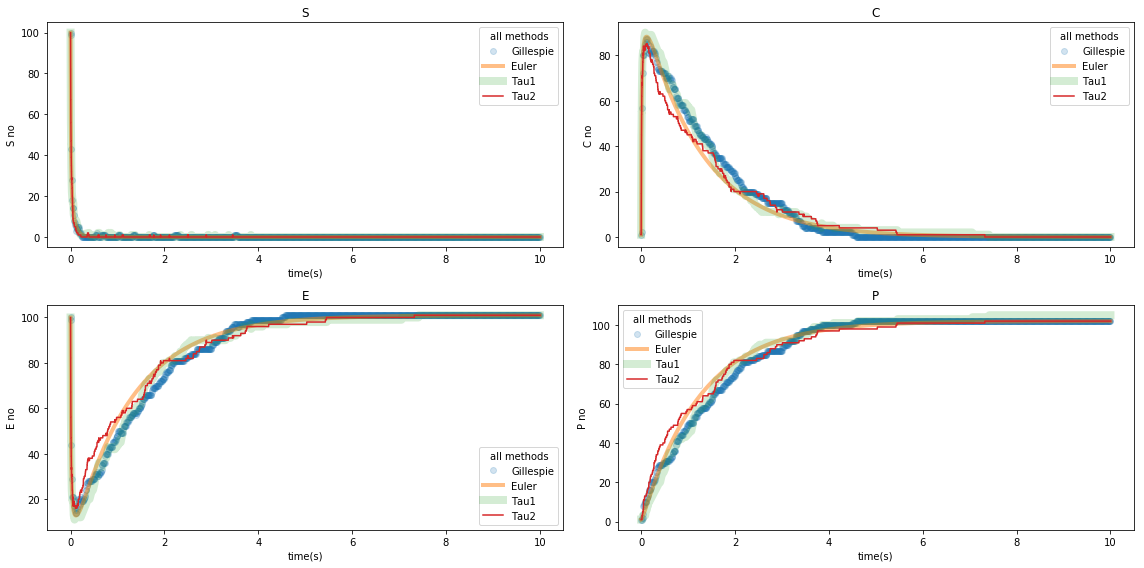

In [249]:
# plot the results

fig , ax = plt.subplots(2,2 ,  figsize=(16,8))

ax[0,0].set_title("S")
ax[0,0].set_xlabel('time(s)')
ax[0,0].set_ylabel('S no')

ax[0,0].plot( t_Gillespie_array , S_Gillespie_array  , 'o', label = "Gillespie" , alpha = 0.2)
ax[0,0].plot( t_Euler_array ,S_Euler_array ,  label = "Euler" , linewidth = 4 , alpha = 0.5)
ax[0,0].plot( t_Tau1_array , S_Tau1_array , label = "Tau1" , linewidth = 8 , alpha = 0.2)
ax[0,0].plot( t_Tau2_array , S_Tau2_array , label = "Tau2"  )
ax[0,0].legend(title = "all methods")


ax[1,0].set_title("E")
ax[1,0].set_xlabel('time(s)')
ax[1,0].set_ylabel('E no')

ax[1,0].plot( t_Gillespie_array , E_Gillespie_array  , 'o', label = "Gillespie" , alpha = 0.2)
ax[1,0].plot( t_Euler_array ,E_Euler_array ,  label = "Euler" , linewidth = 4 , alpha = 0.5)
ax[1,0].plot( t_Tau1_array , E_Tau1_array , label = "Tau1" , linewidth = 8 , alpha = 0.2)
ax[1,0].plot( t_Tau2_array , E_Tau2_array , label = "Tau2"  )
ax[1,0].legend(title = "all methods")


ax[0,1].set_title("C")
ax[0,1].set_xlabel('time(s)')
ax[0,1].set_ylabel('C no')

ax[0,1].plot( t_Gillespie_array , C_Gillespie_array  , 'o', label = "Gillespie" , alpha = 0.2)
ax[0,1].plot( t_Euler_array ,C_Euler_array ,  label = "Euler" , linewidth = 4 , alpha = 0.5)
ax[0,1].plot( t_Tau1_array , C_Tau1_array , label = "Tau1" , linewidth = 8 , alpha = 0.2)
ax[0,1].plot( t_Tau2_array , C_Tau2_array , label = "Tau2"  )
ax[0,1].legend(title = "all methods")


ax[1,1].set_title("P")
ax[1,1].set_xlabel('time(s)')
ax[1,1].set_ylabel('P no')

ax[1,1].plot( t_Gillespie_array , P_Gillespie_array  , 'o', label = "Gillespie" , alpha = 0.2)
ax[1,1].plot( t_Euler_array ,P_Euler_array ,  label = "Euler" , linewidth = 4 , alpha = 0.5)
ax[1,1].plot( t_Tau1_array , P_Tau1_array , label = "Tau1" , linewidth = 8 , alpha = 0.2)
ax[1,1].plot( t_Tau2_array , P_Tau2_array , label = "Tau2"  )
ax[1,1].legend(title = "all methods")

plt.tight_layout()

In [3]:
def R_Twoscale(kp,km,k2,S0,E0,C0,P0):
    t_array(1) = initial_time
    S_array(1) = S
    E_array(1) = E
    C_array(1) = C
    P_array(1) = P
    t = 0
    j = 1
    Tf = 0.002

    while t < T_end : 
        tf = 0
        am = 0
        while tf<Tf :  # Inner SSA for fast reaction
            a = [kp*S*E, k2*C]
            a0 = sum(a)
        
            r1 = np.rand.random()
            while r1 == 0:
                r1 = rand(1)

            
            tau = (1/a0)*(log(1/r1))
            
            tf = tf + tau
            
            i=1
            mu=0
            amu=0
            r2=np.rand.random()
            
            while amu < r2*a0:
                mu = mu + 1
                amu = amu + a(i)
                i = i + 1
            
            C_old = C
            if mu == 0:      
                S = S - 1
                E = E - 1
                C = C + 1
            elif mu == 1 :
                C = C - 1
                S = S + 1
                E = E + 1
            
            am = am + (C + C_old) /2*tau　 
        
        # Outer SSA for slow reaction
        a = am*k2 / tf
        
        r3 = np.rand.random()
        while r3 == 0 :
            r3 = np.rand.random()
 
        tau = (1/a)*( log(1/r3) )
        
        t = t + tau
       
        C = C - 1
        
        P = P + 1
        E = E + 1
        
        j = j + 1
        t_array[j] = t_array[j-1] + tau
        S_array[j] = S
        E_array[j] = E
        C_array[j] = C
        P_array[j] = P
    

SyntaxError: invalid syntax (<ipython-input-3-23cfc3848d30>, line 19)

2.0